In [9]:
#!pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
from statistics import mean, stdev
class ColorCycler:
    def __init__(self, colors):
        self.colors = colors
        self.current = 0
        
    def __iter__(self):
        self.current += 1
        return self
    def __len__(self):
        return self.current
    def __call__(self,n):
        t = []
        for i in range(n):
            t.append(next(self))
        return t
    def reset(self):
        self.current = 0
        
    def __next__(self):
        self.current+=1
        return self.colors[(self.current-1)%len(self.colors)]
    

In [11]:
import os
PATH = "/home/weriko/scripts/paralela/bench/"
imgpath = "/home/weriko/scripts/paralela/imgs/"
dirs = [name for name in os.listdir(PATH)]

platforms = set()
tests = set()
loads = set()

benchs = {}
for d in dirs:
    benchs[d] = {}
    platforms.add(d)

    for subd in (name for name in os.listdir(PATH+d)):
        benchs[d][subd]= {}
        tests.add(subd)
        for file in (name for name in os.listdir(PATH+d+"/"+subd)):
            
            f = open(PATH+d+"/"+subd+"/"+file, "r")
            
            data = map(float, filter(None,f.read().split("\n")))
            file = file.split("-")[-1]
            loads.add(file)
            f.close()
            benchs[d][subd][file] = list(data)
        
print(benchs)
    

{'RASP': {'results_double': {'250.txt': [0.21835645468434658, 0.20315953986608812, 0.2076573947683092, 0.2125969333321981, 0.22933221504550966, 0.19255581736707686, 0.18967216730325467, 0.2355846778754489, 0.18820053856236377, 0.2277913817709934, 0.18728600781605054, 0.19828905670849223, 0.2091639488964114, 0.2055120064397642, 0.18722872274595617, 0.22557600916405243, 0.2073480935398835, 0.2214422943595692, 0.244951913742821, 0.22515067316039225, 0.21267928866595812, 0.24701260302259787, 0.2188127135848289, 0.2490356290602127, 0.21996928198264476, 0.21575674648797522, 0.2370924291357807, 0.21878633091528638, 0.1940143656627612, 0.21745789518921077, 0.23962659523677007, 0.20475290619044234, 0.2143138974389956, 0.20514392257053685, 0.23988543331073534, 0.22029092224675395, 0.18649722767111693, 0.23534706714276216, 0.2459710420322117, 0.22119569539951767, 0.20602200273358176, 0.24675484102487644, 0.225460434801572, 0.2517439621548441, 0.19315230883922718, 0.2087377203495213, 0.20511672816

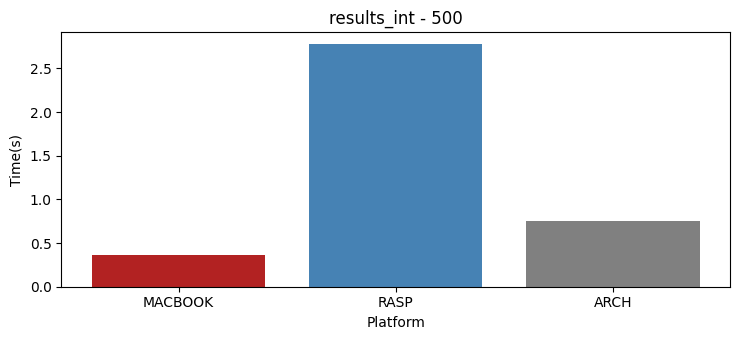

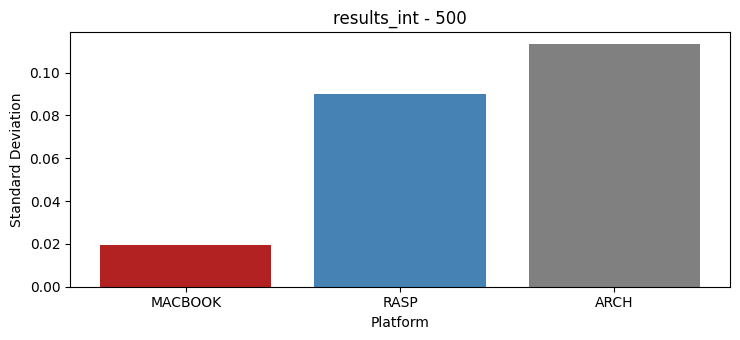

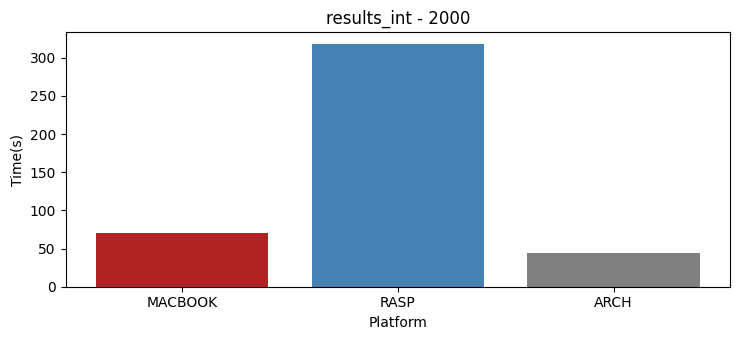

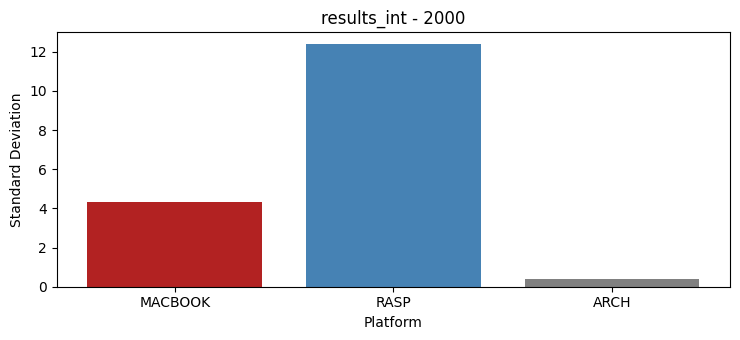

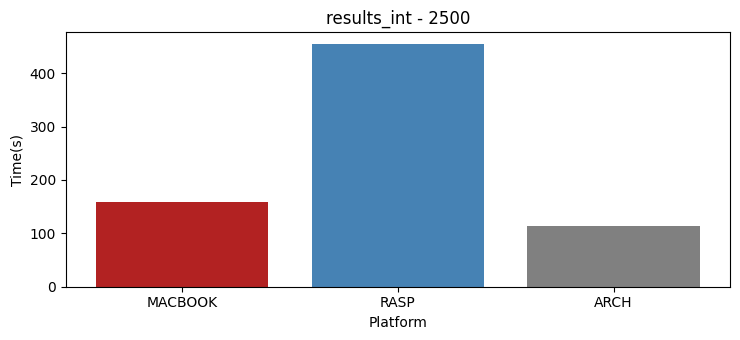

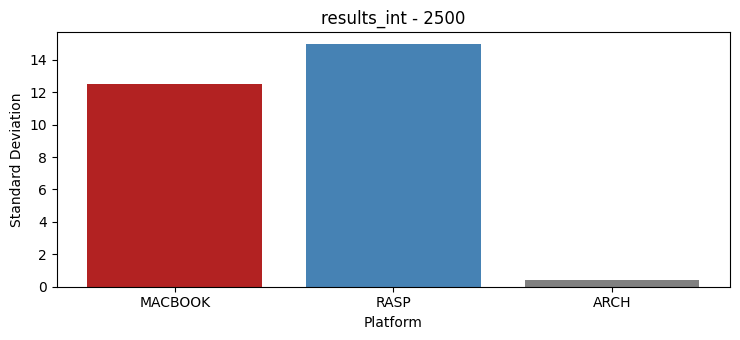

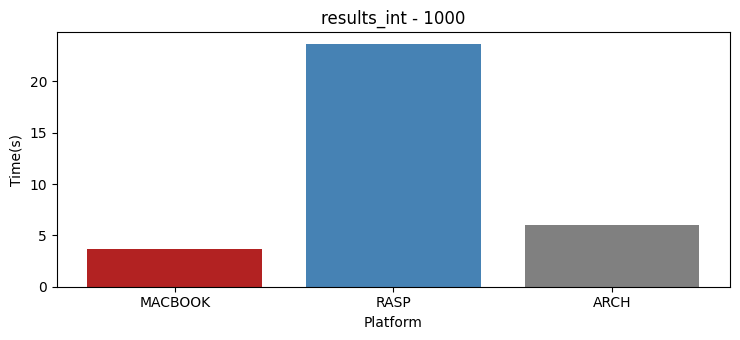

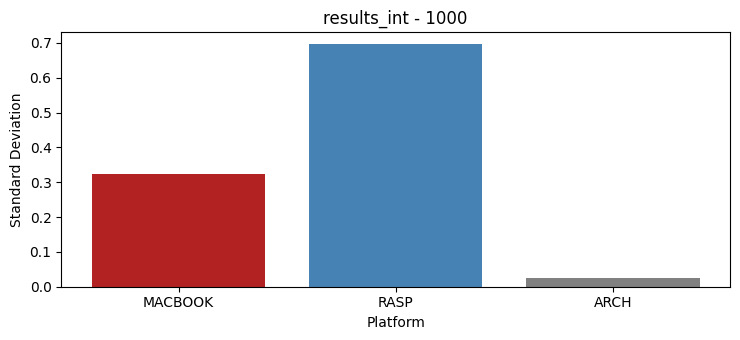

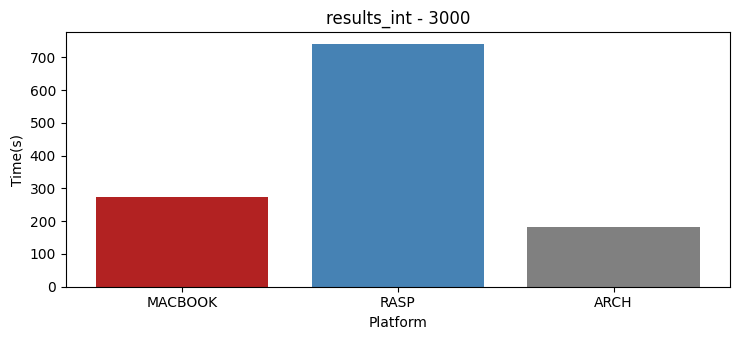

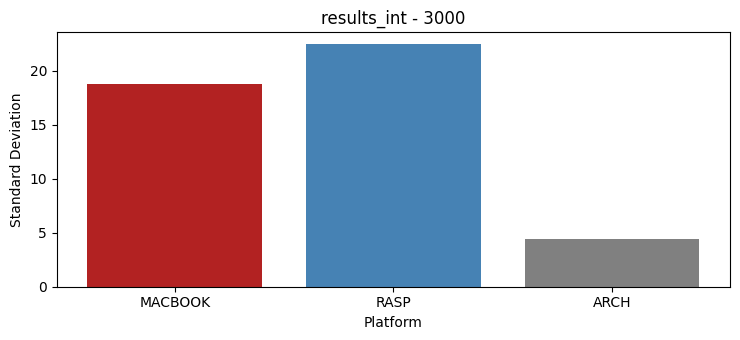

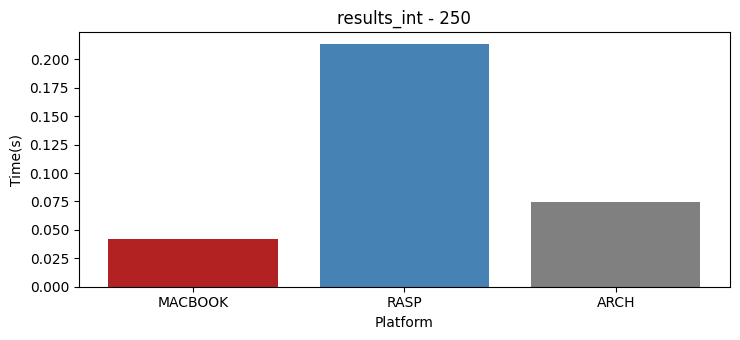

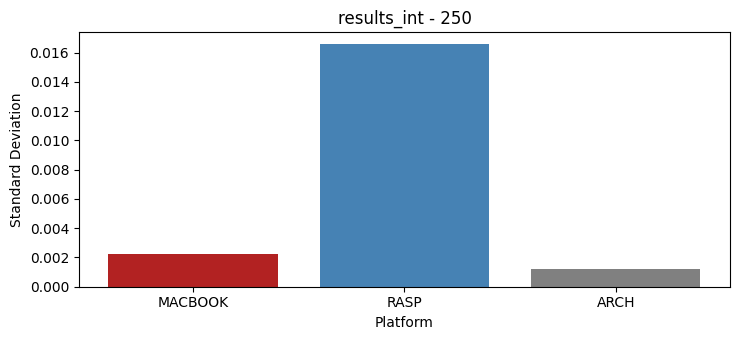

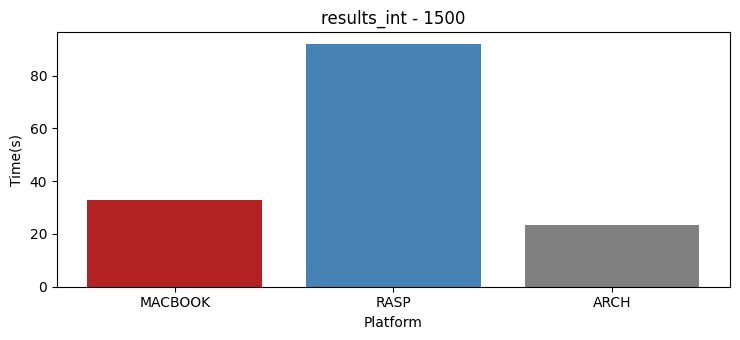

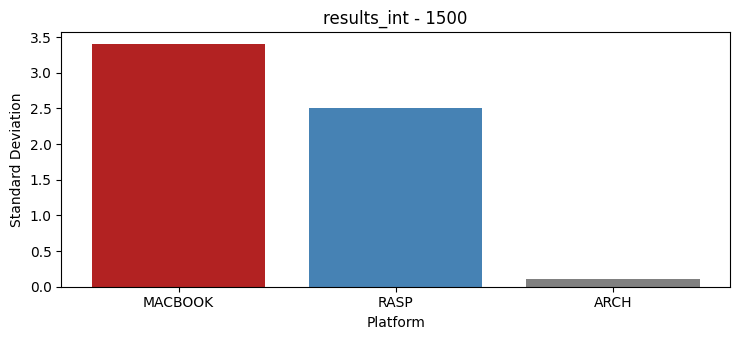

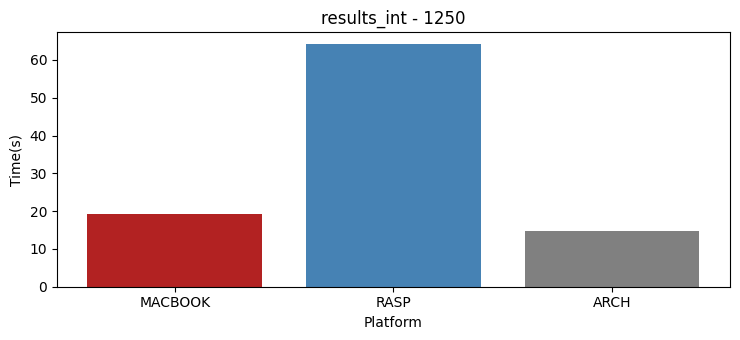

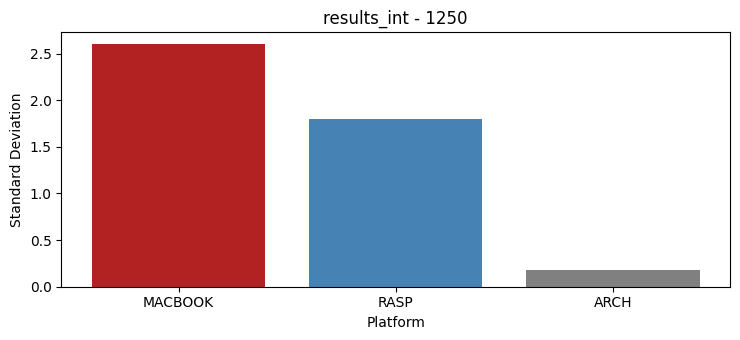

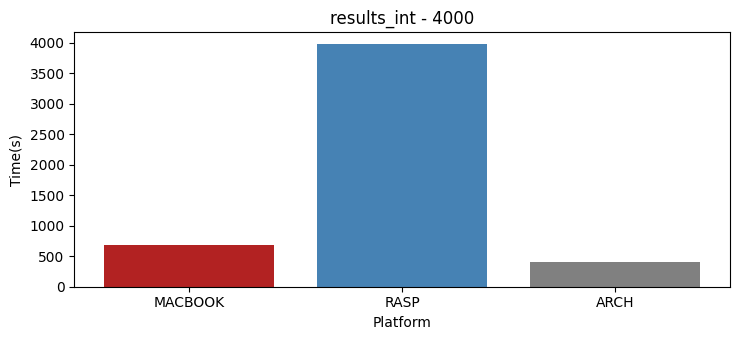

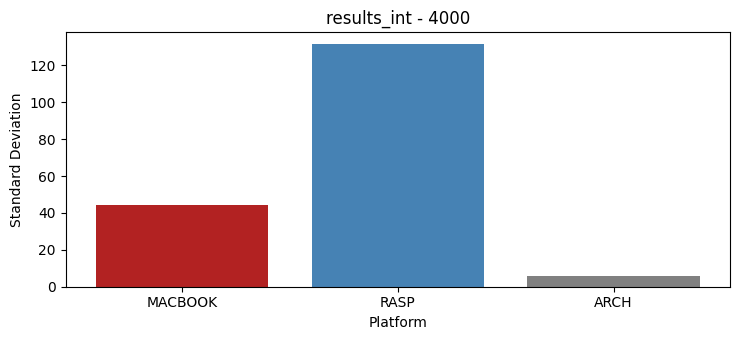

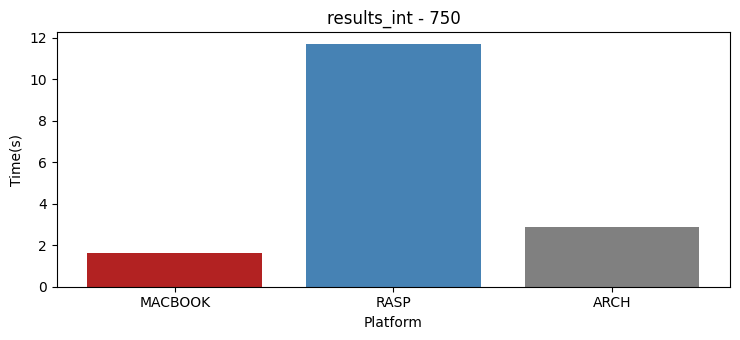

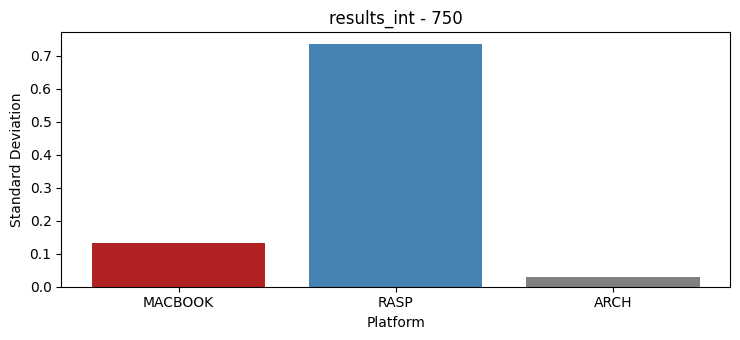

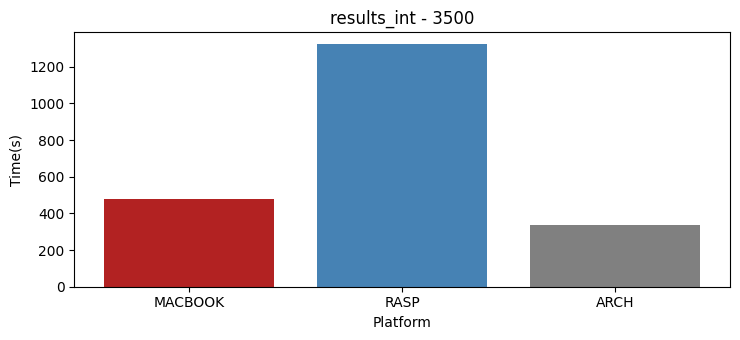

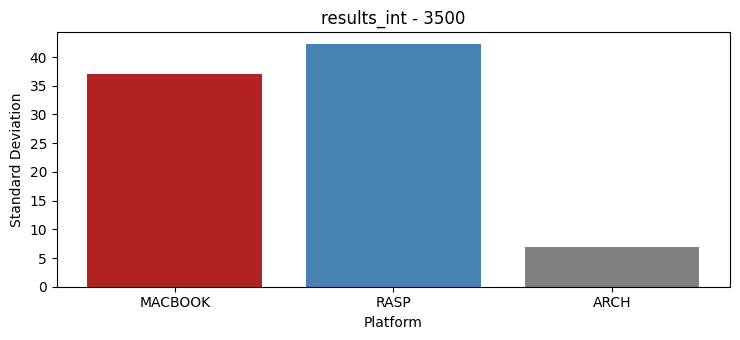

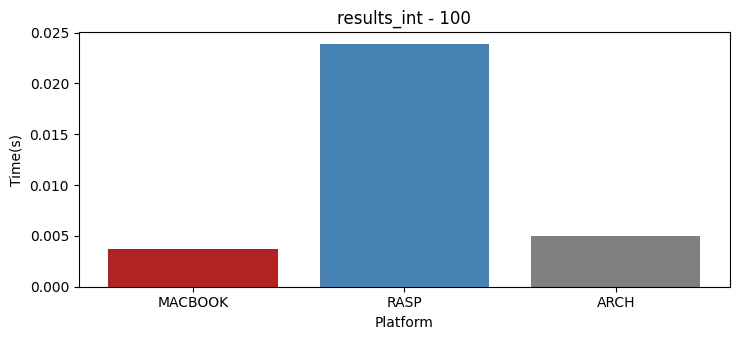

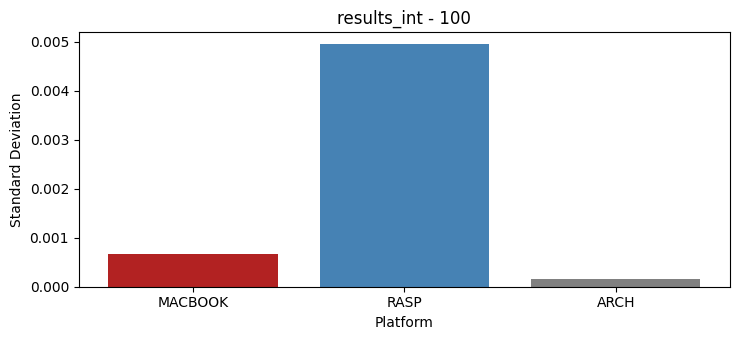

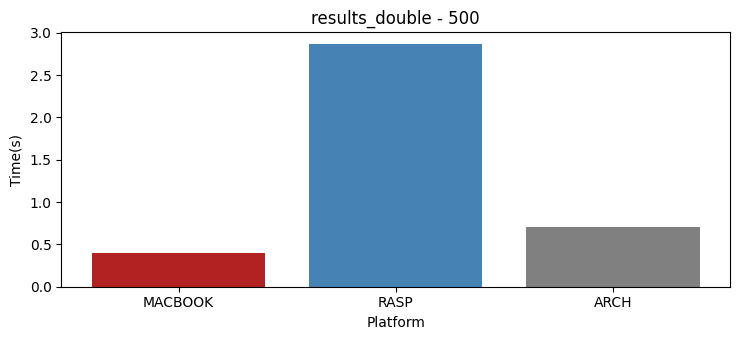

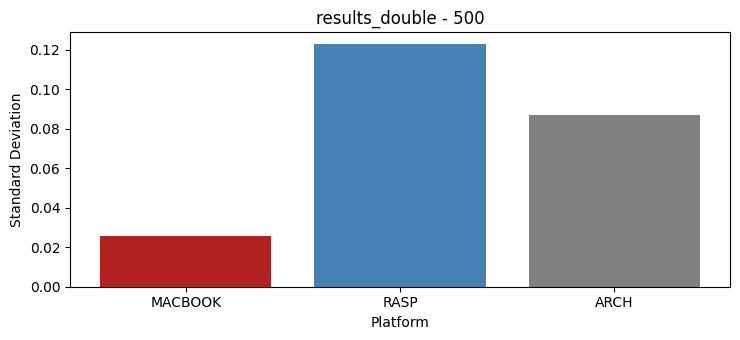

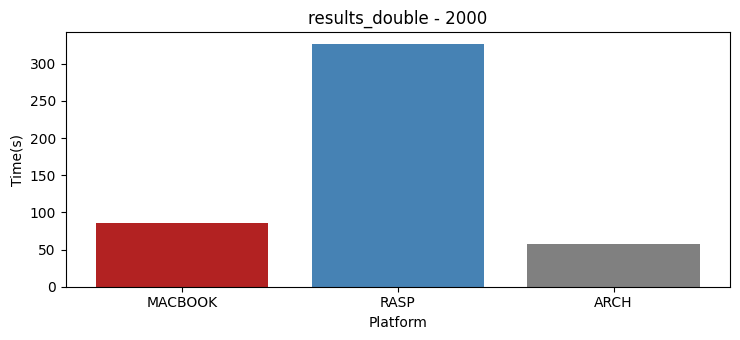

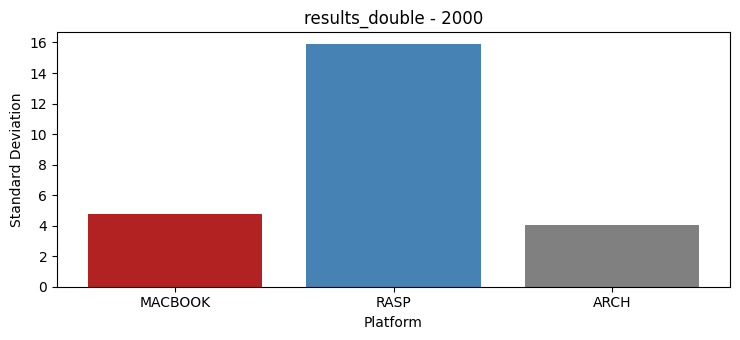

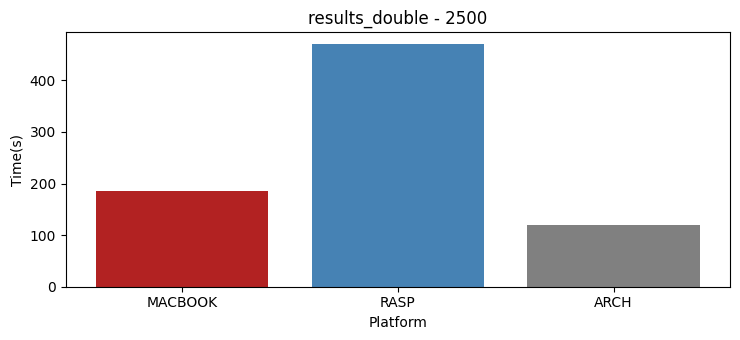

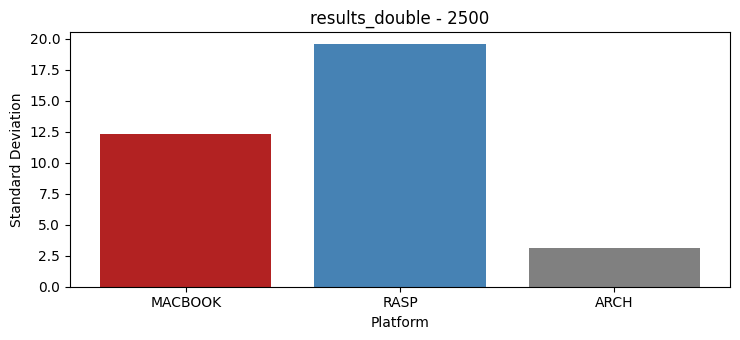

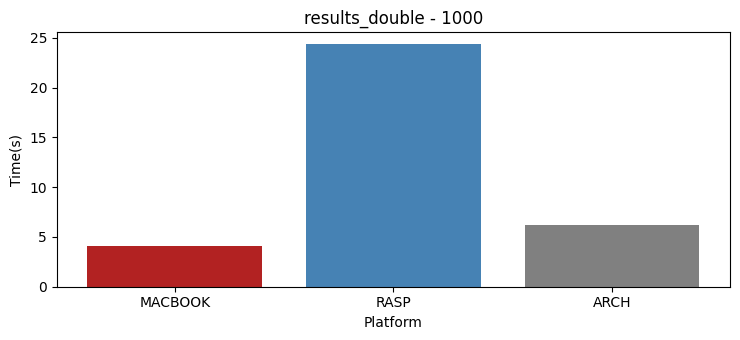

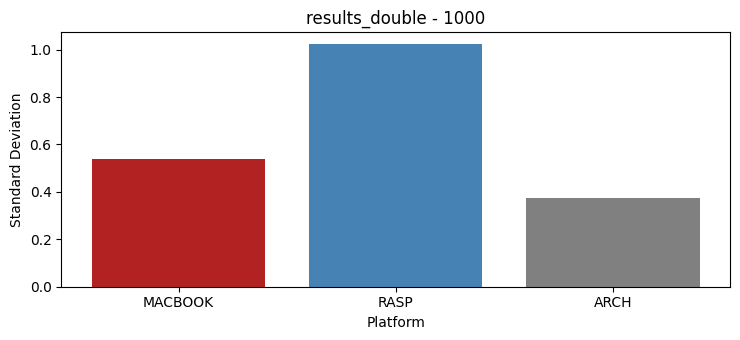

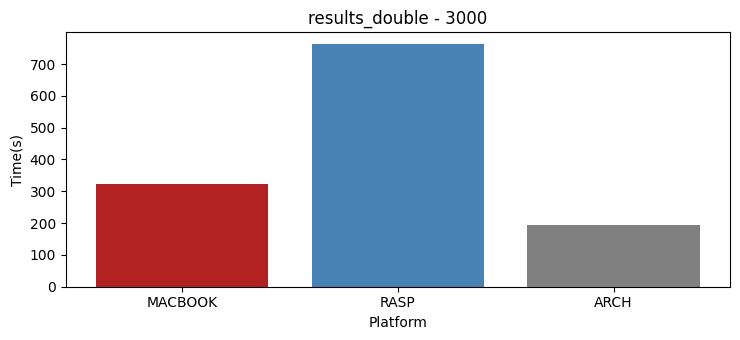

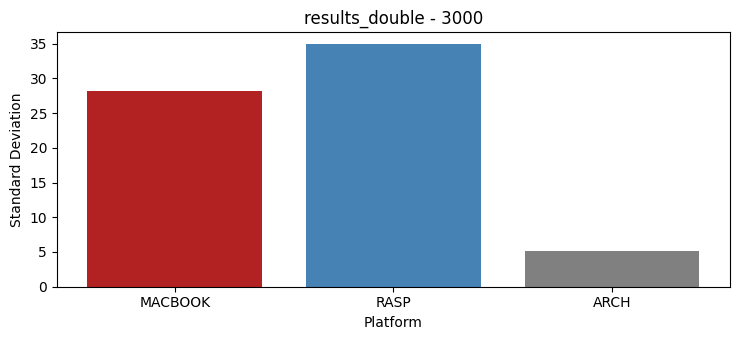

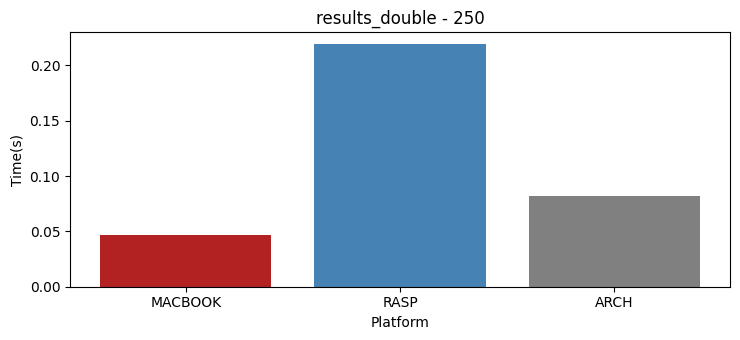

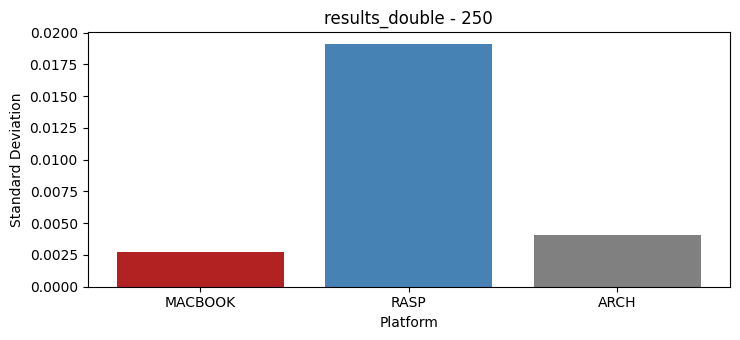

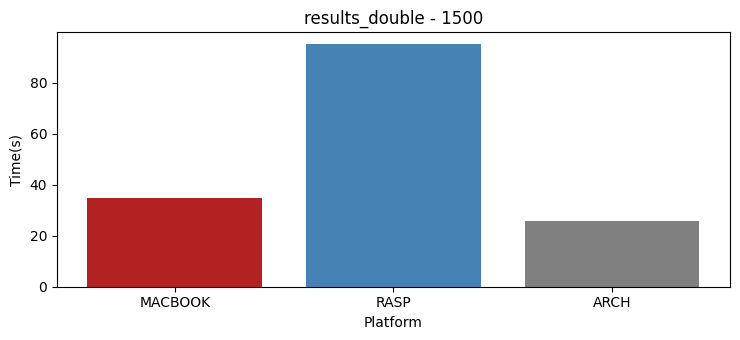

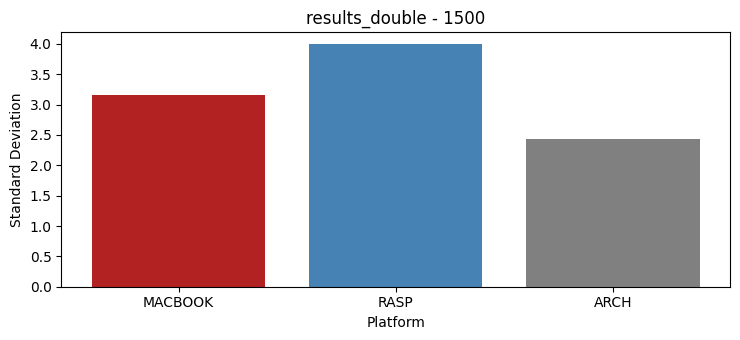

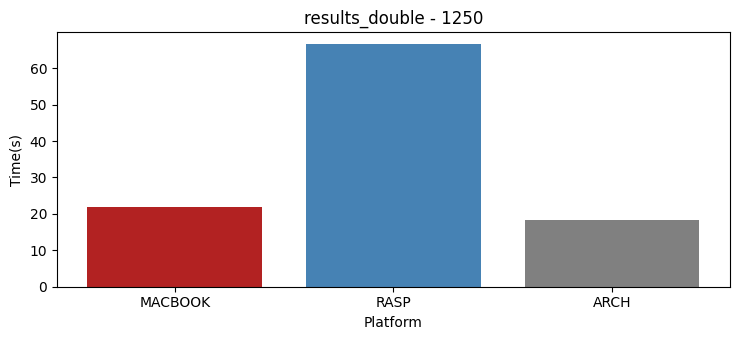

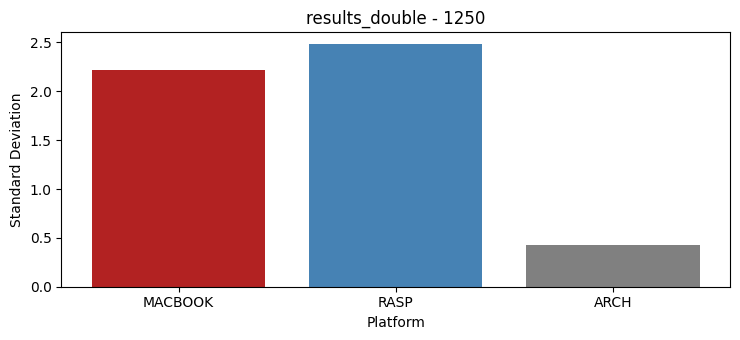

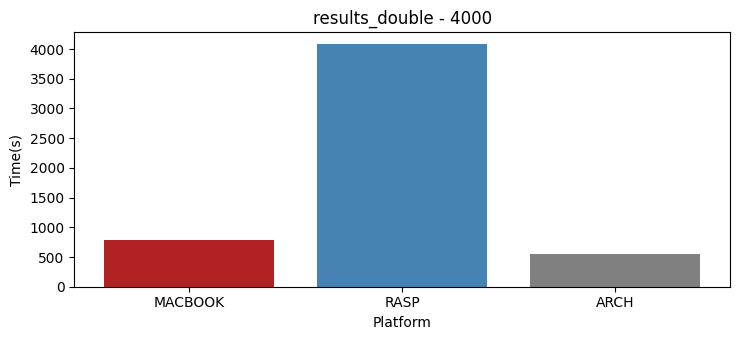

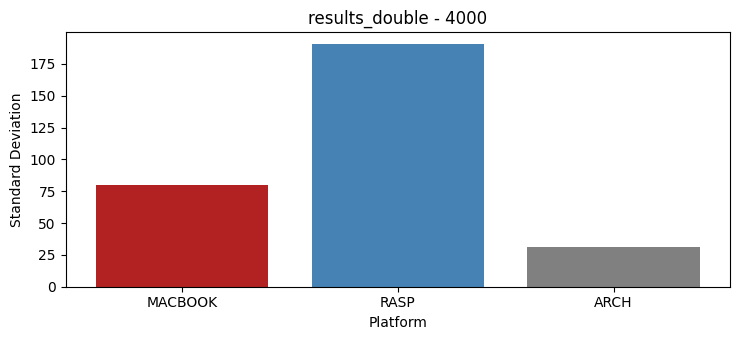

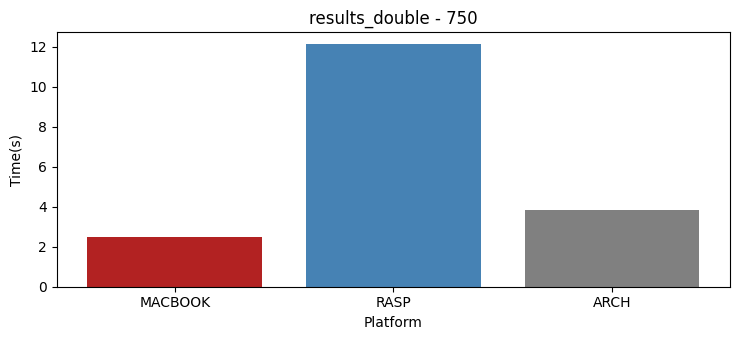

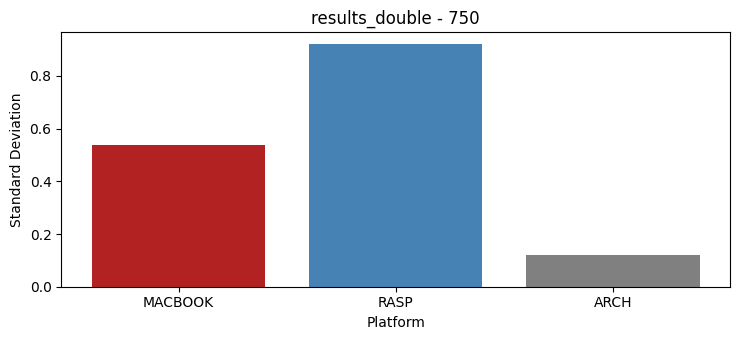

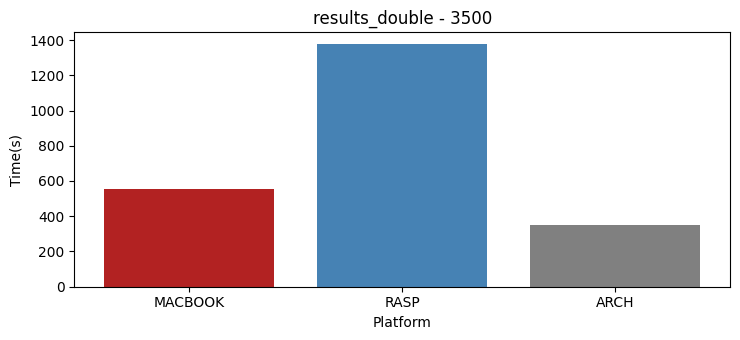

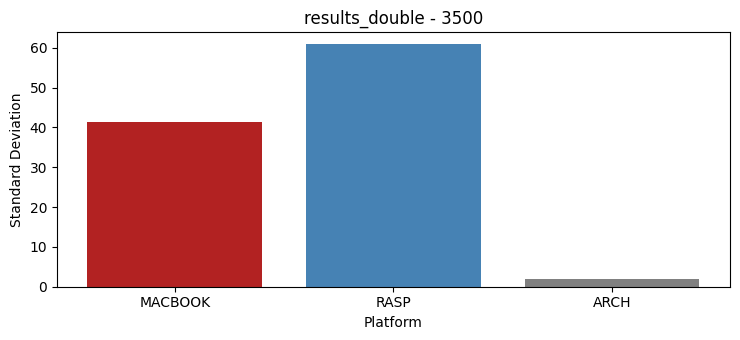

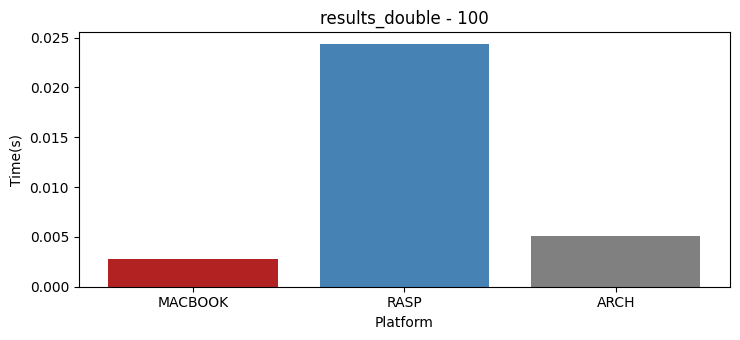

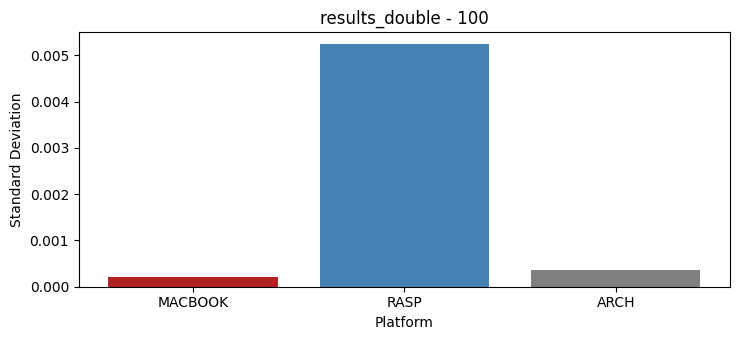

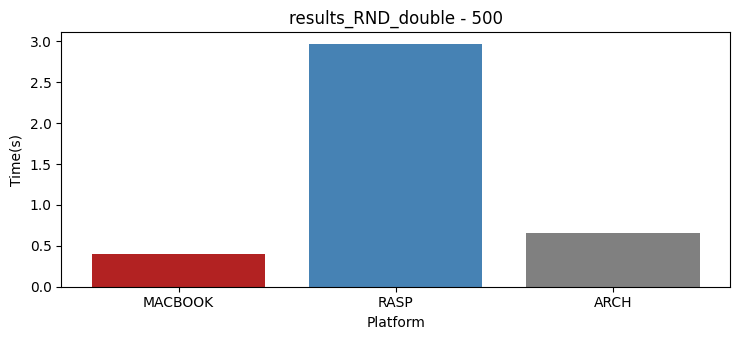

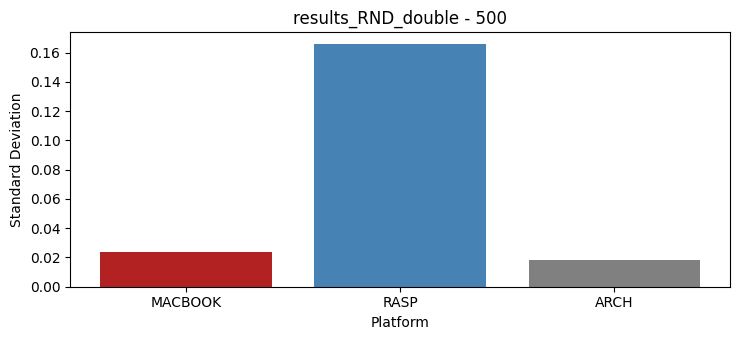

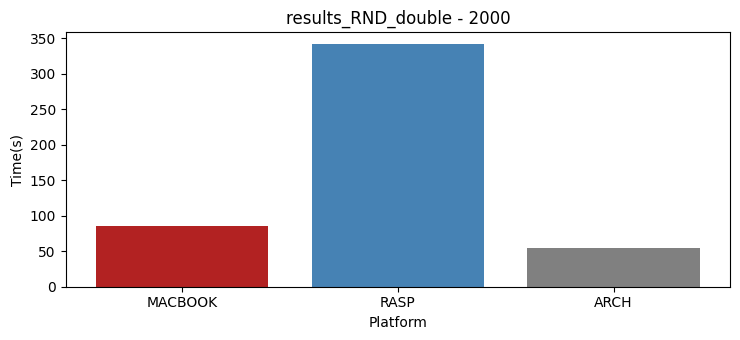

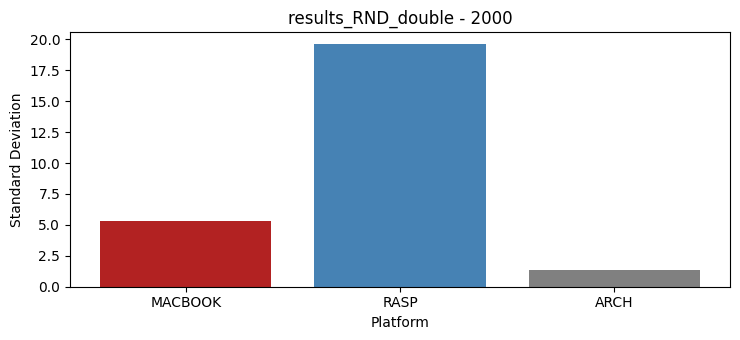

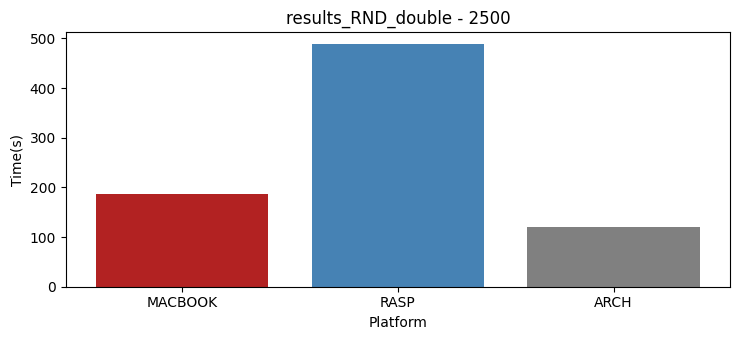

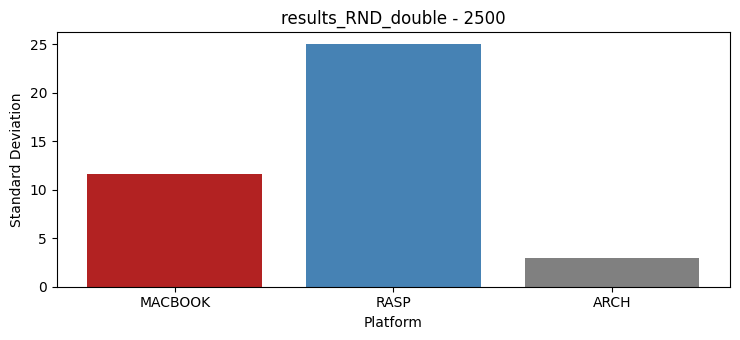

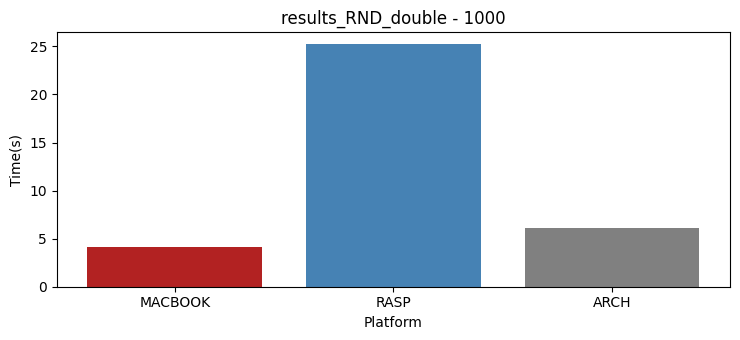

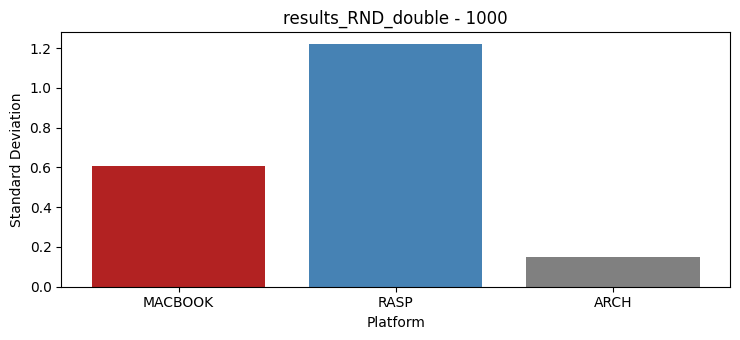

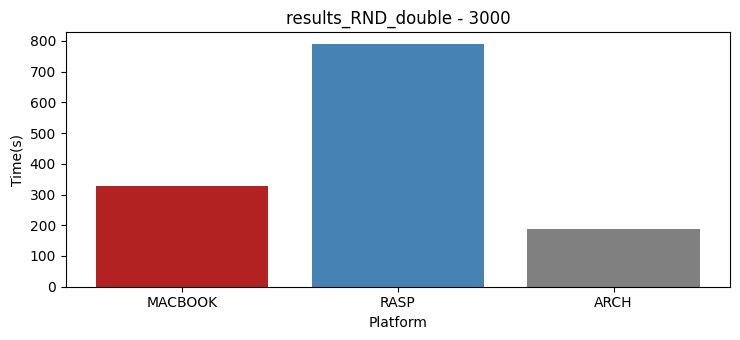

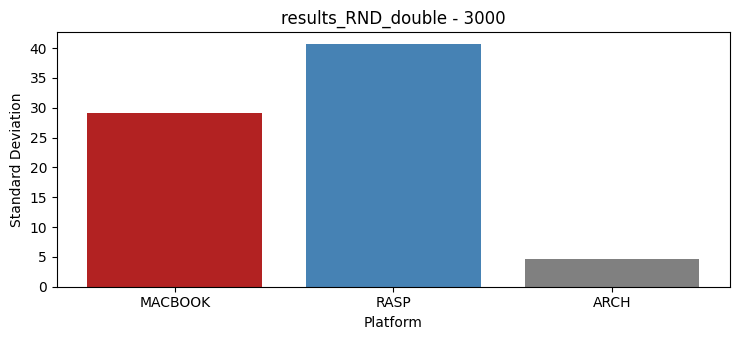

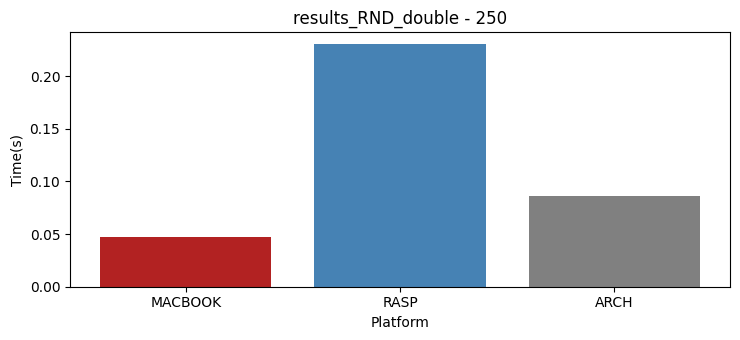

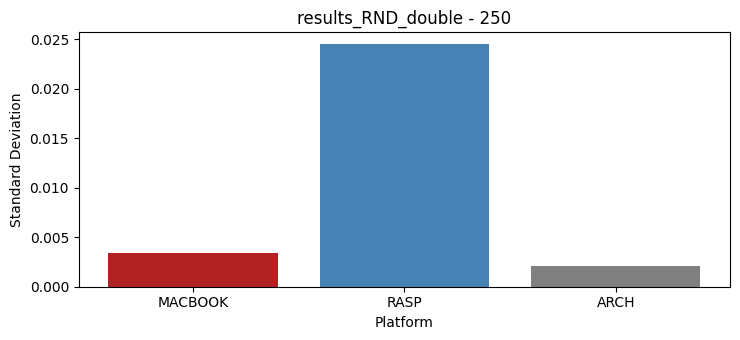

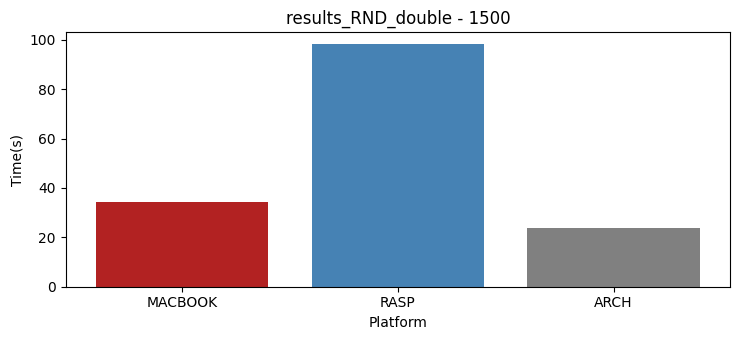

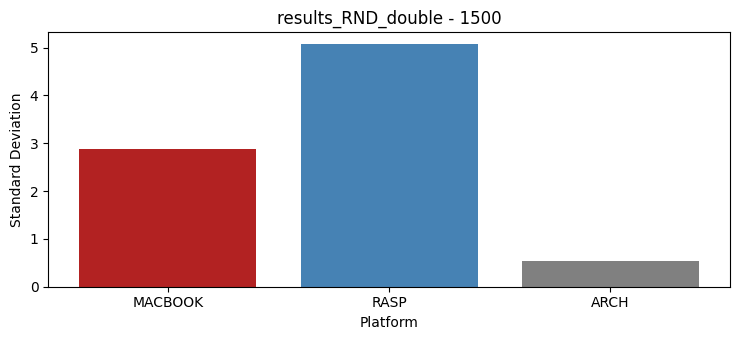

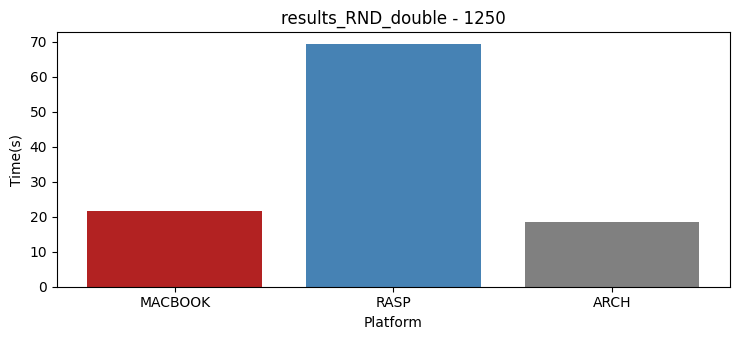

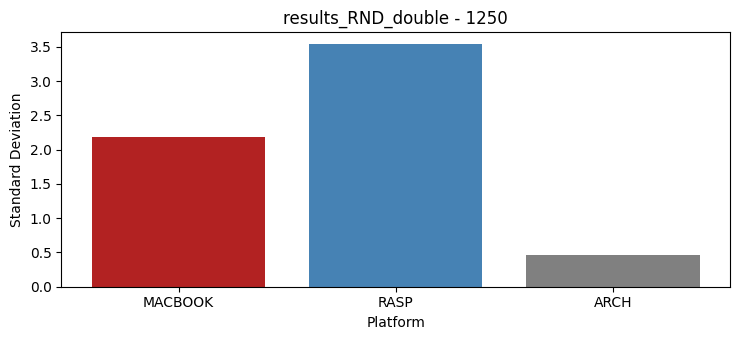

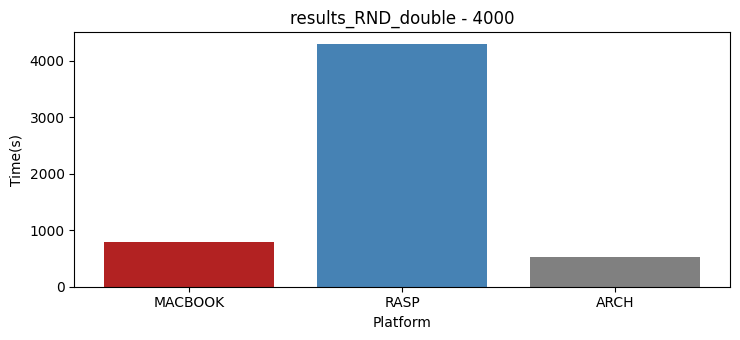

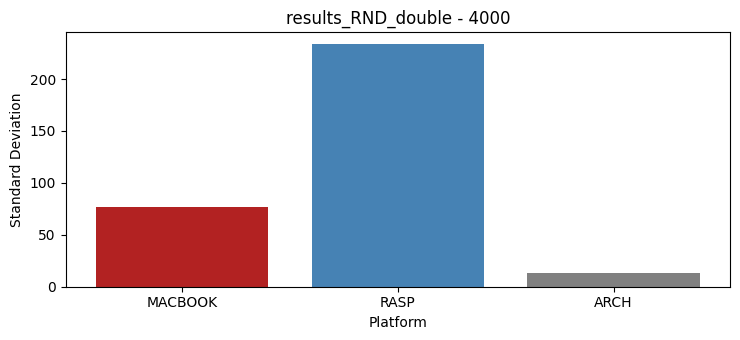

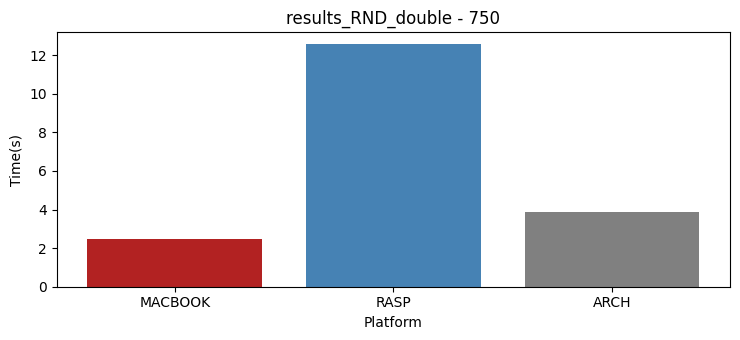

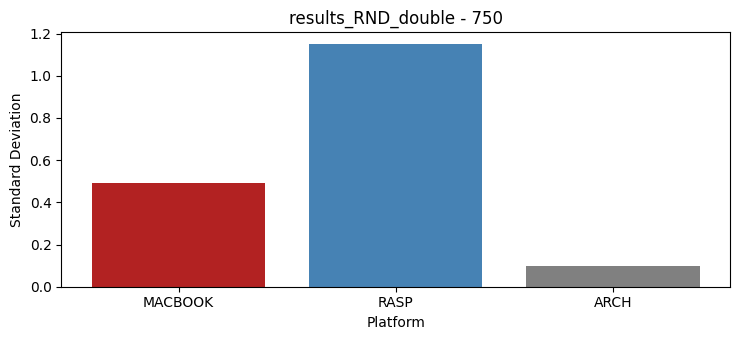

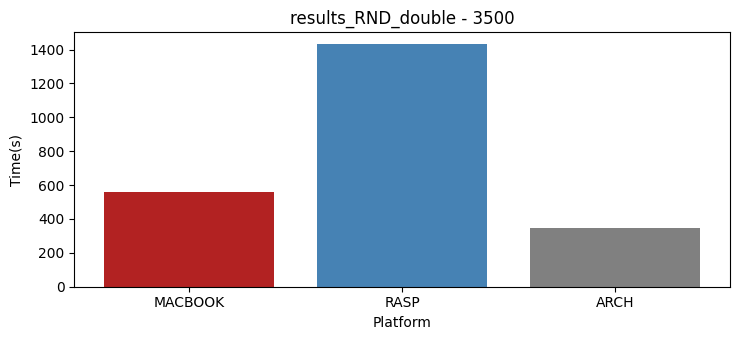

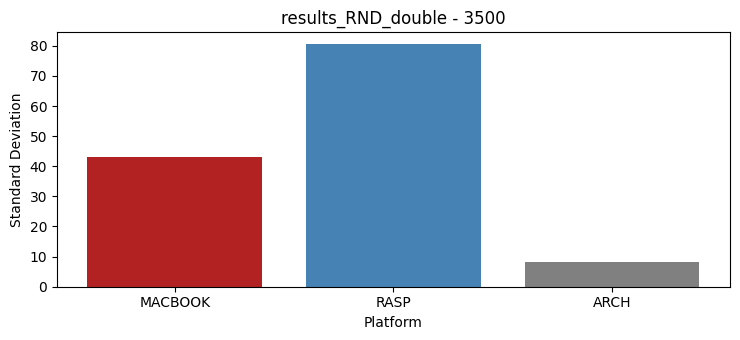

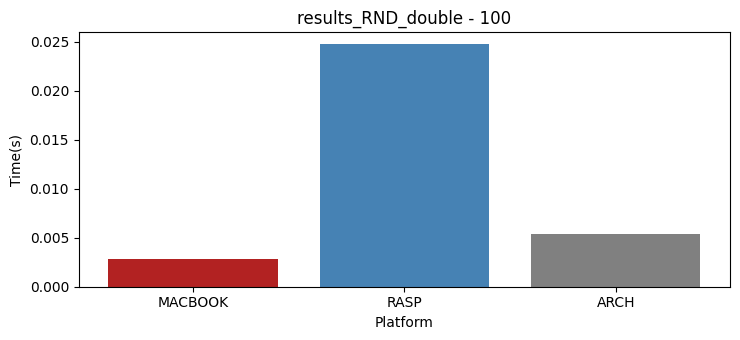

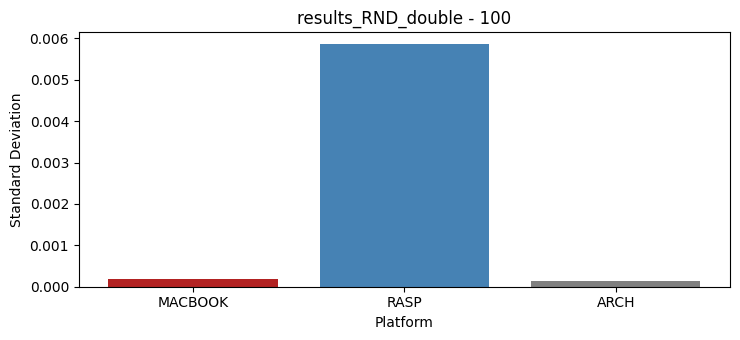

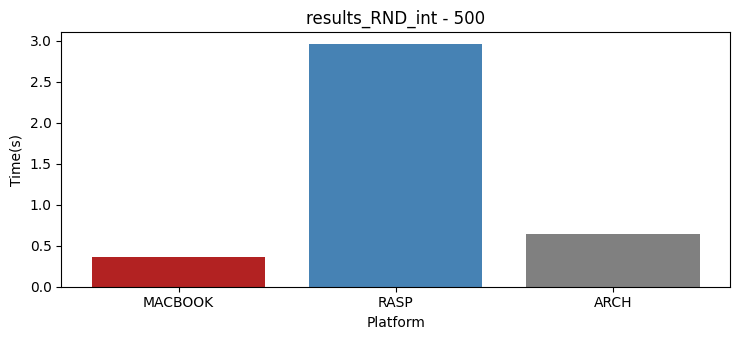

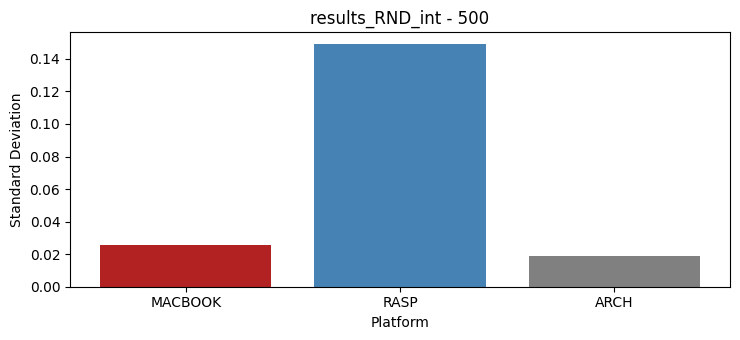

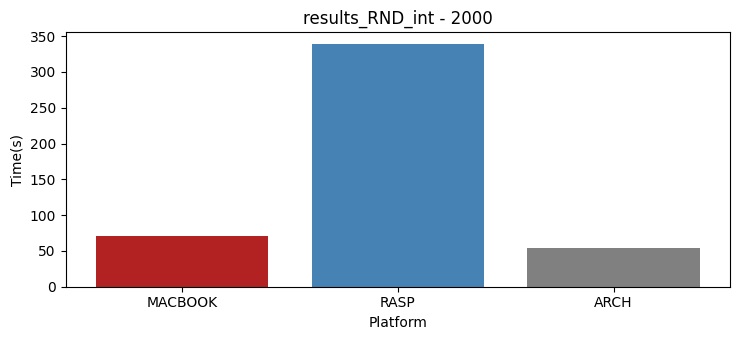

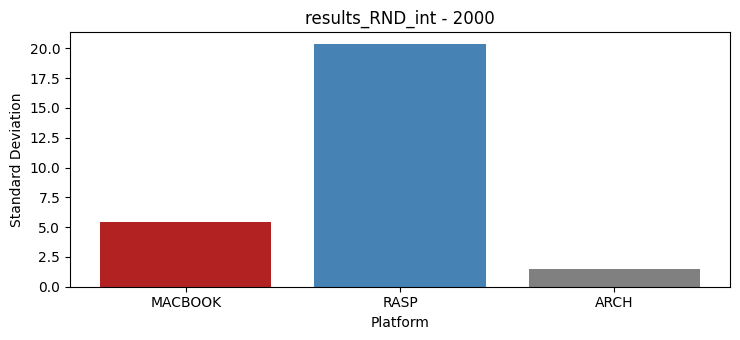

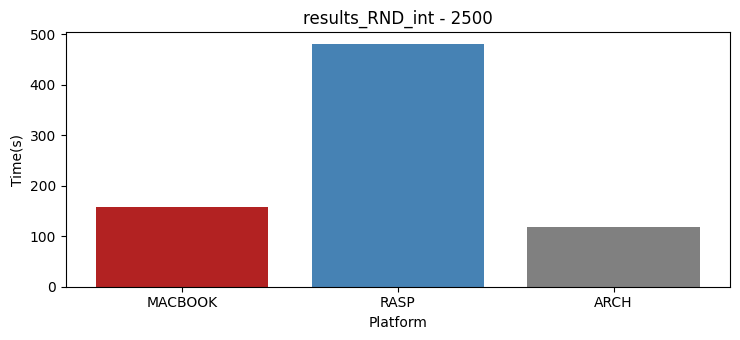

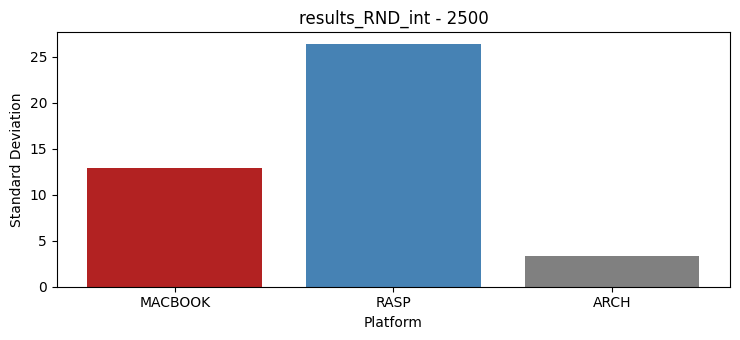

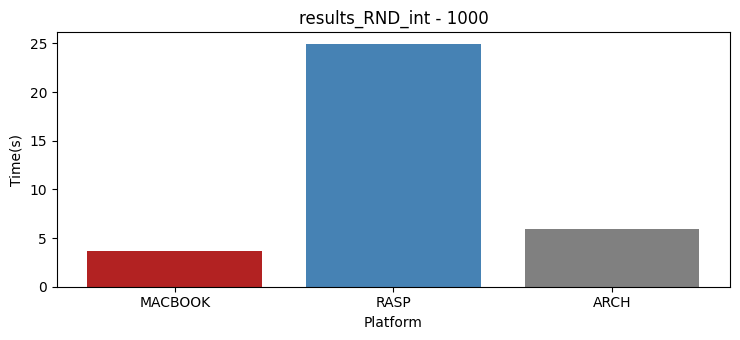

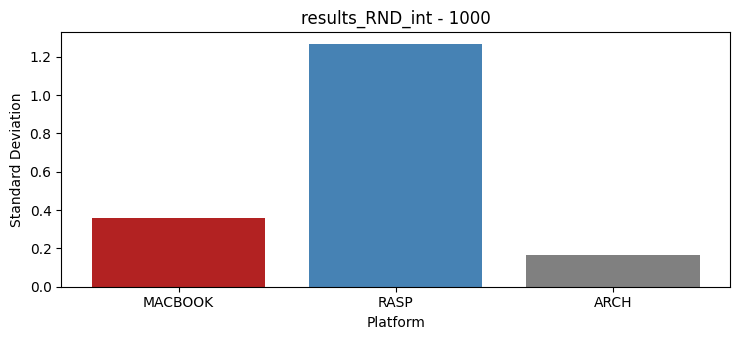

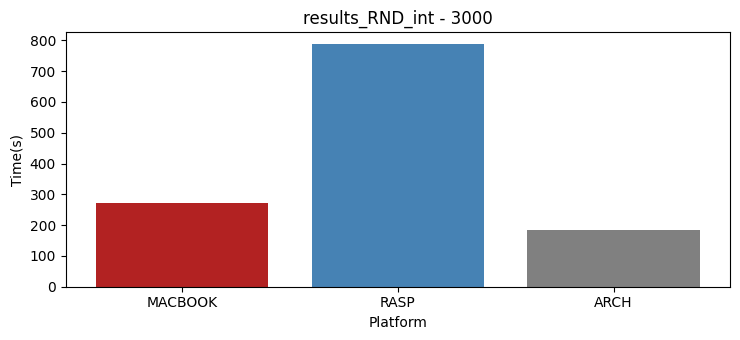

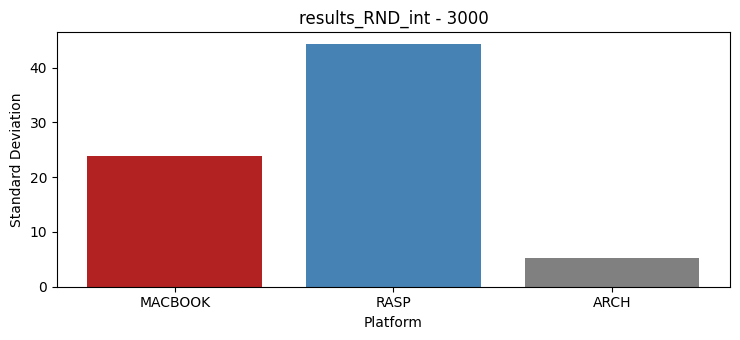

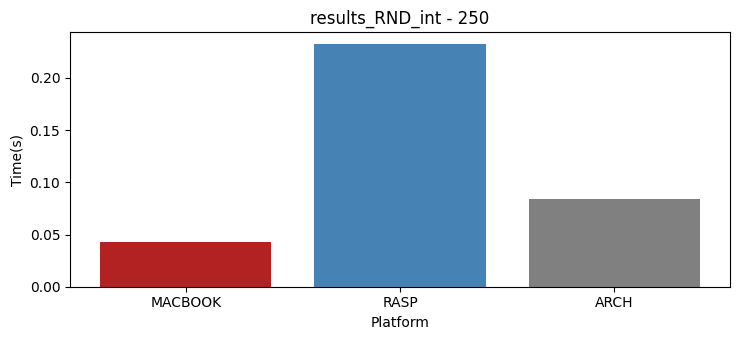

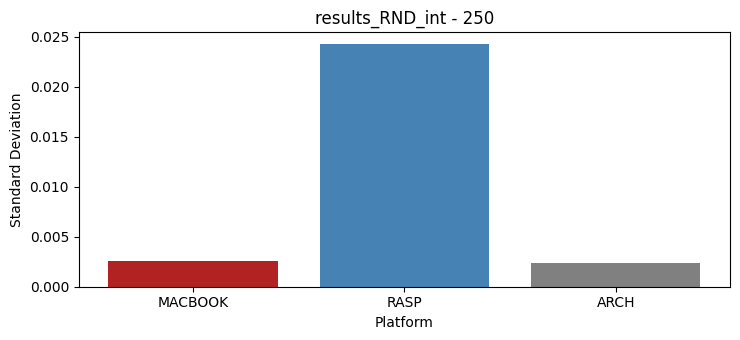

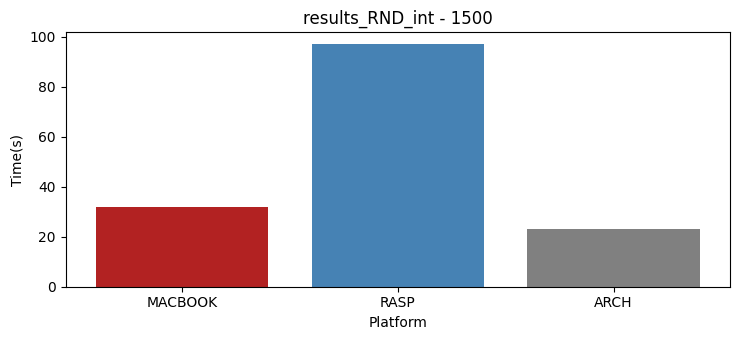

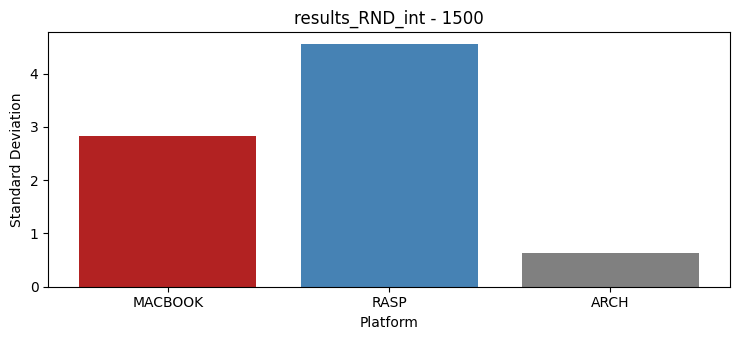

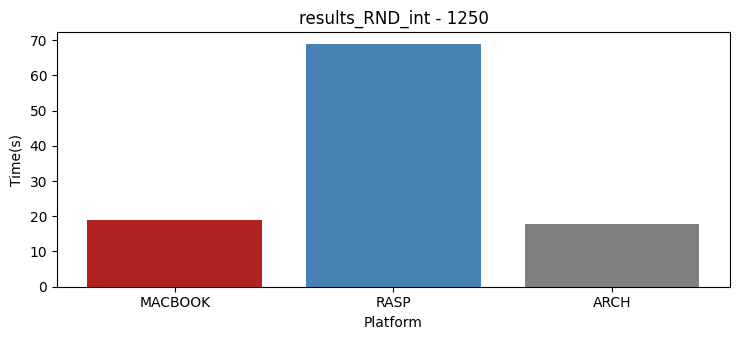

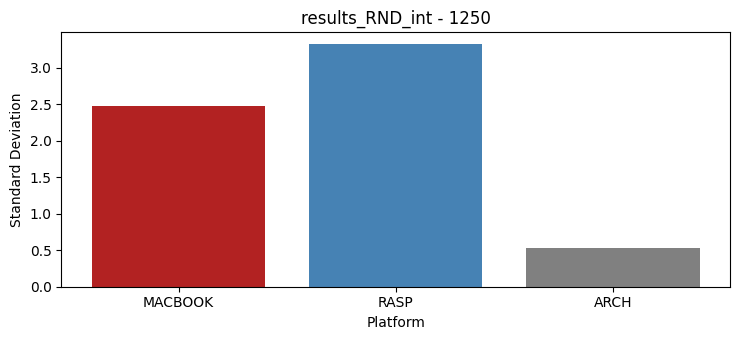

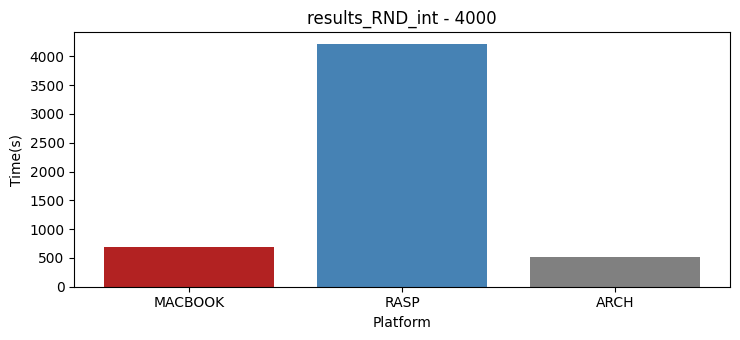

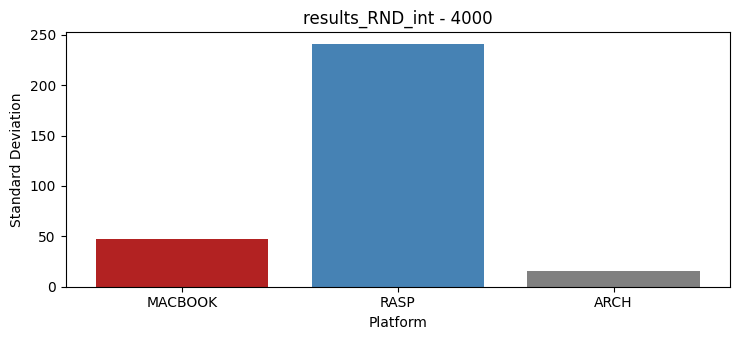

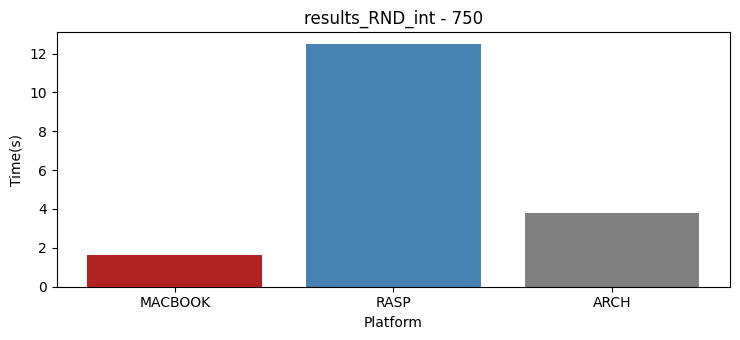

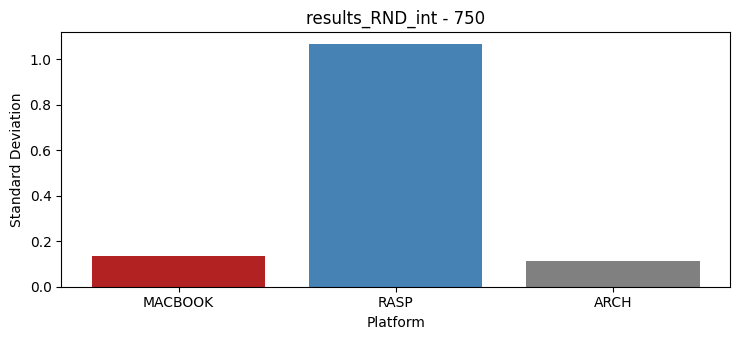

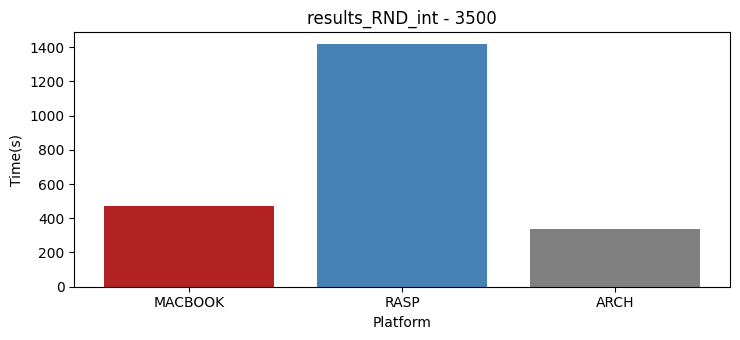

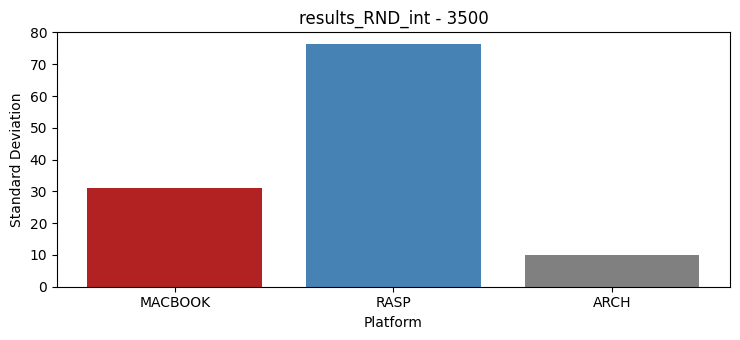

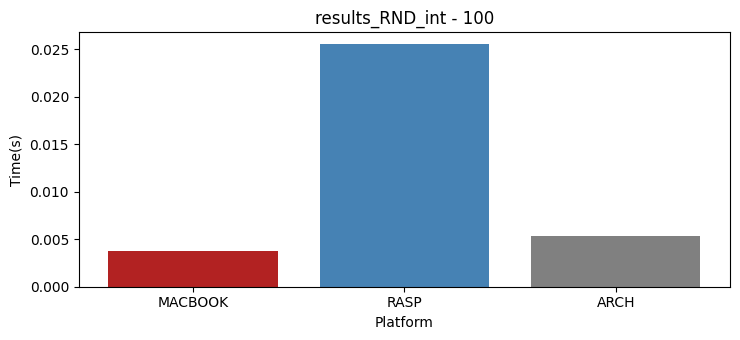

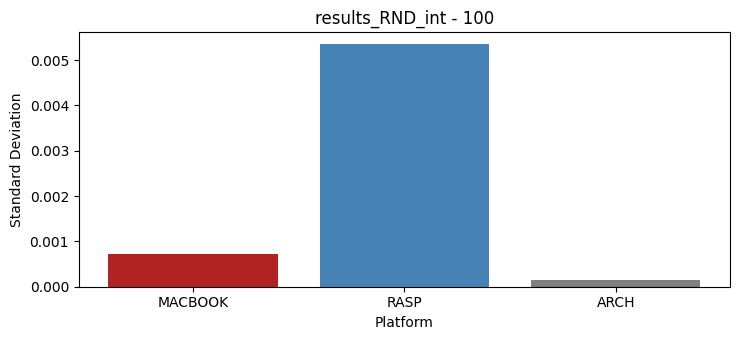

In [12]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
color_cycler = ColorCycler(['firebrick','steelblue','grey'])

for t in tests:
    for l in loads:
        ps = []
        ps_stdev = []
        names = []
        for p in platforms:
            names.append(p)
            ps.append(mean(benchs[p][t][l]))
            ps_stdev.append(stdev(benchs[p][t][l]))
        color_cycler.reset()
        plt.xlabel("Platform")
        plt.ylabel("Time(s)")
        plt.title(f"{t} - {l.split('.')[0]}")
        plt.bar(names,ps, color = color_cycler(len(names)))
        plt.savefig(f"{imgpath}/barracomparativa{t}_{l.split('.')[0]}.png")
        plt.show()
        plt.xlabel("Platform")
        plt.ylabel("Standard Deviation")
        plt.title(f"{t} - {l.split('.')[0]}")
        plt.bar(names,ps_stdev, color = color_cycler(len(names)))
        plt.savefig(f"{imgpath}/stdev_barracomparativa{t}_{l.split('.')[0]}.png")
        plt.show()
        


        

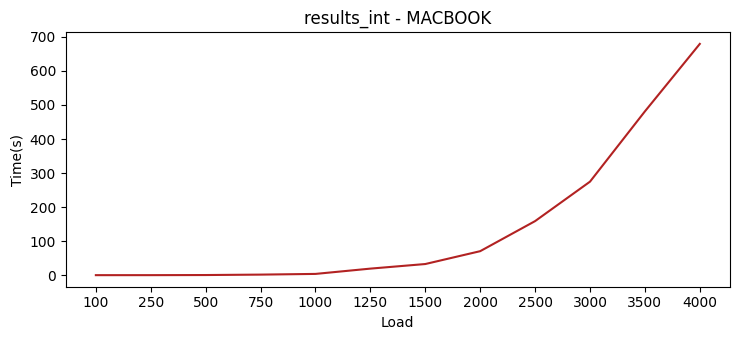

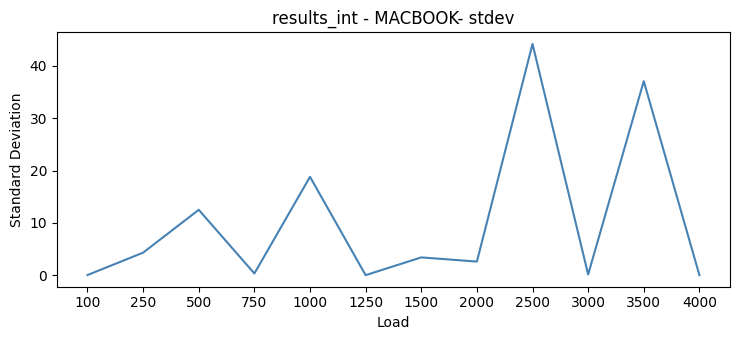

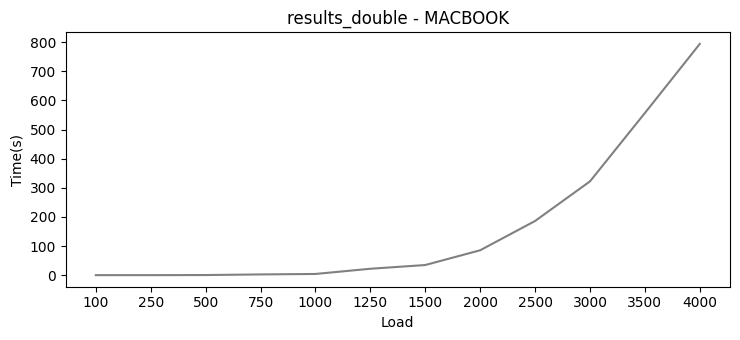

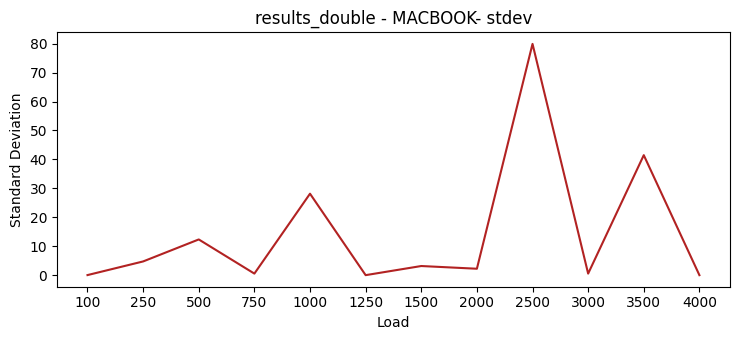

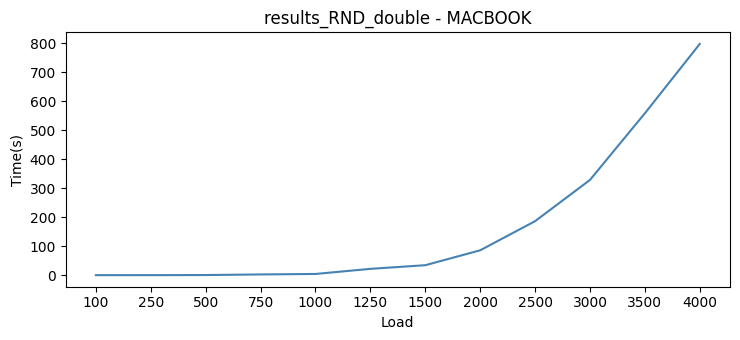

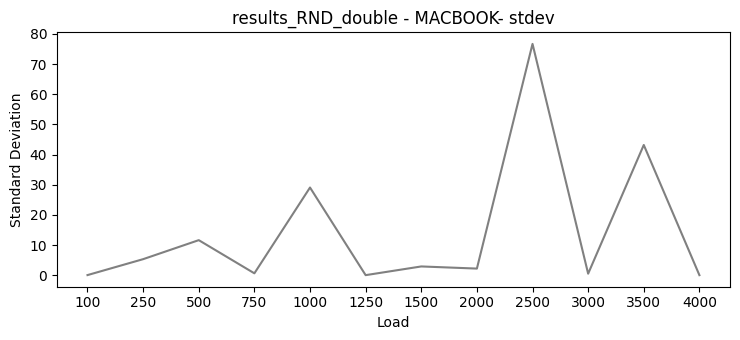

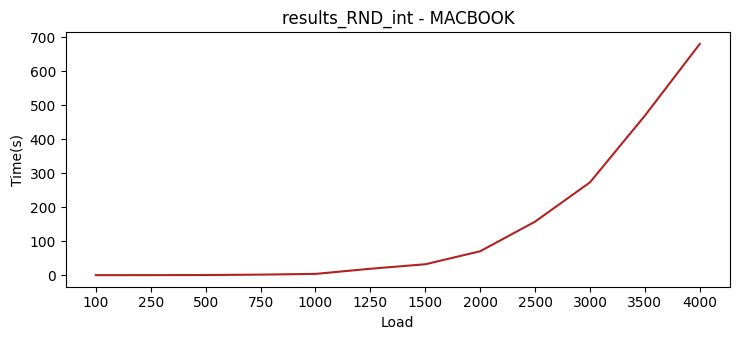

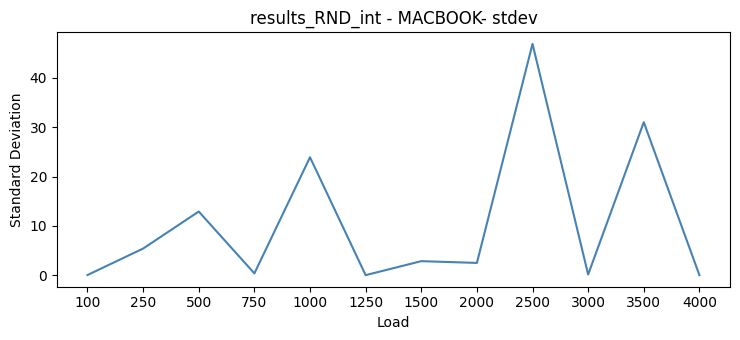

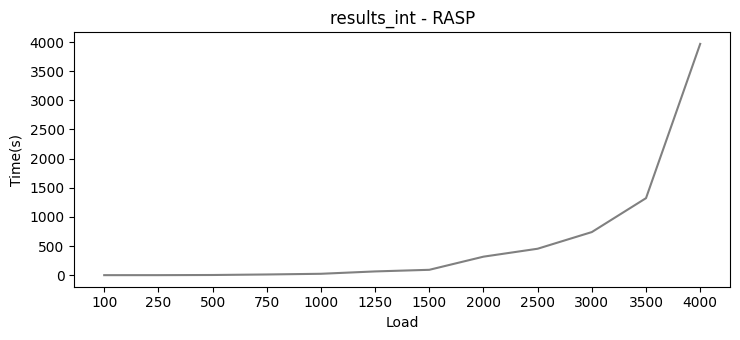

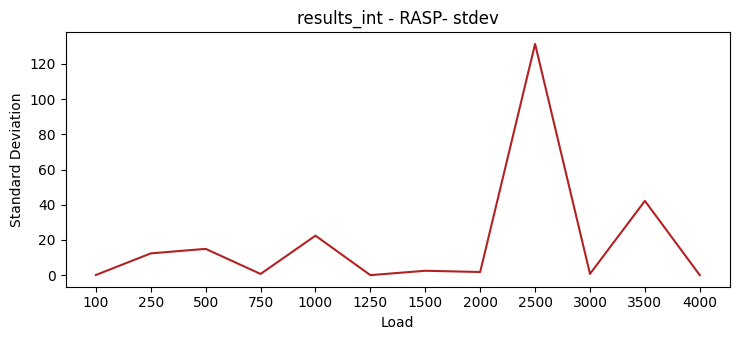

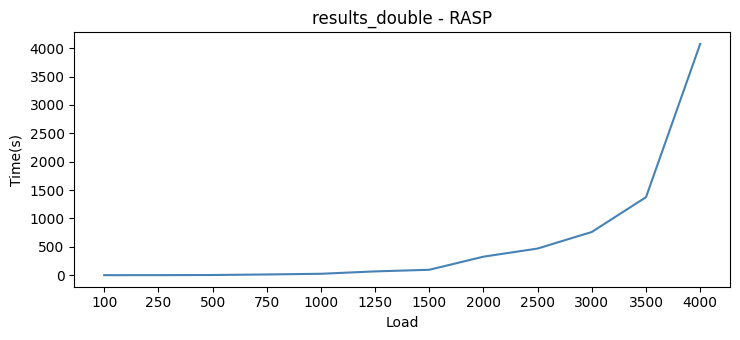

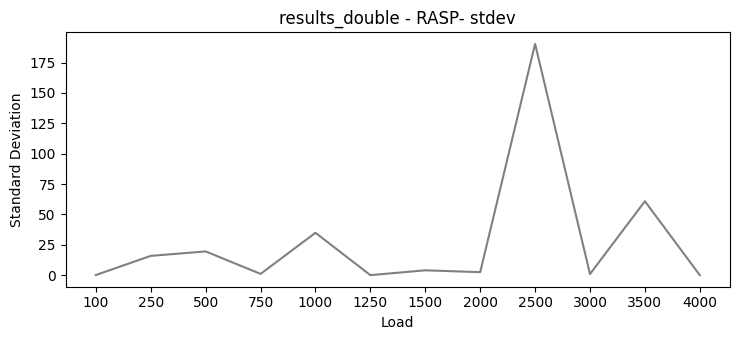

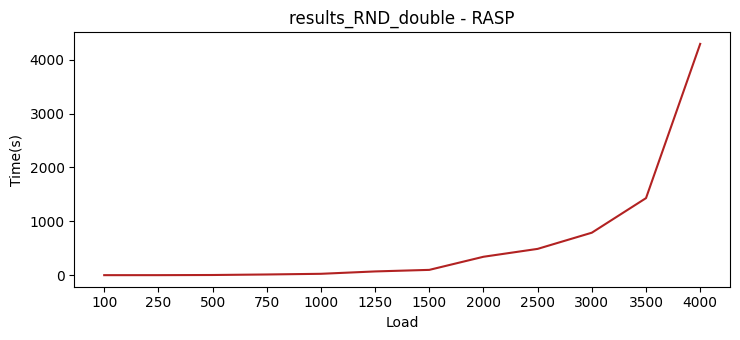

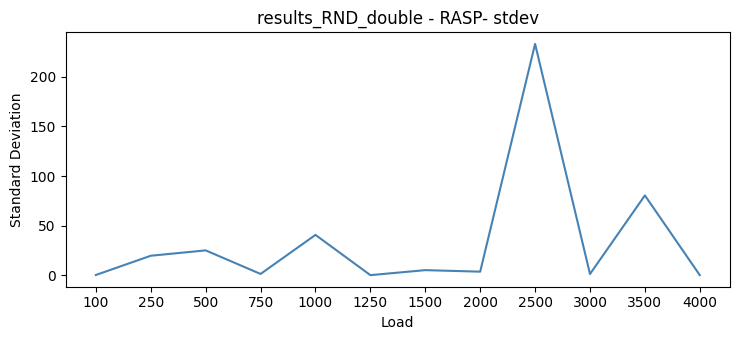

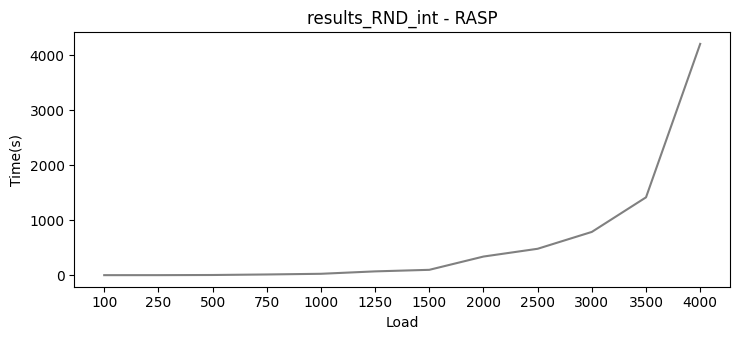

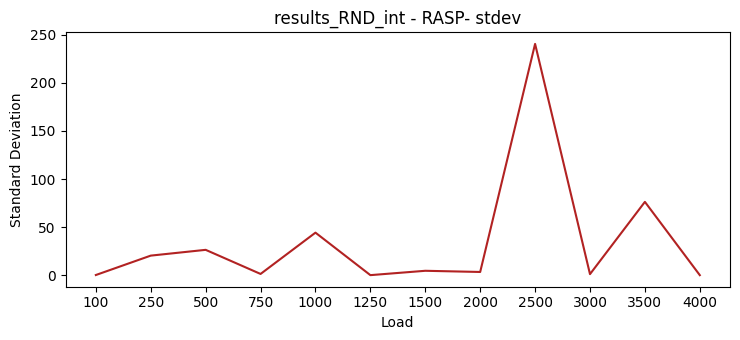

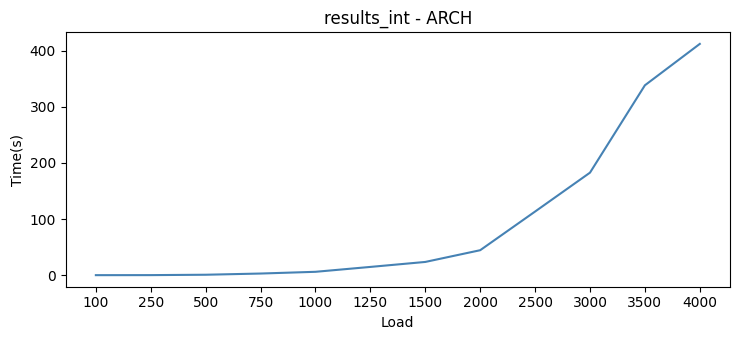

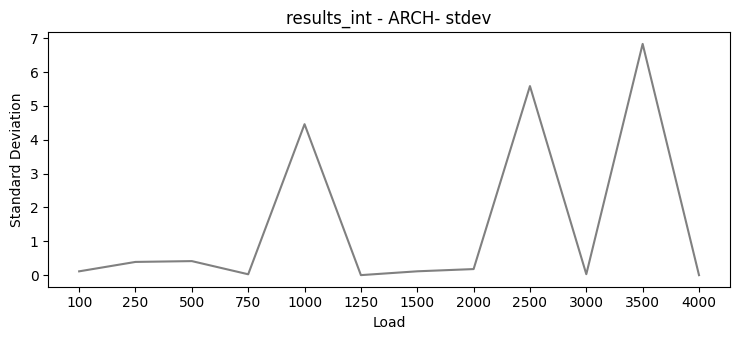

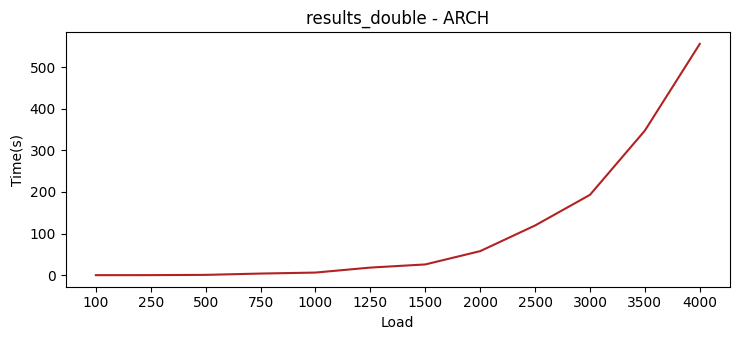

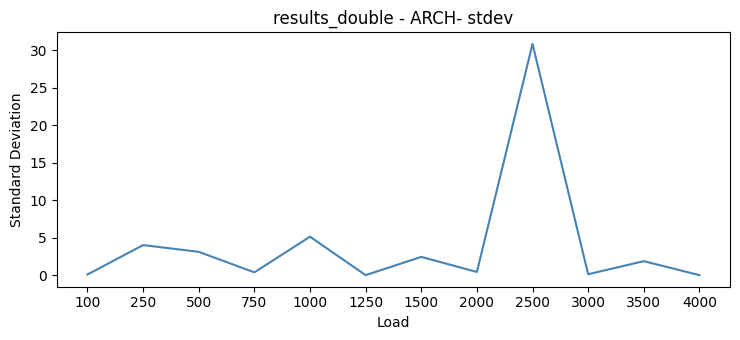

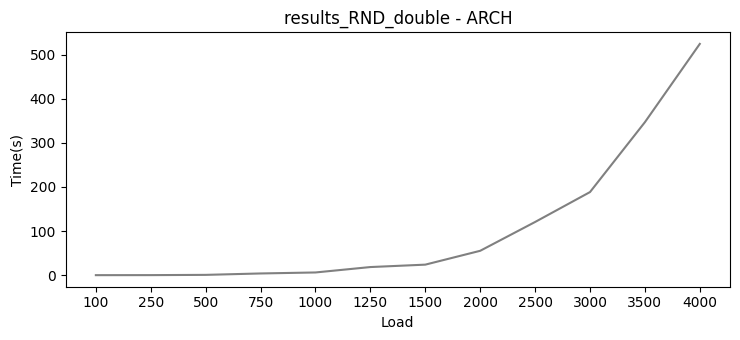

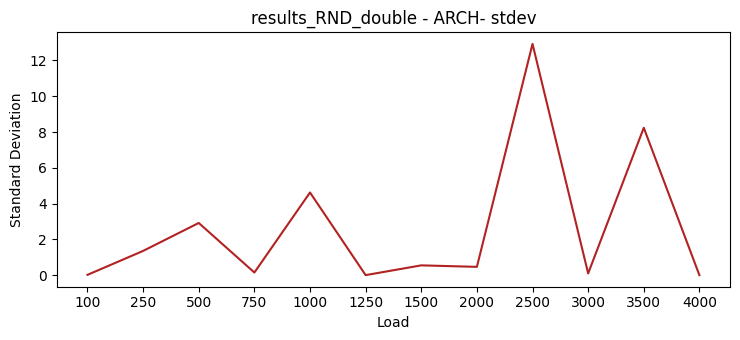

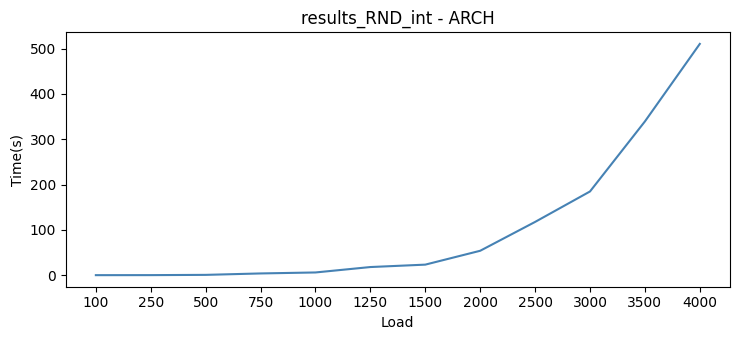

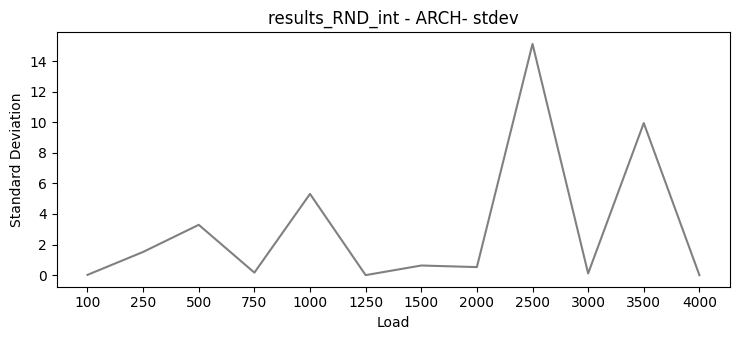

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
color_cycler.reset()


for p in platforms:
    for t in tests:
        ps = []
        names = []
        ps_stdev = []
        for l in loads:
            names.append(f"{l.split('.')[0]}")
            ps.append(mean(benchs[p][t][l]))
            ps_stdev.append(stdev(benchs[p][t][l]))
        s = sorted([(i,j) for i,j in zip(names,ps)],key = lambda aaa: int(aaa[0]))
        names,ps = zip(*s)
        
        plt.xlabel("Load")
        plt.ylabel("Time(s)")
        plt.plot(names,ps, color=next(color_cycler))
        plt.title(f"{t} - {p}")
        plt.savefig(f"{imgpath}/tiempovscarga{t}_{p}.png")
        plt.show()
        plt.xlabel("Load")
        plt.ylabel("Standard Deviation")
        plt.plot(names,ps_stdev, color=next(color_cycler))
        plt.title(f"{t} - {p}- stdev")
        plt.savefig(f"{imgpath}/stdev_tiempovscarga{t}_{p}.png")
        plt.show()
        

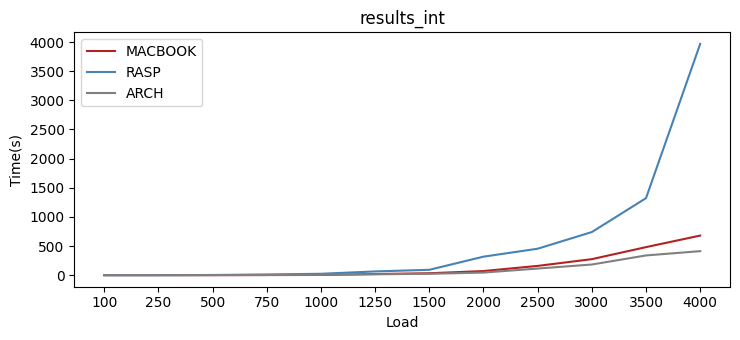

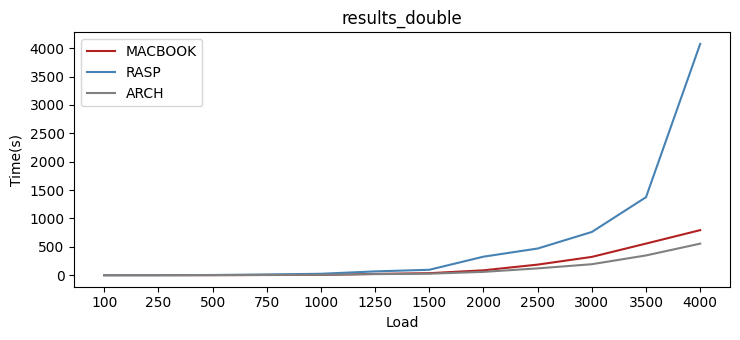

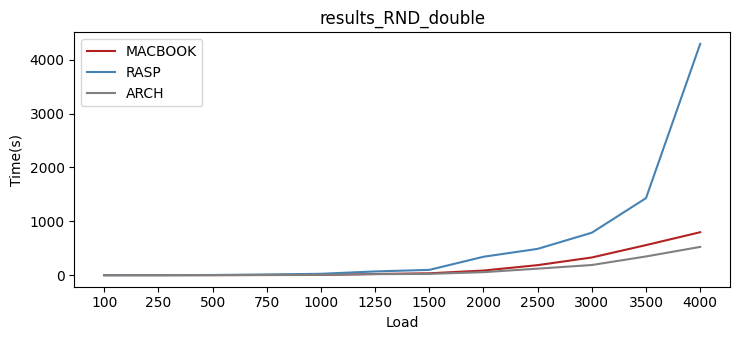

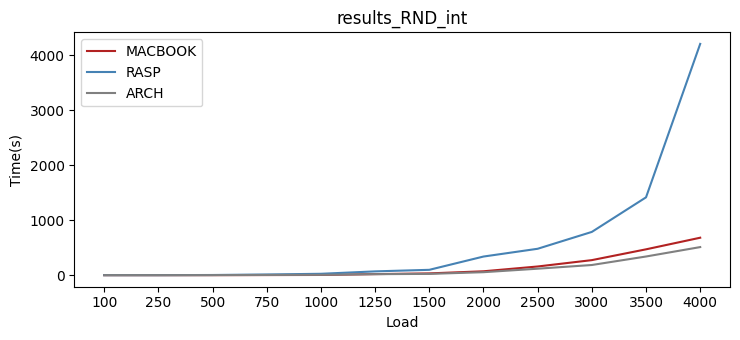

In [14]:

color_cycler.reset()

for t in tests:
    for p in platforms:
        ps = []
        names = []
        ps_stdev = []
        for l in loads:
            names.append(f"{l.split('.')[0]}")
            ps.append(mean(benchs[p][t][l]))
            ps_stdev.append(stdev(benchs[p][t][l]))
        s = sorted([(i,j) for i,j in zip(names,ps)],key = lambda aaa: int(aaa[0]))
        names,ps = zip(*s)
        color = next(color_cycler)
        
        plt.plot(names,ps, color=color, label=f'{p}')
    plt.xlabel("Load")
    plt.ylabel("Time(s)")
    color_cycler.reset()
    plt.title(f"{t}")
    plt.legend()
    plt.savefig(f"{imgpath}/comparativatiempovscarga{t}.png")
    plt.show()


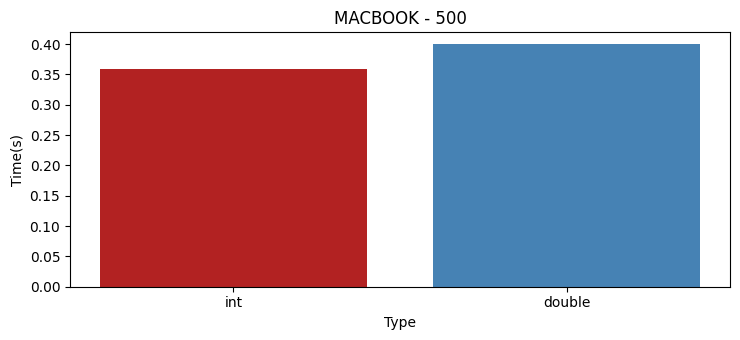

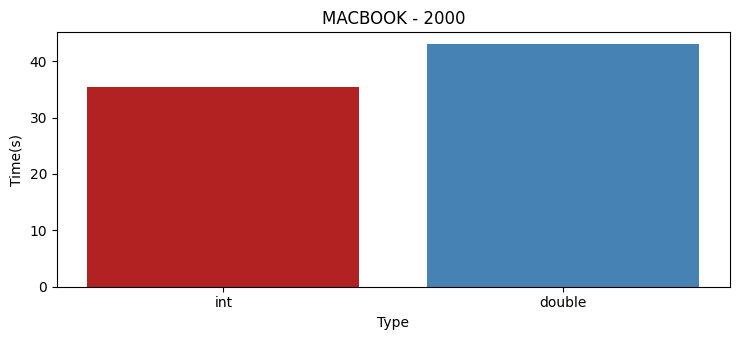

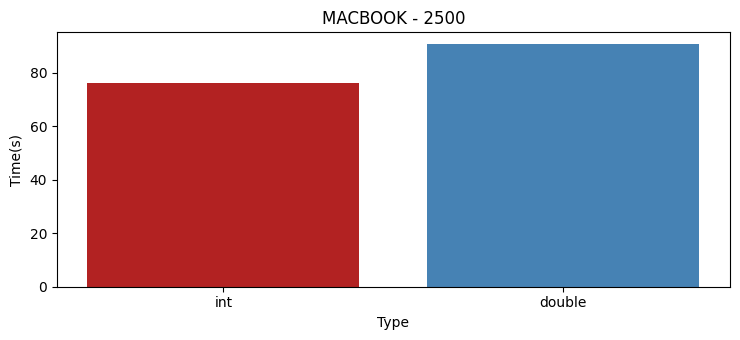

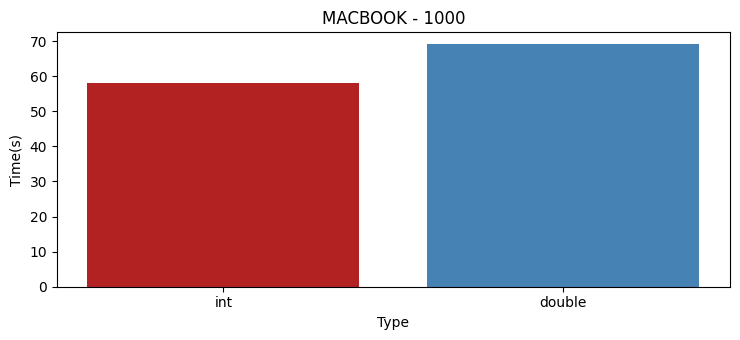

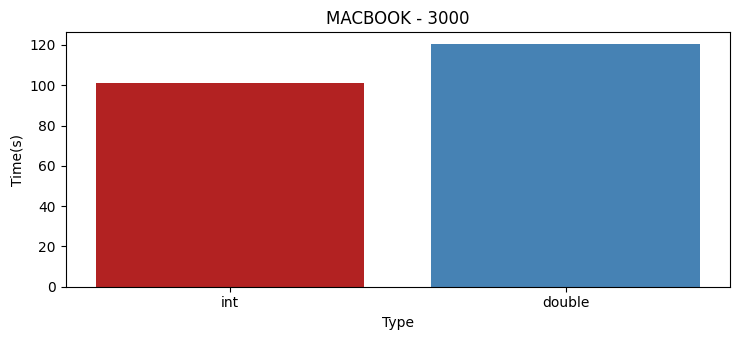

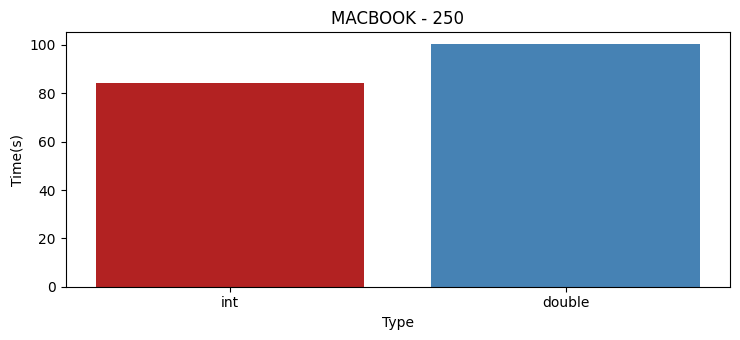

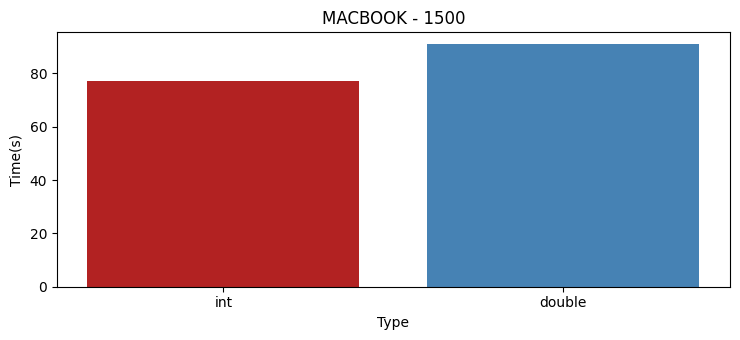

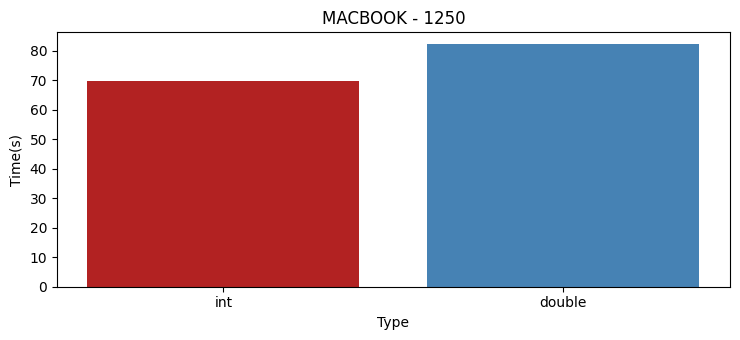

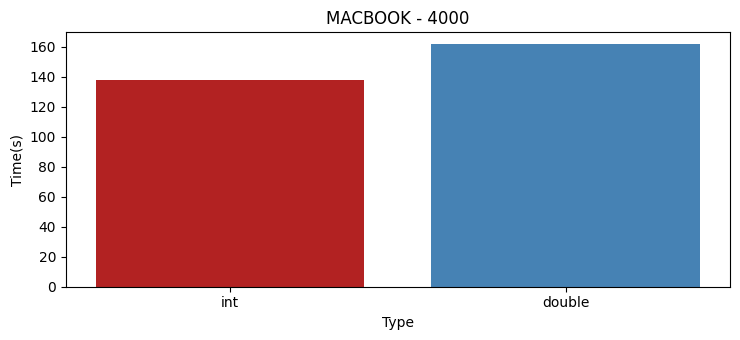

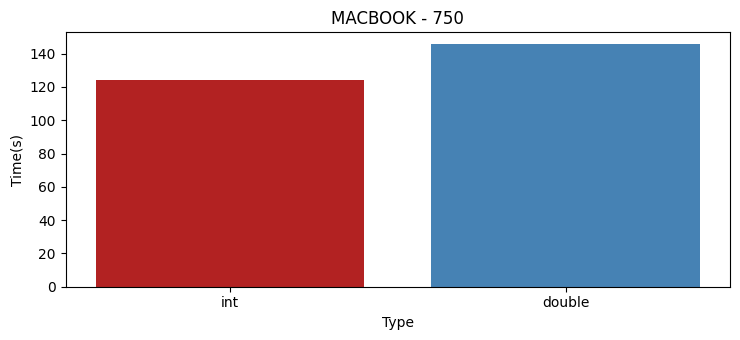

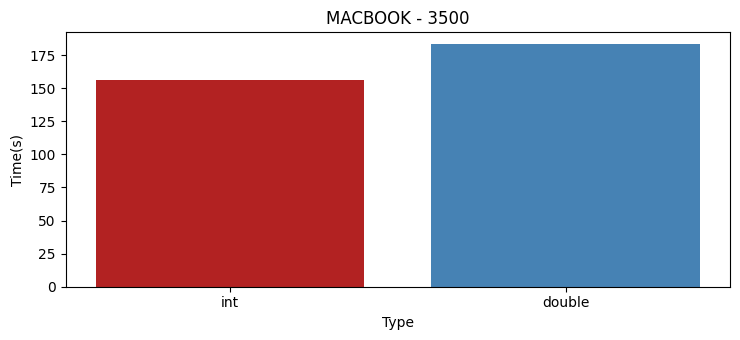

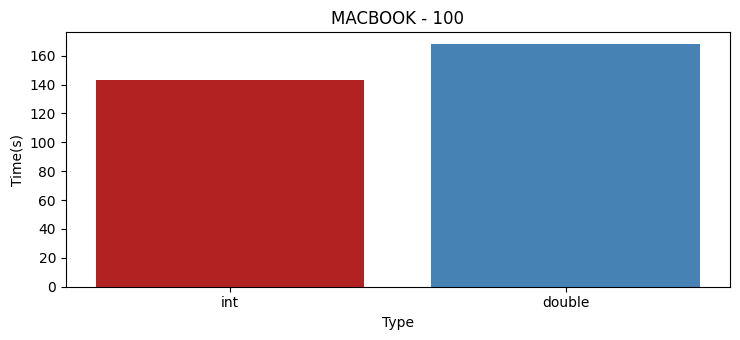

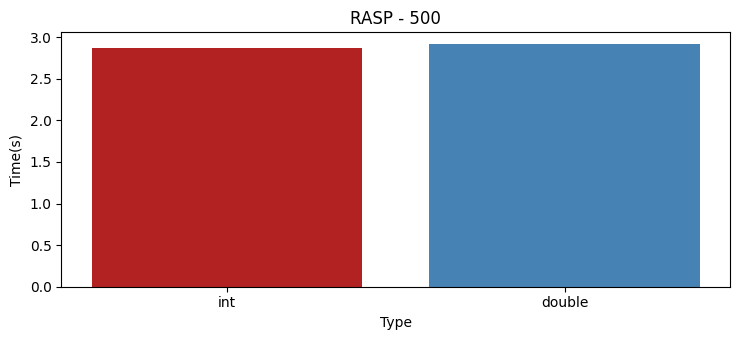

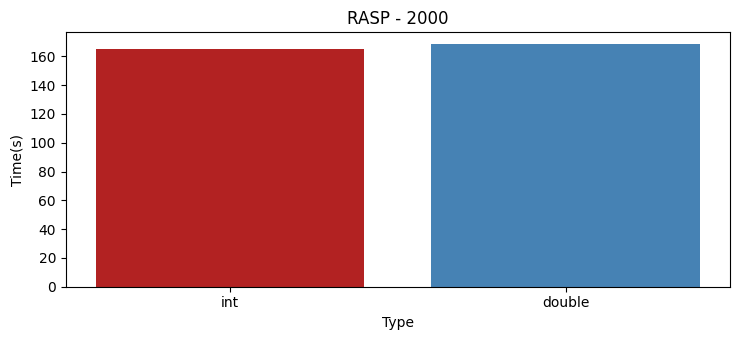

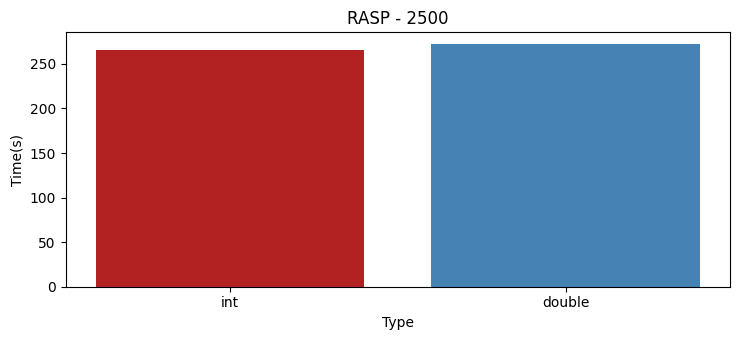

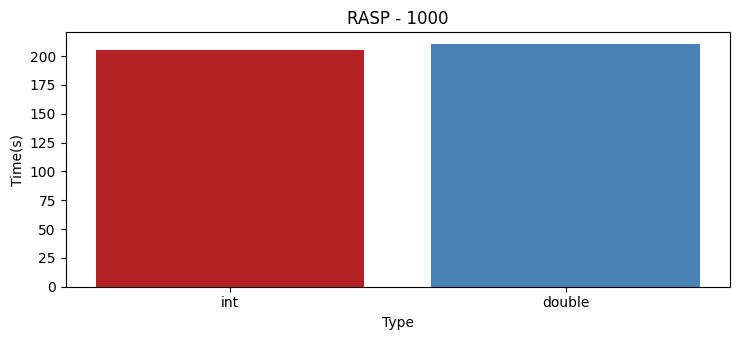

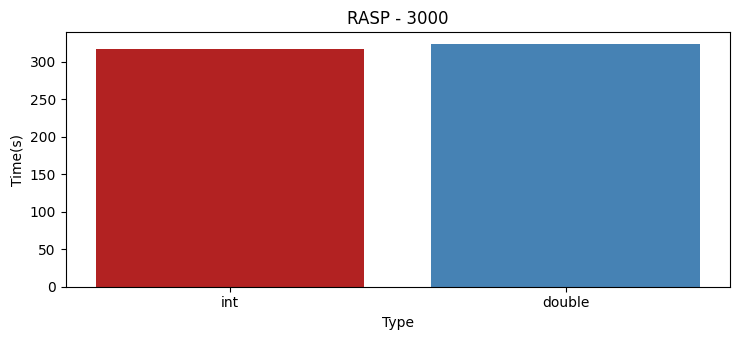

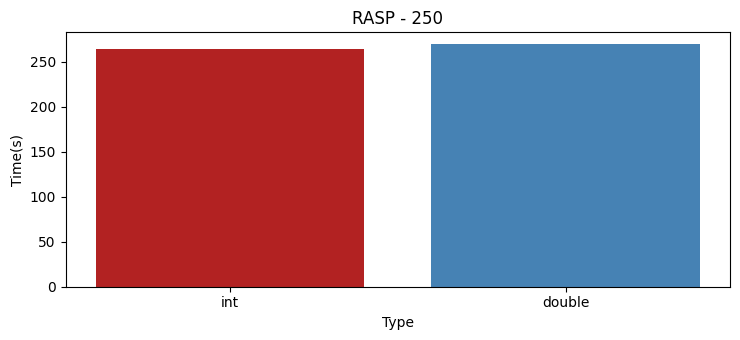

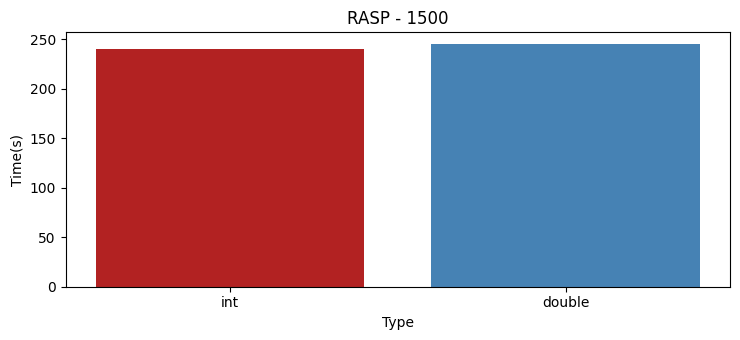

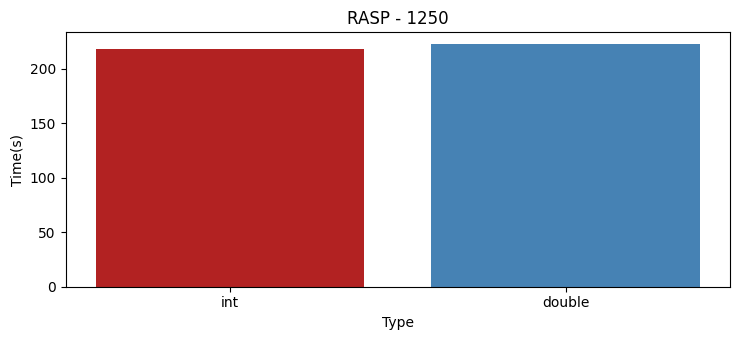

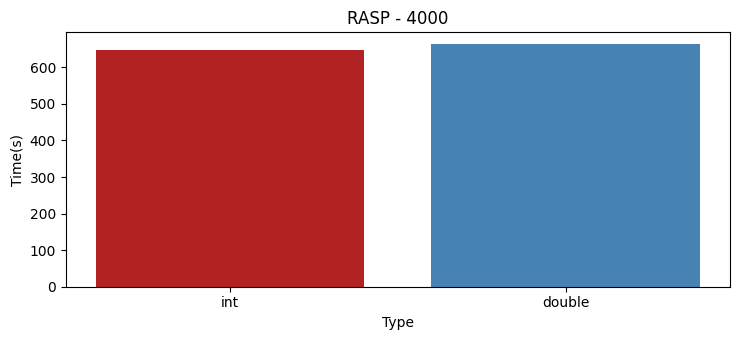

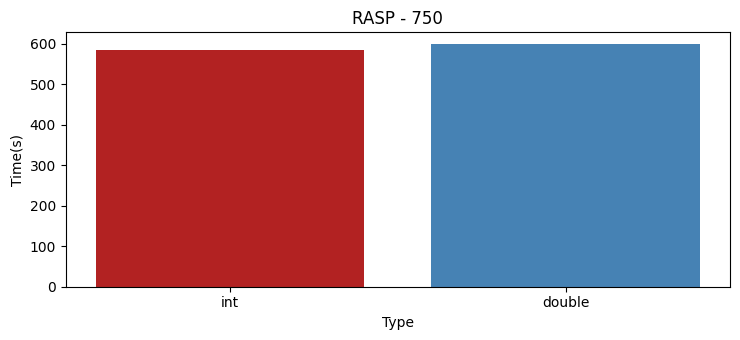

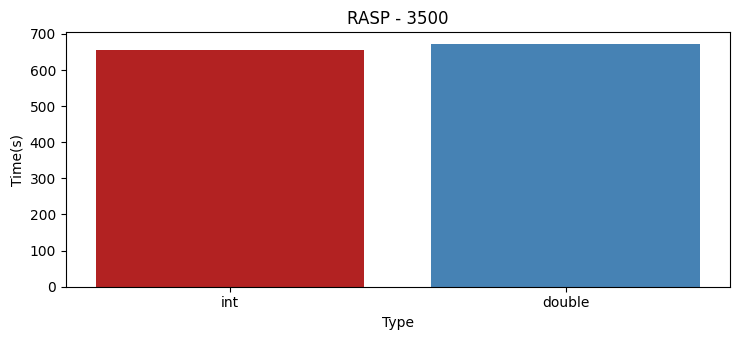

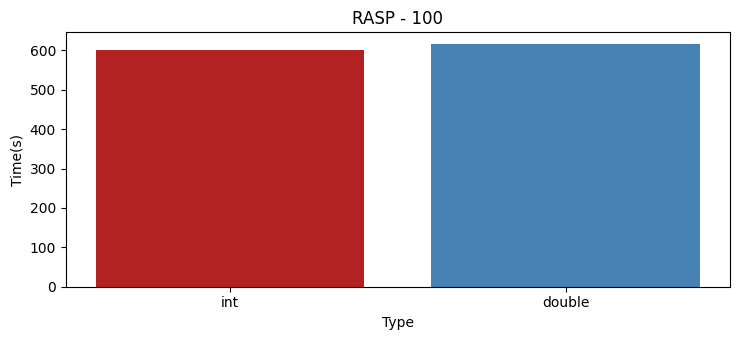

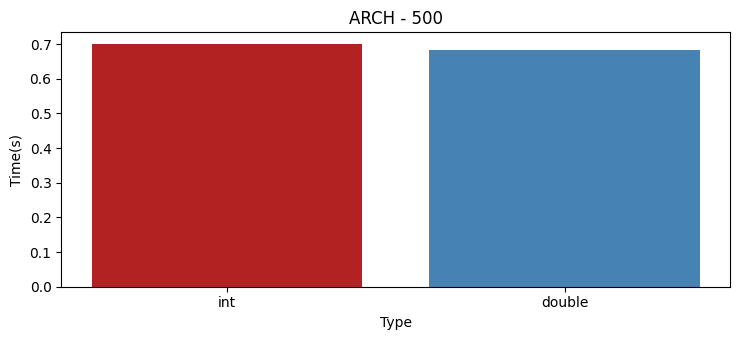

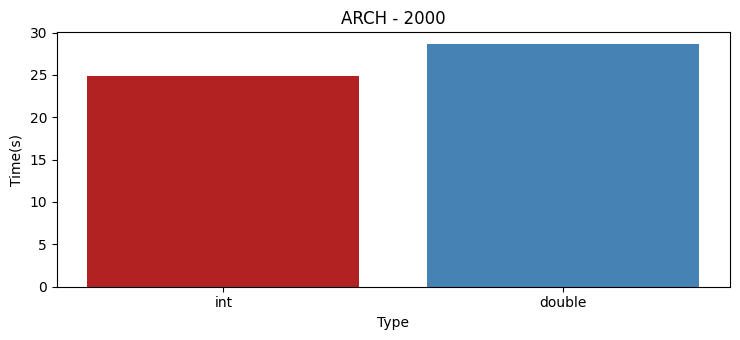

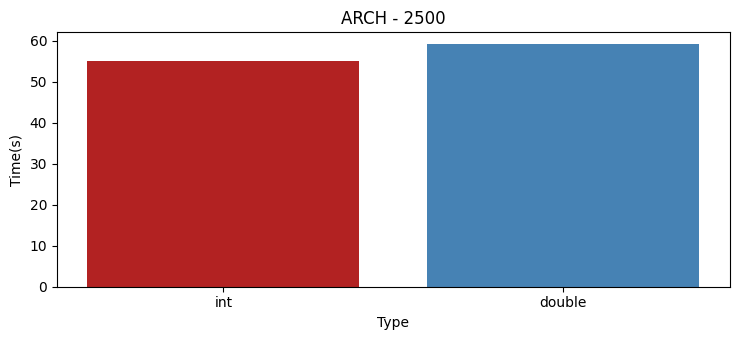

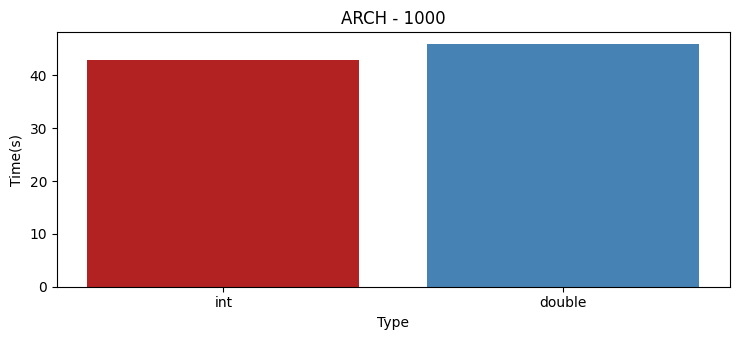

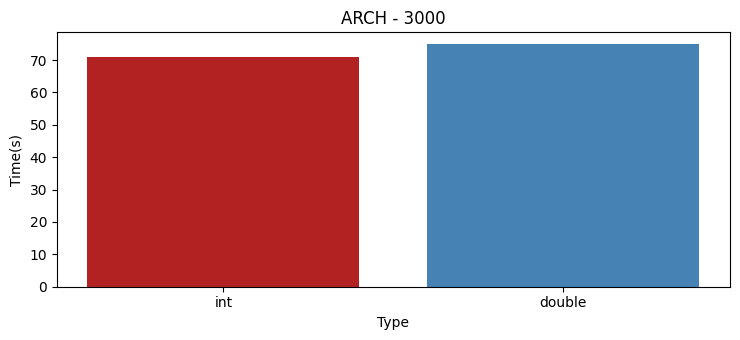

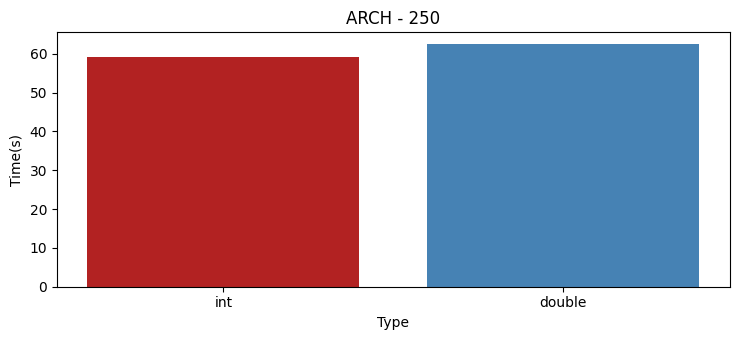

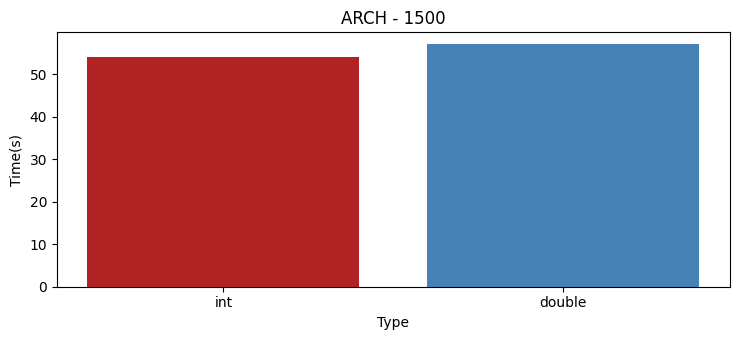

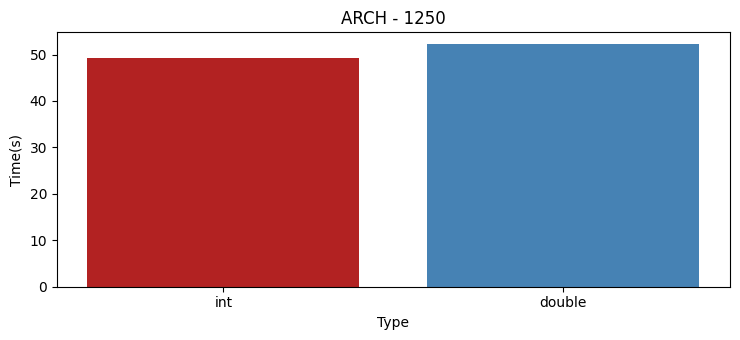

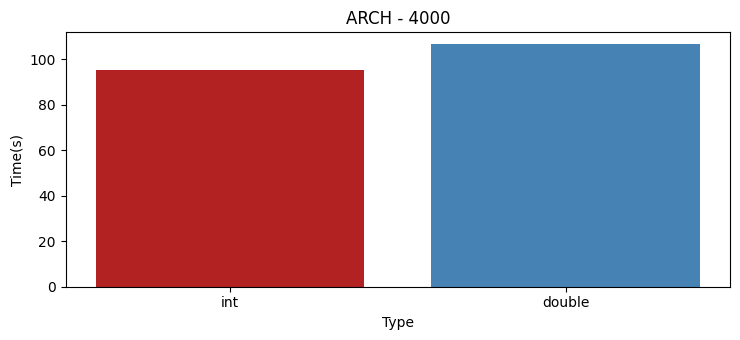

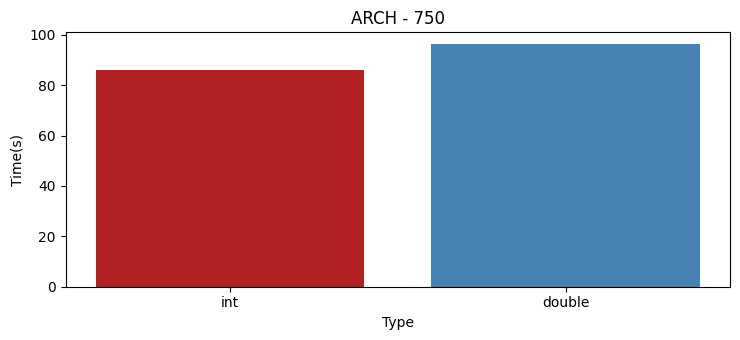

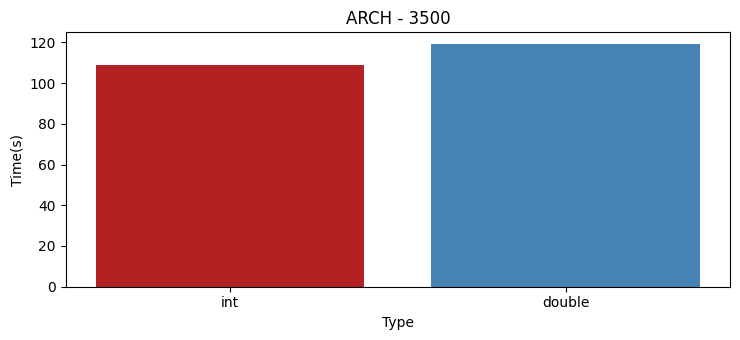

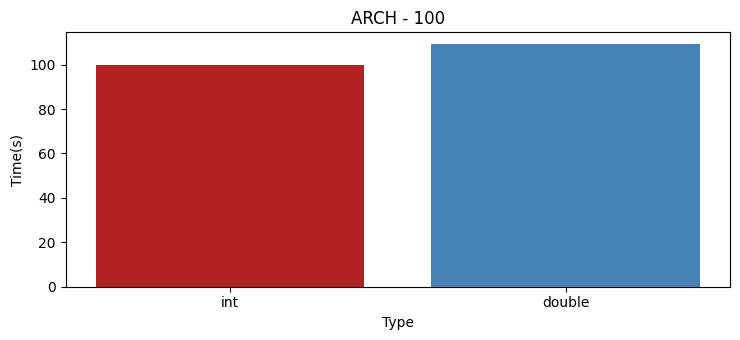

In [15]:
color_cycler.reset()
types = set(x.split("_")[-1] for x in tests)



for p in platforms:
    
    
    ps = {x:[] for x in types}
    names = []



    for l in loads:
        for t in tests:
            names.append(f"{l.split('.')[0]}")
            ps[t.split("_")[-1]].append(mean(benchs[p][t][l]))
        s = sorted([(i,j) for i,j in zip(names,ps)],key = lambda aaa: int(aaa[0]))
        #names,ps = zip(*s)


        plt.bar(list(types),  [mean(x) for x in ps.values()], color = color_cycler(len(types)))
        plt.xlabel("Type")
        plt.ylabel("Time(s)")
        color_cycler.reset()
        plt.title(f"{p} - {l.split('.')[0]}")
        plt.savefig(f"{imgpath}/types_barracomparativa{p}_{l.split('.')[0]}.png")
        plt.show()


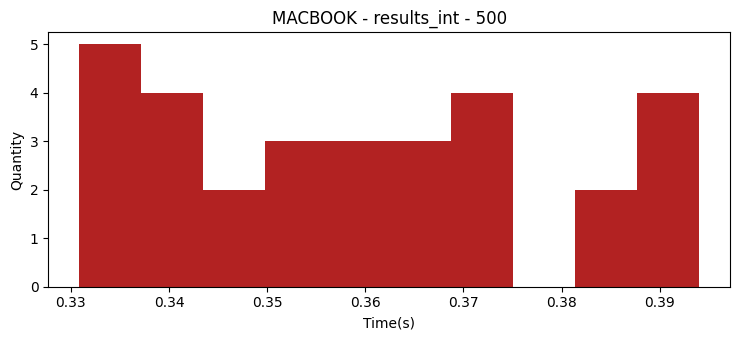

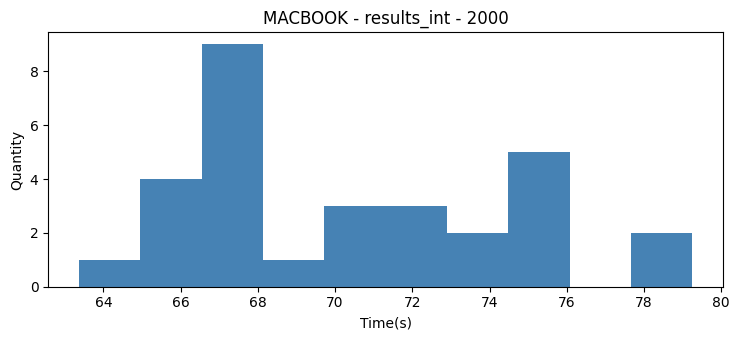

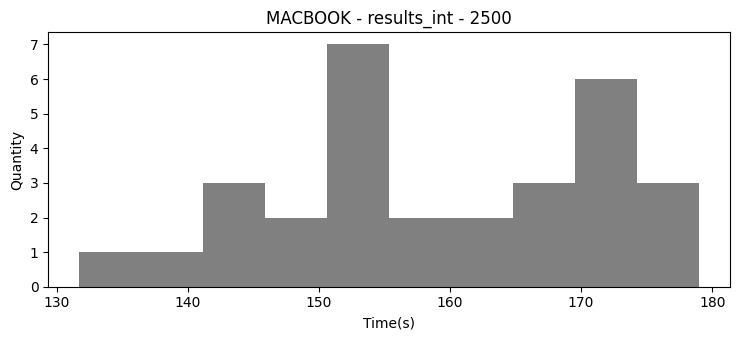

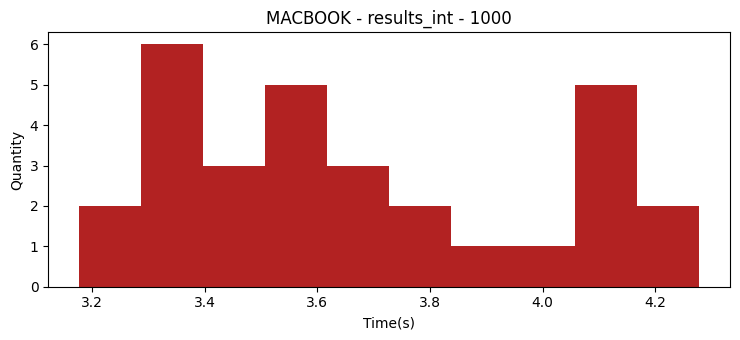

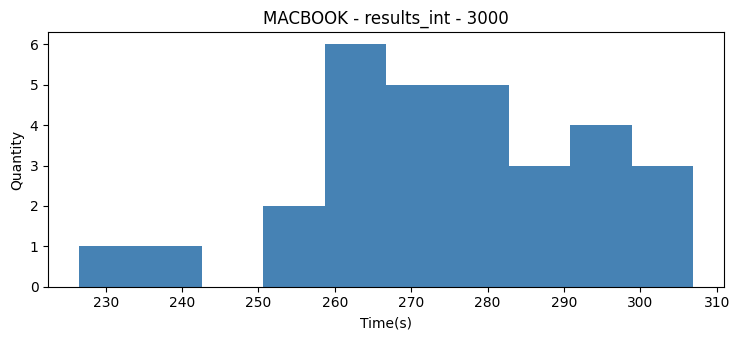

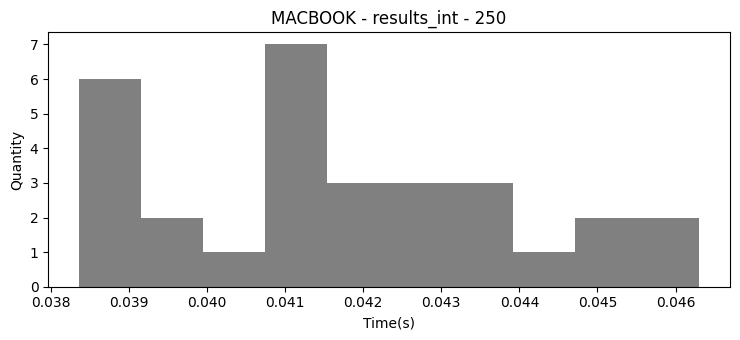

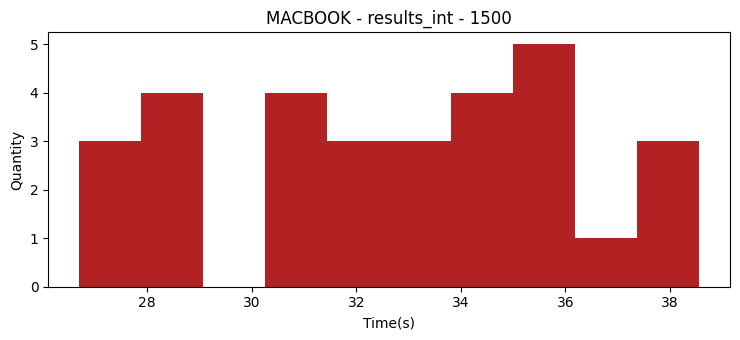

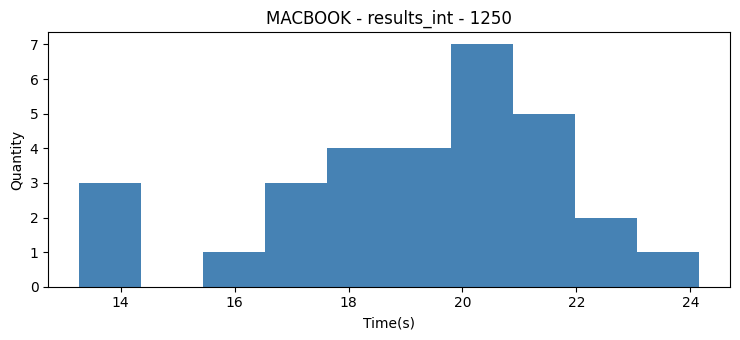

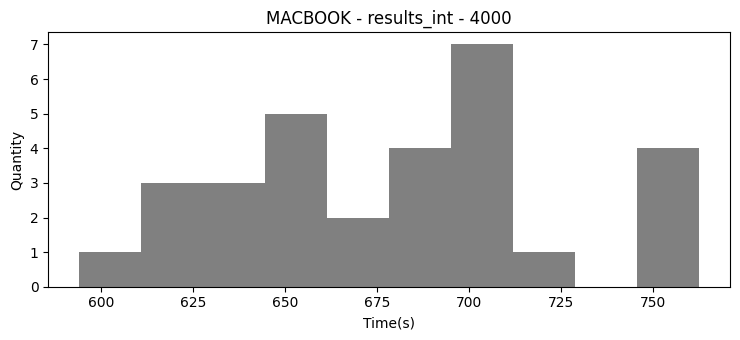

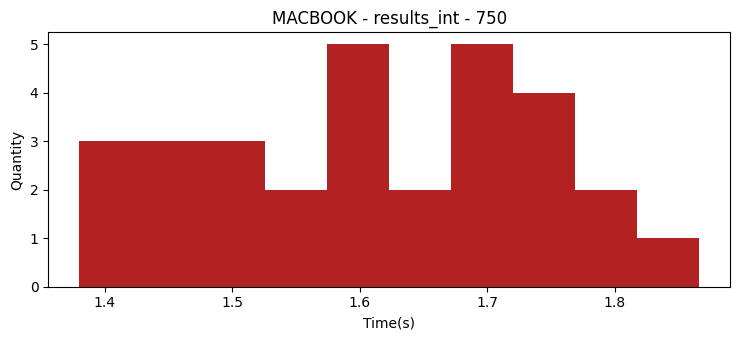

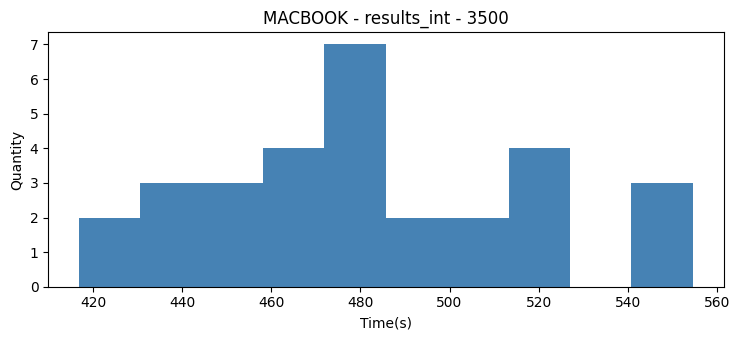

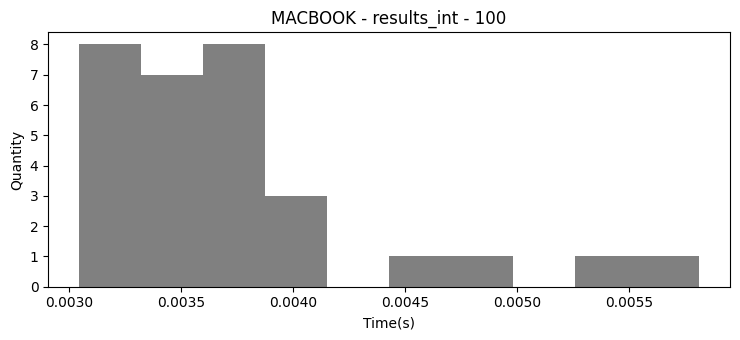

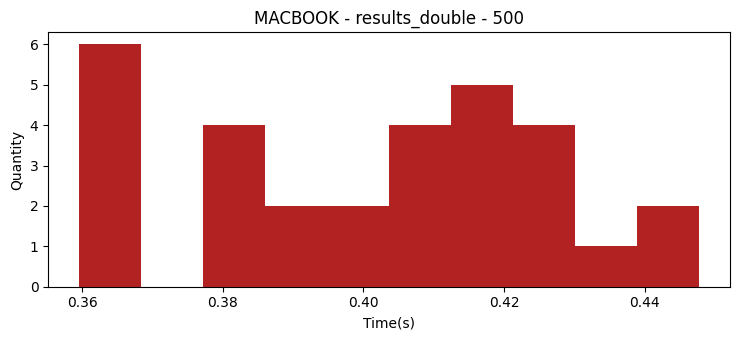

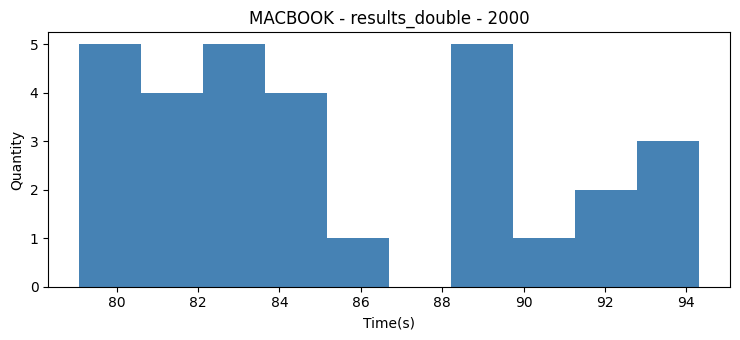

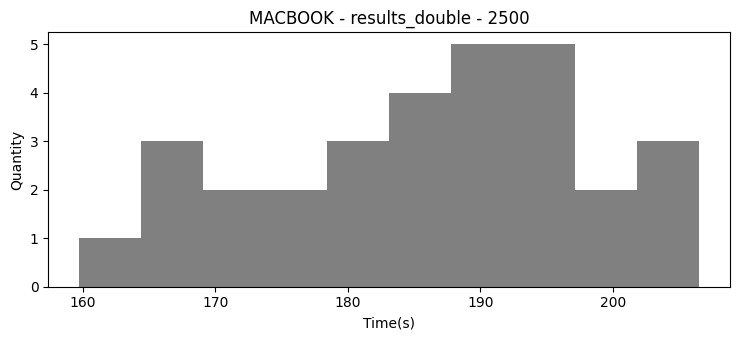

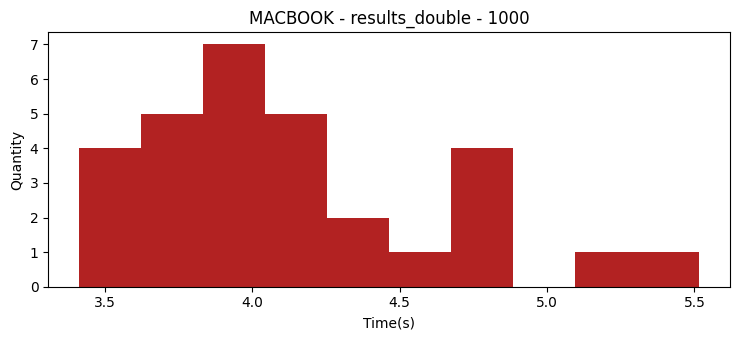

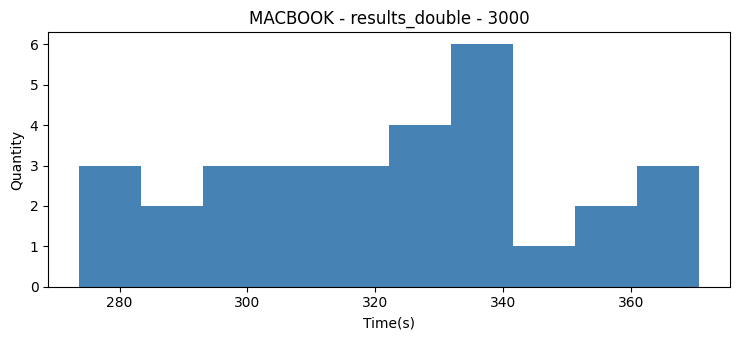

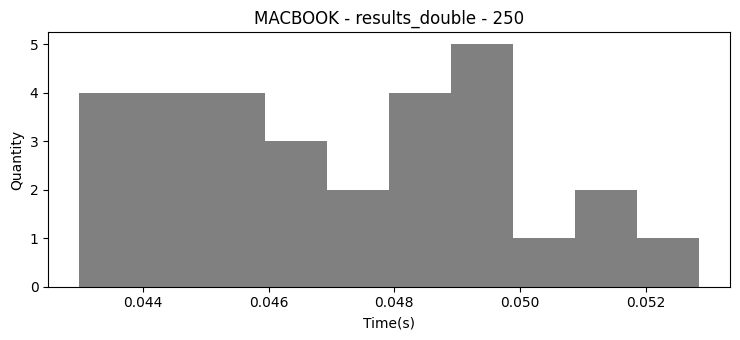

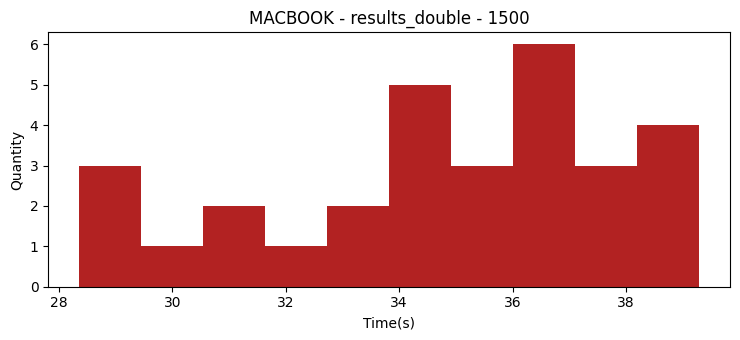

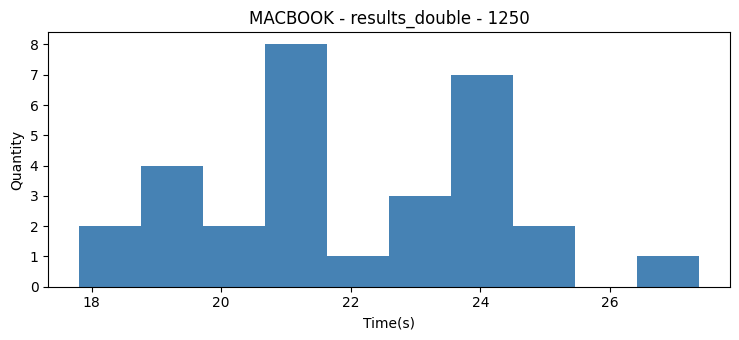

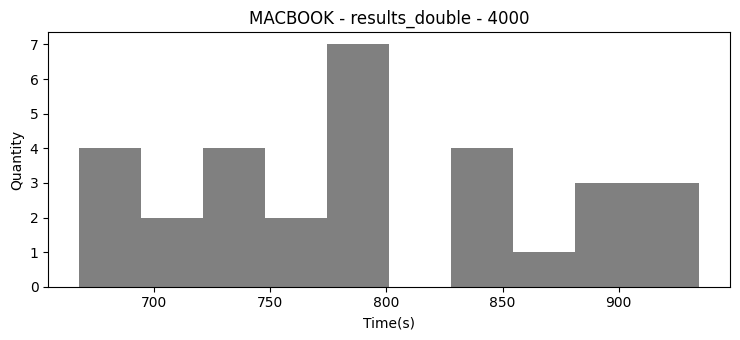

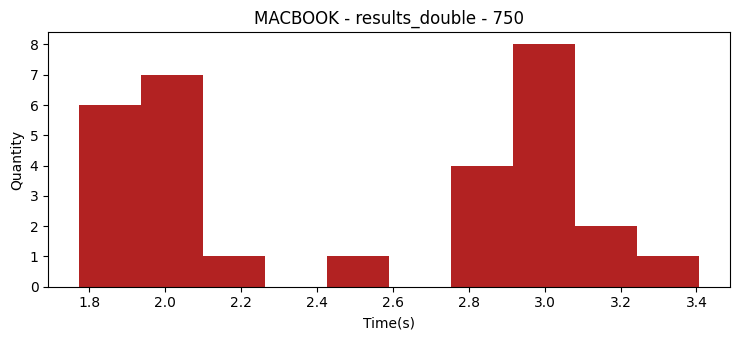

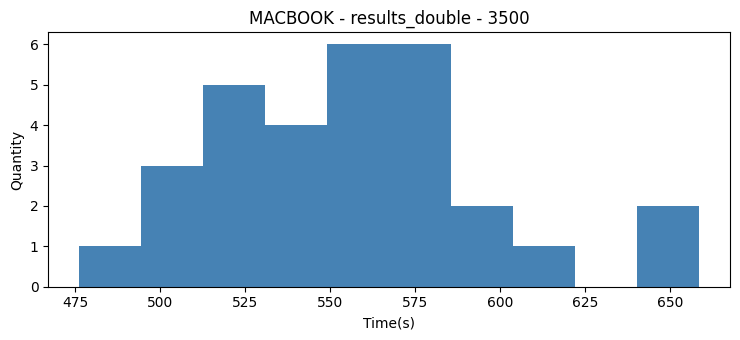

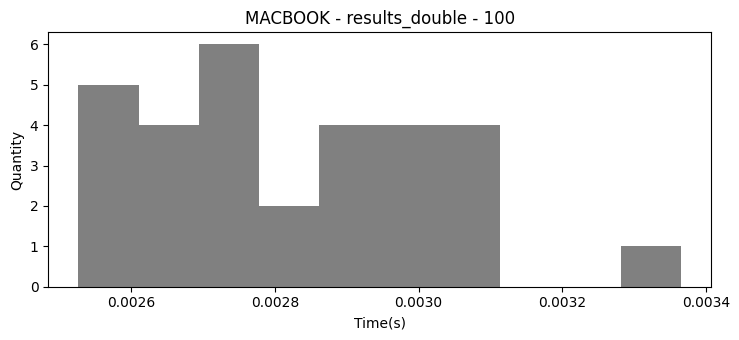

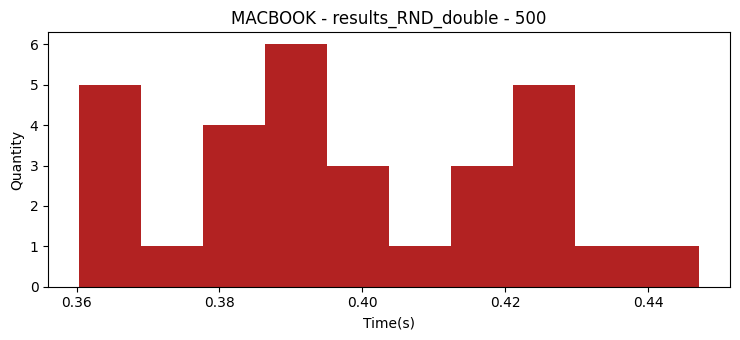

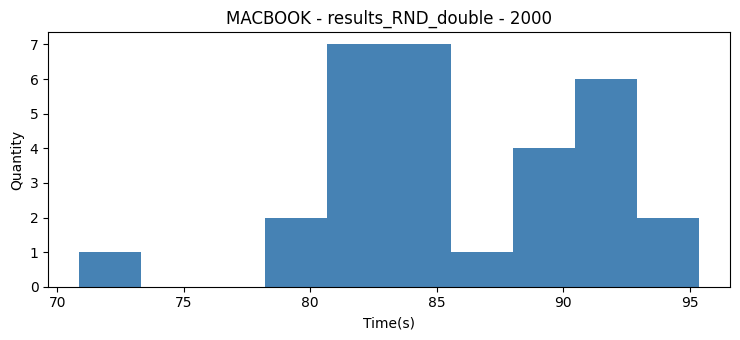

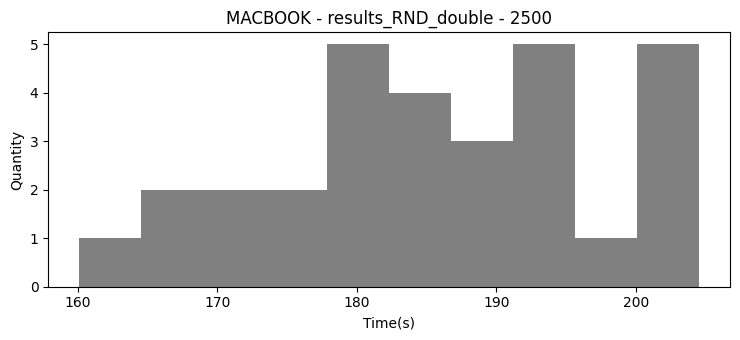

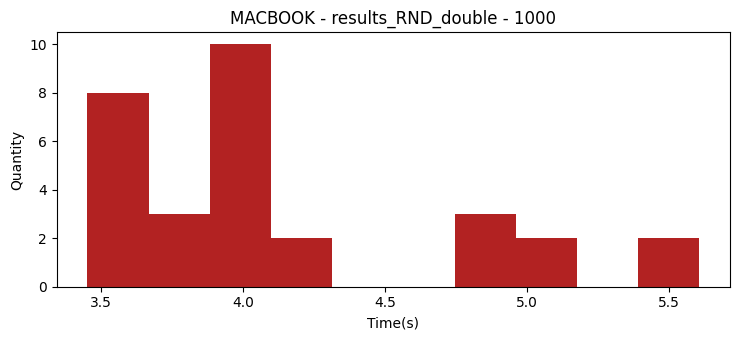

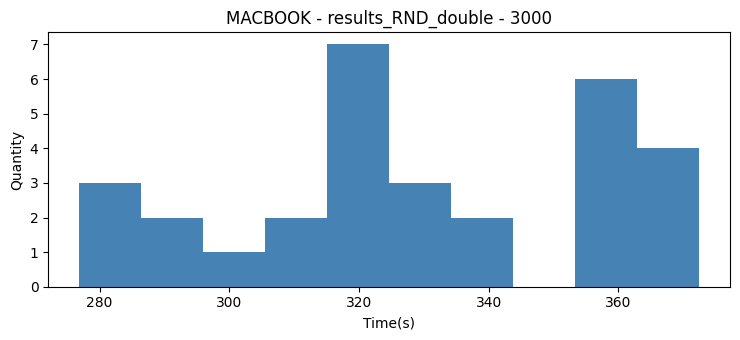

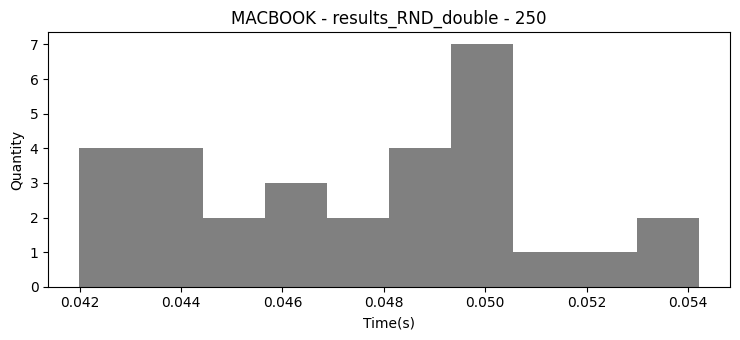

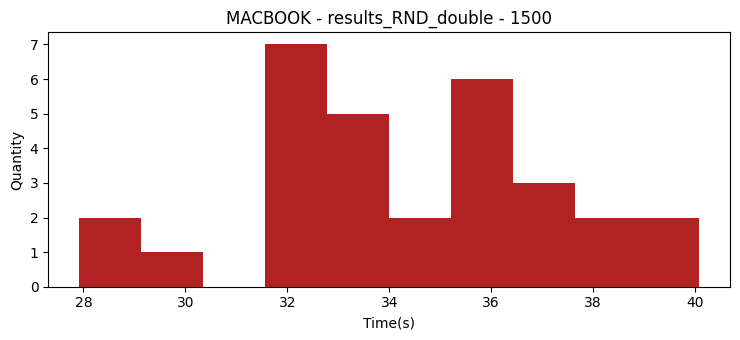

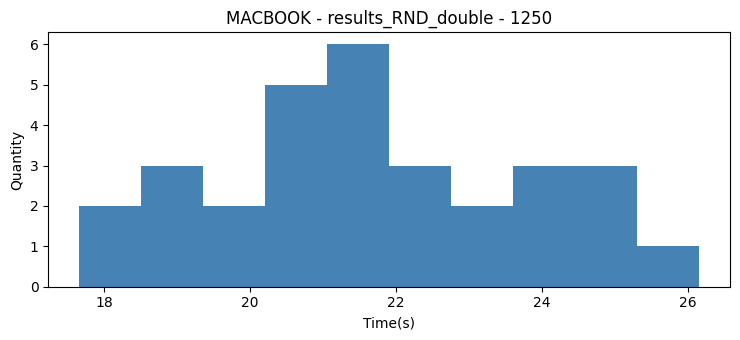

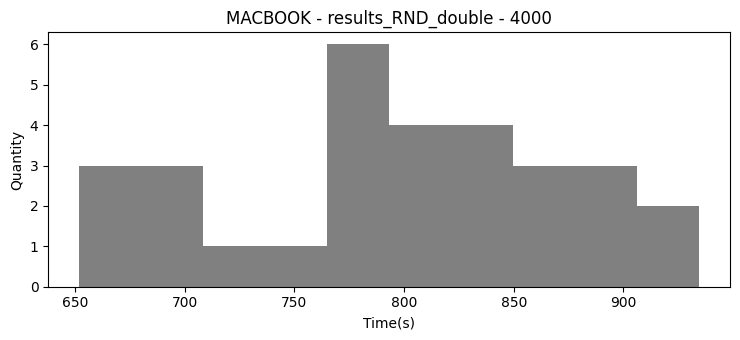

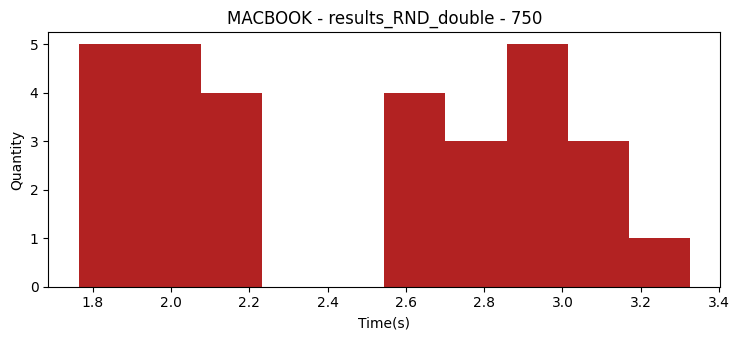

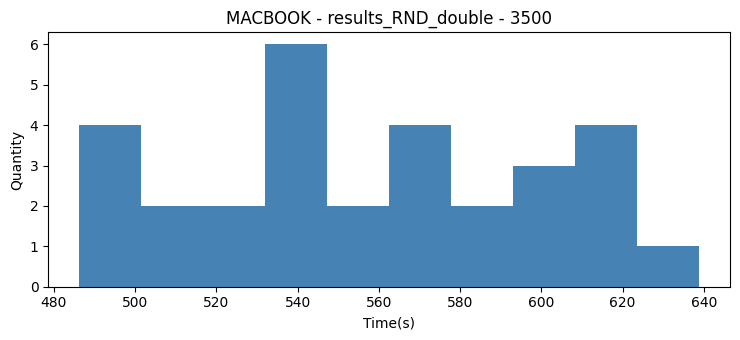

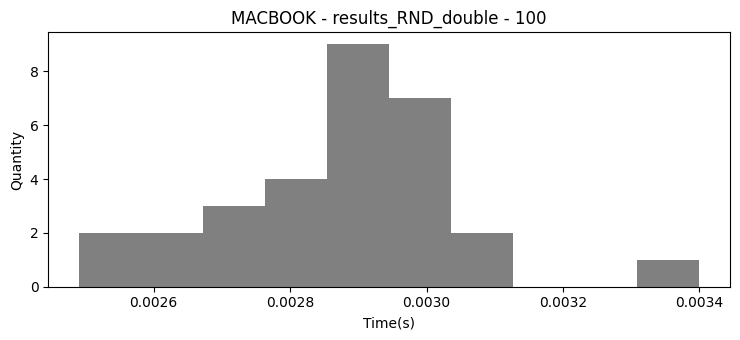

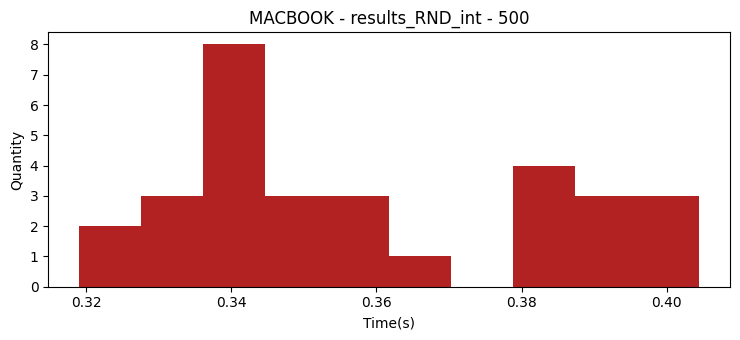

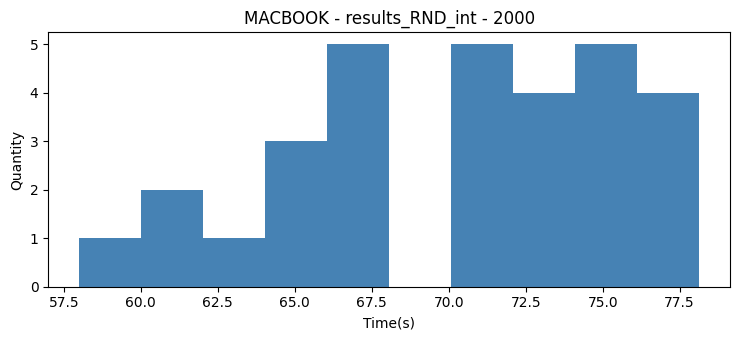

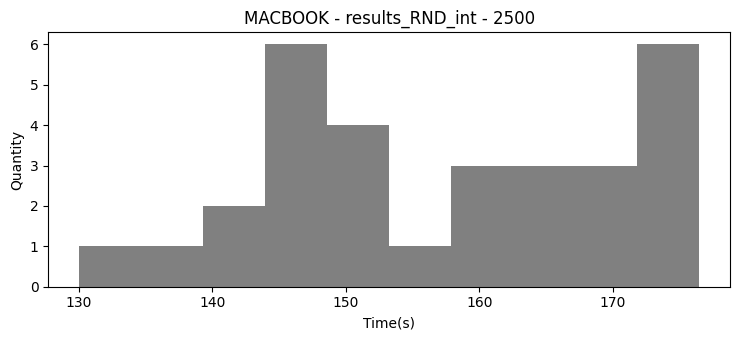

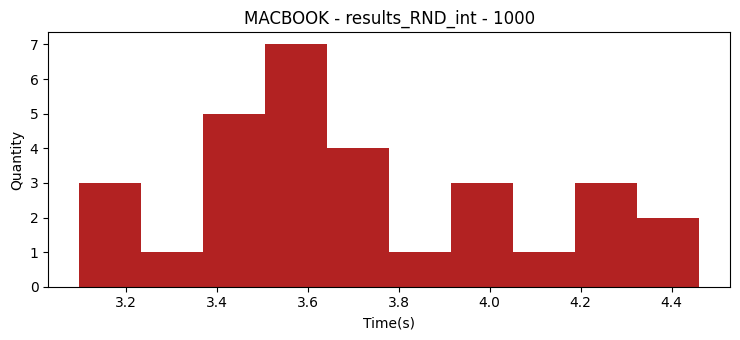

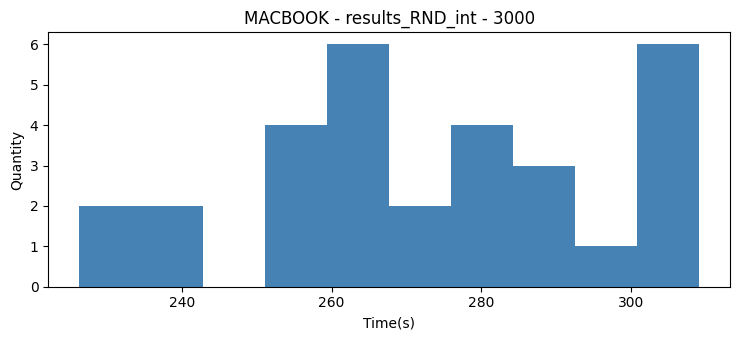

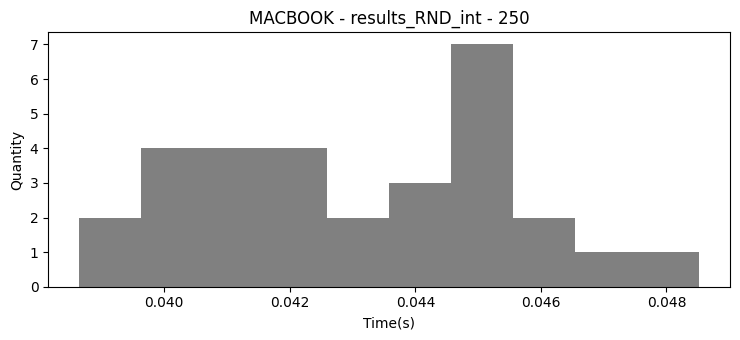

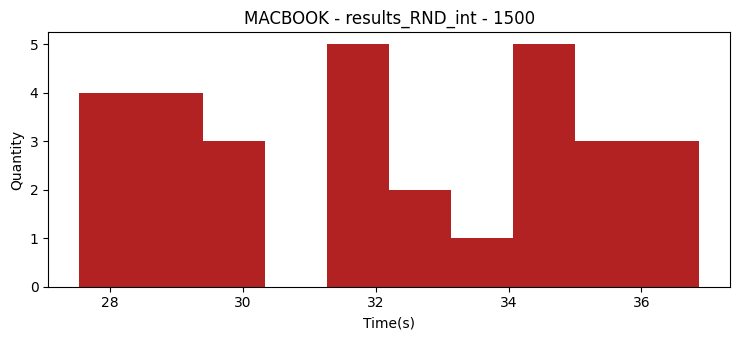

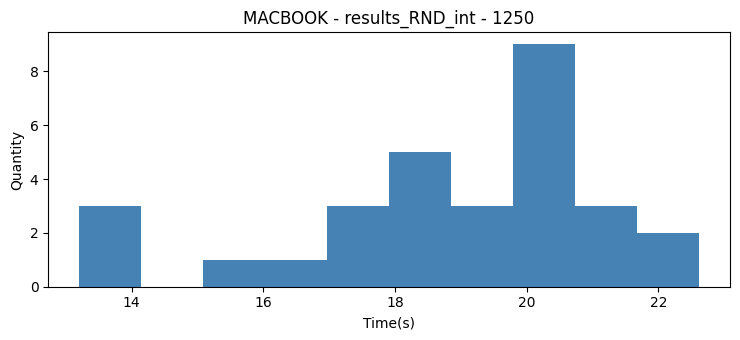

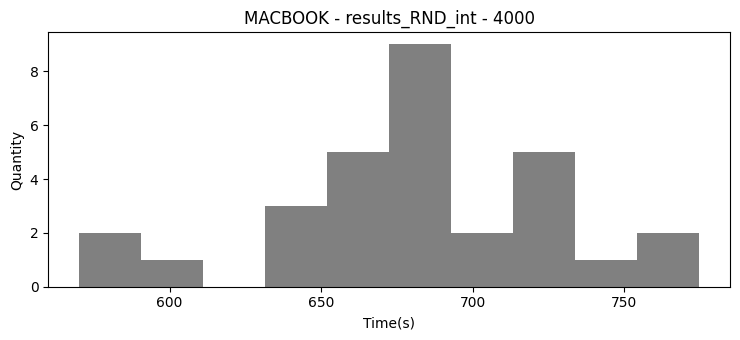

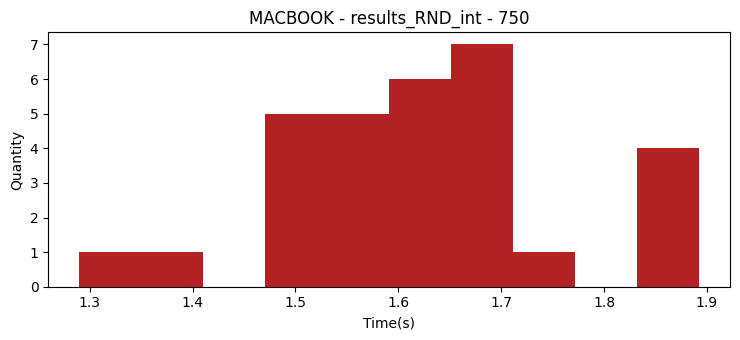

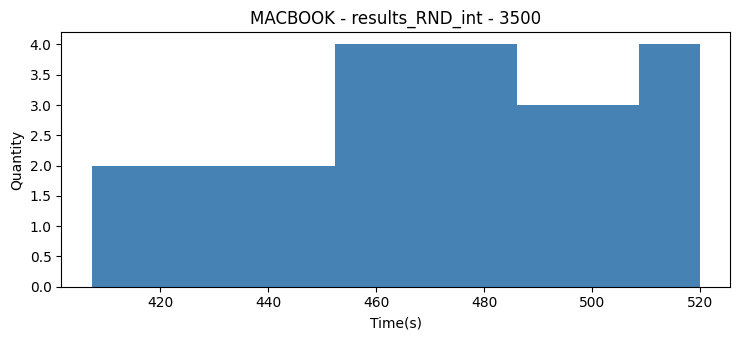

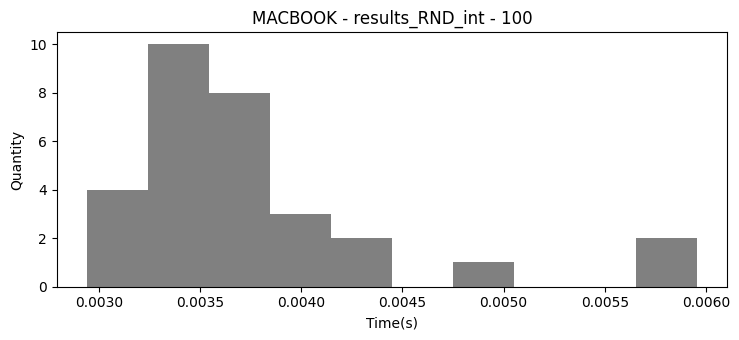

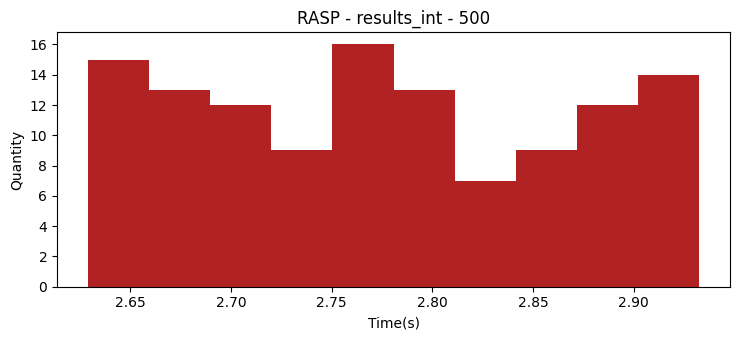

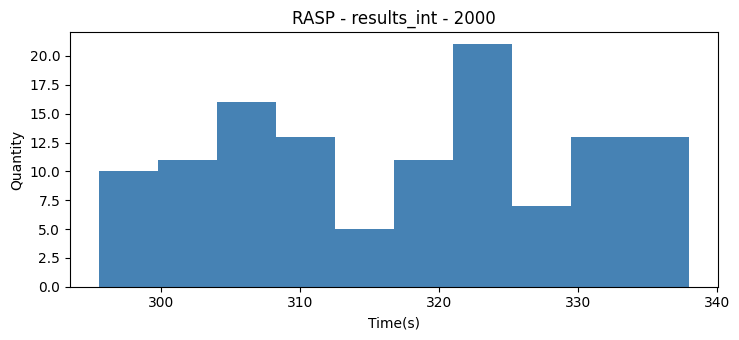

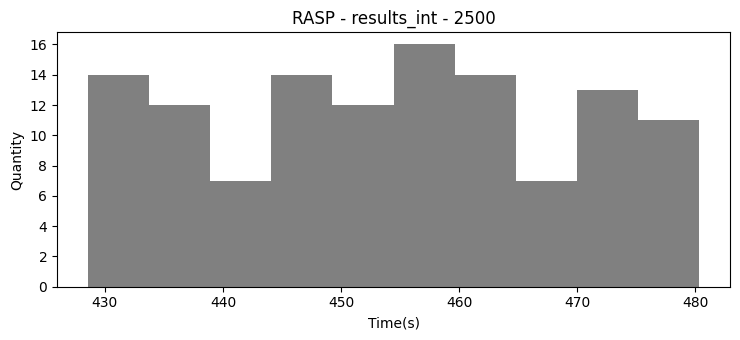

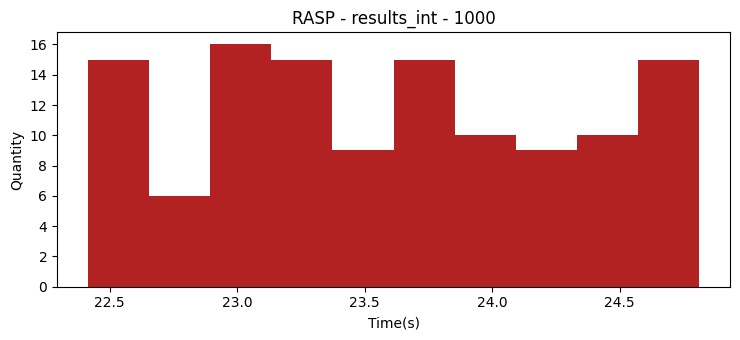

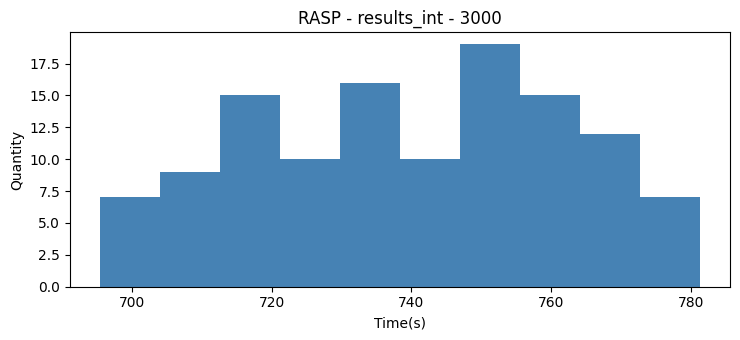

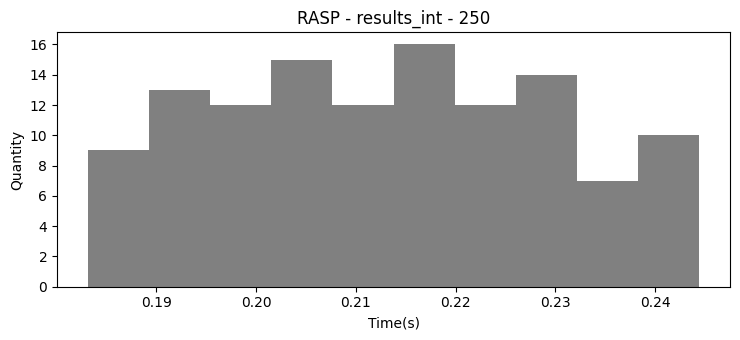

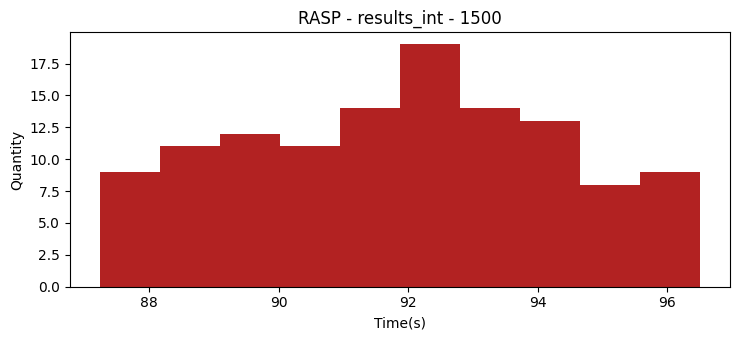

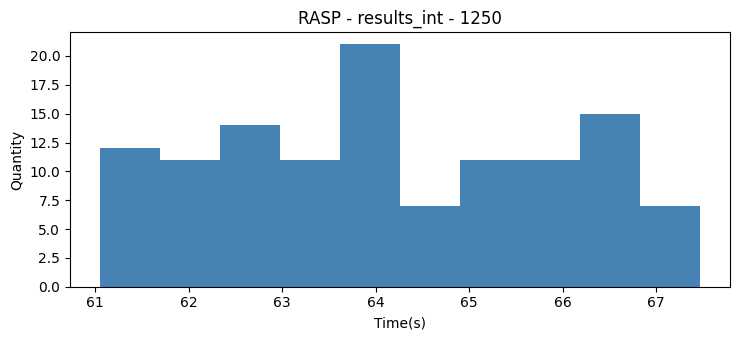

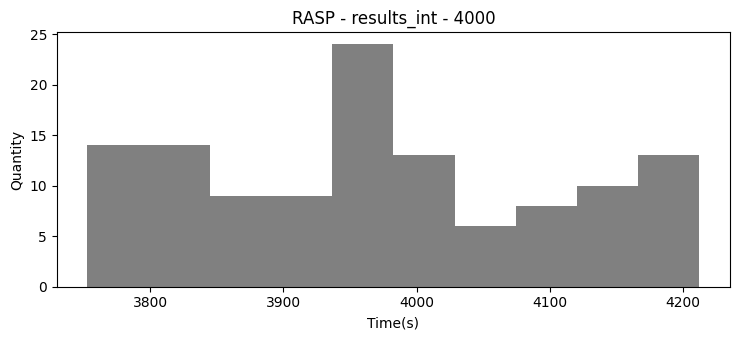

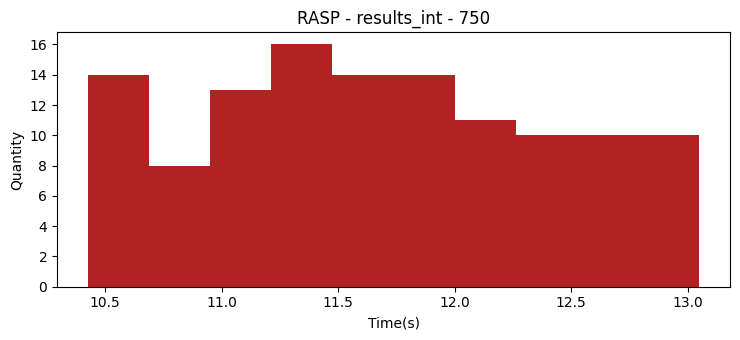

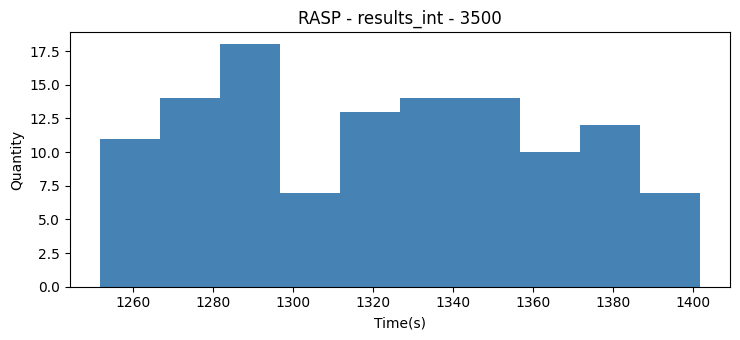

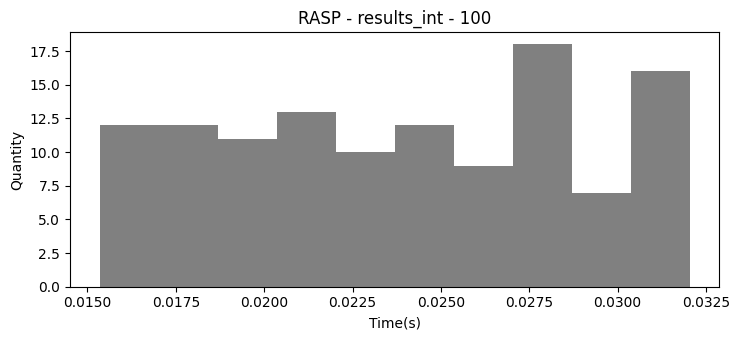

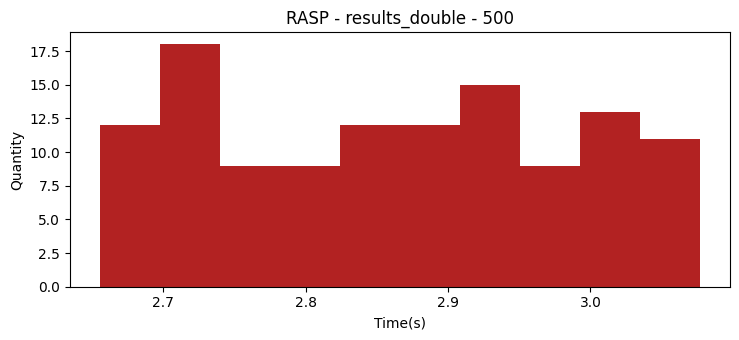

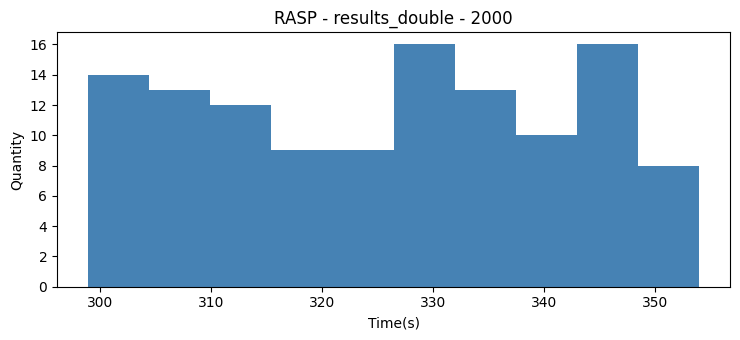

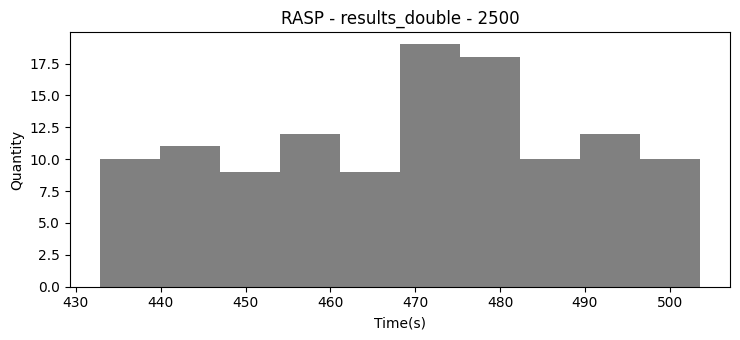

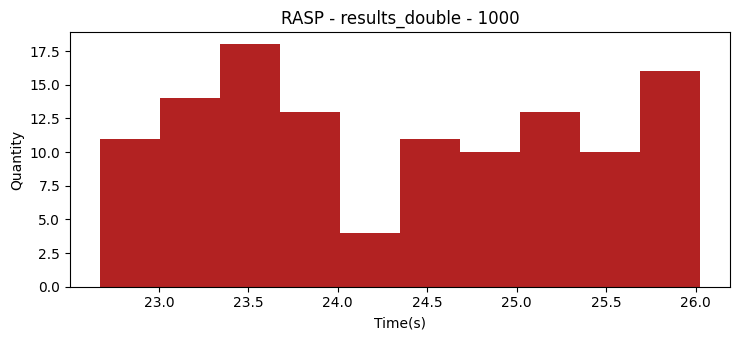

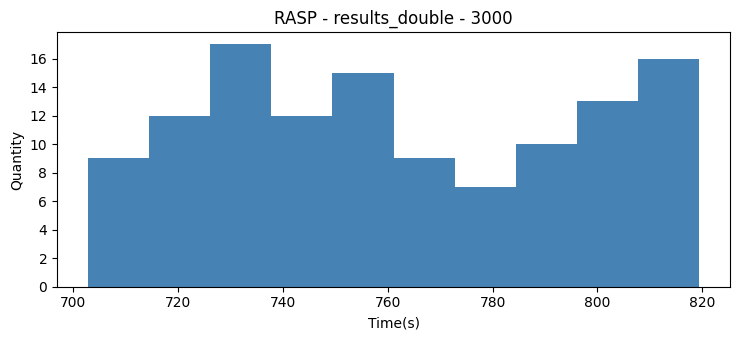

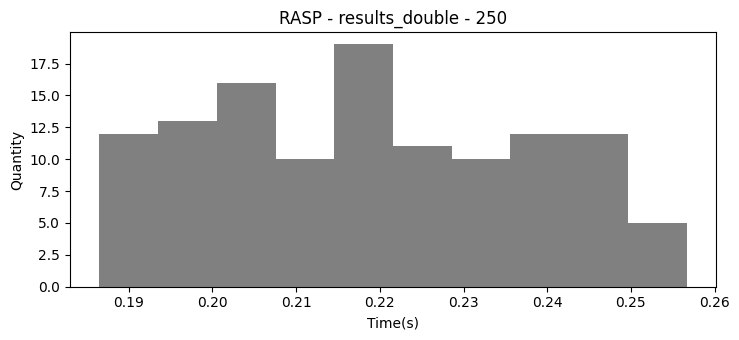

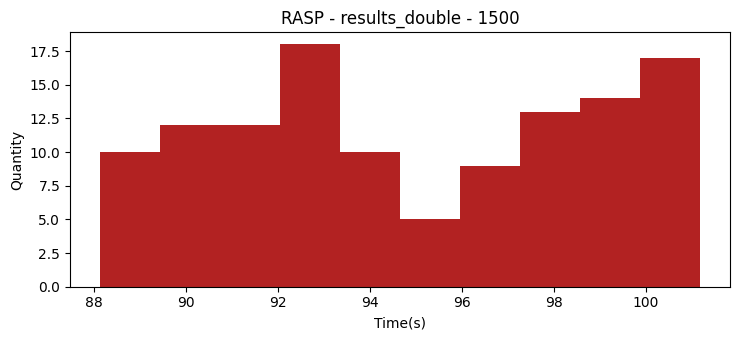

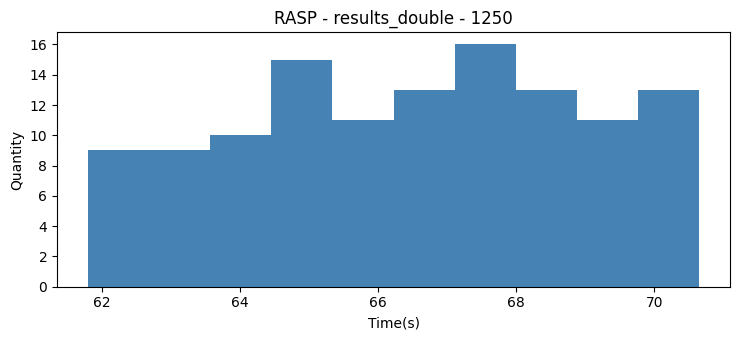

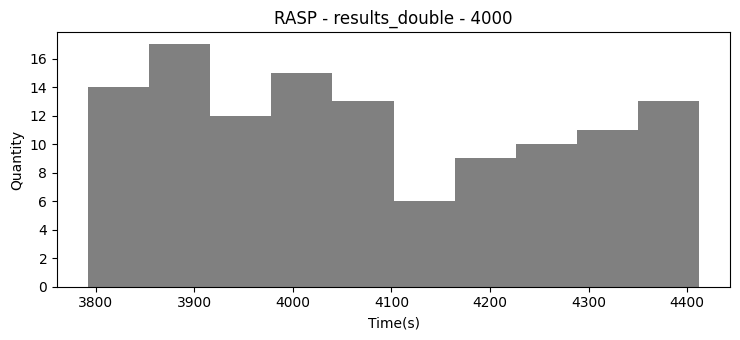

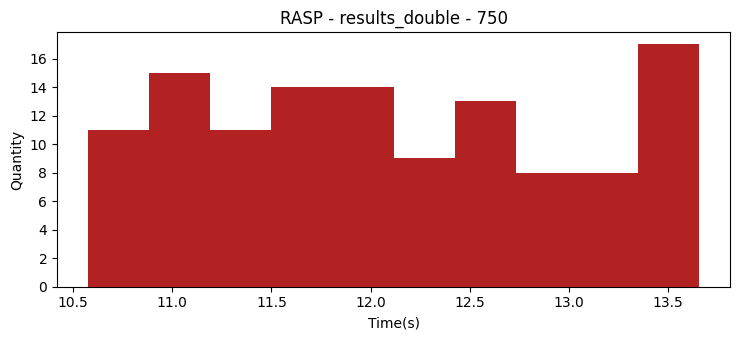

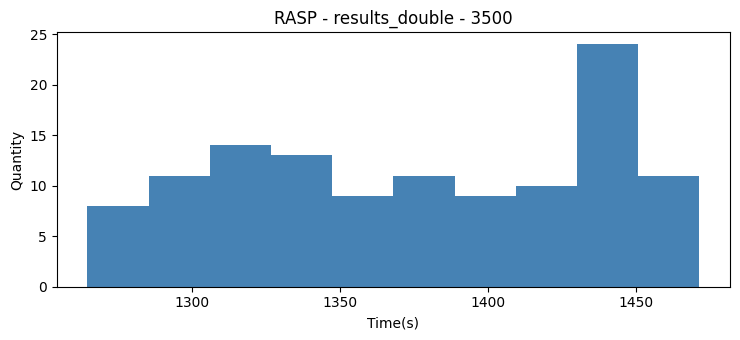

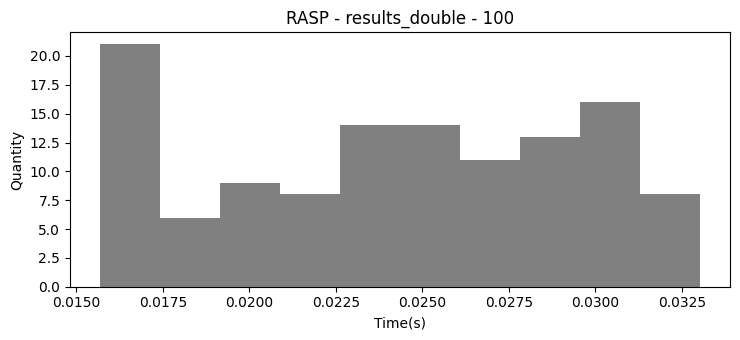

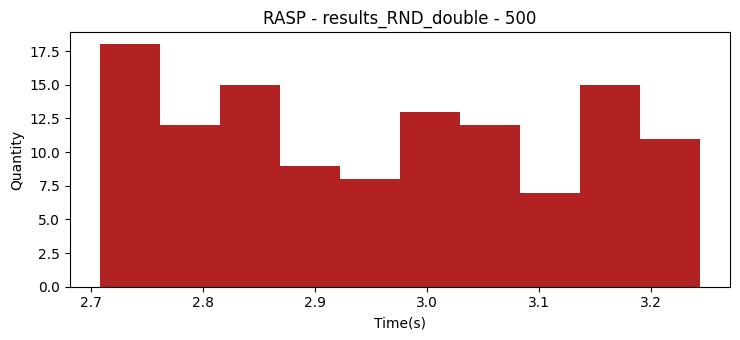

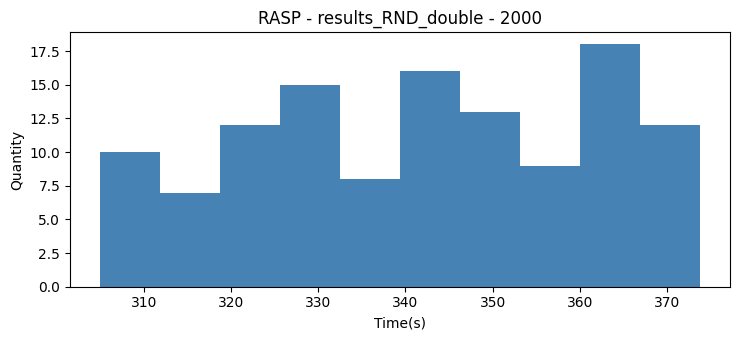

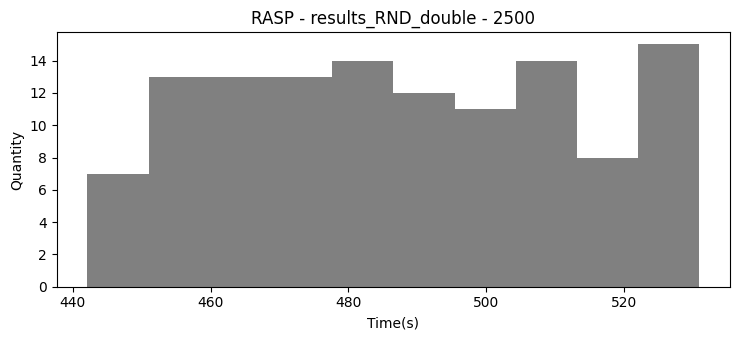

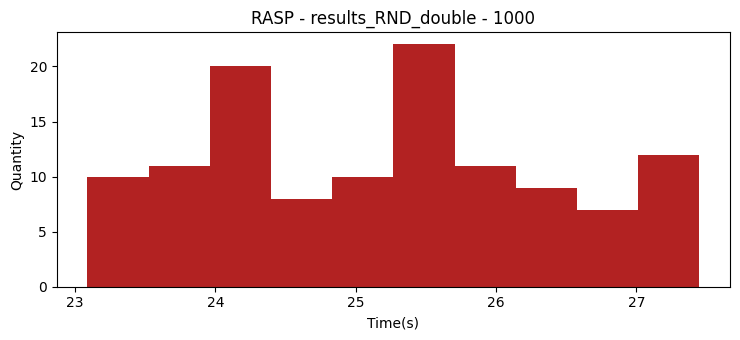

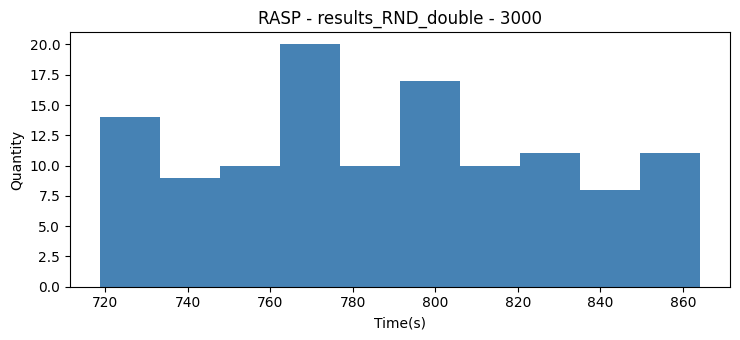

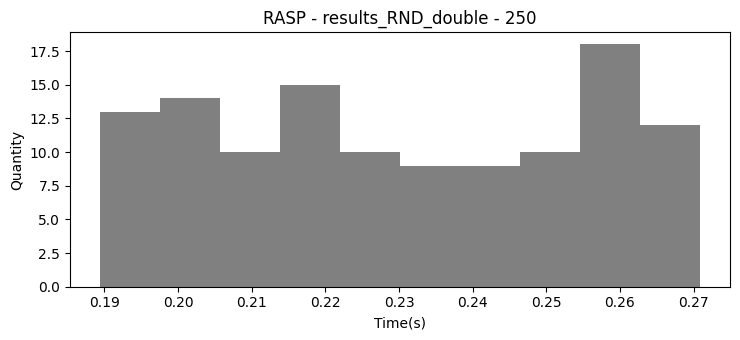

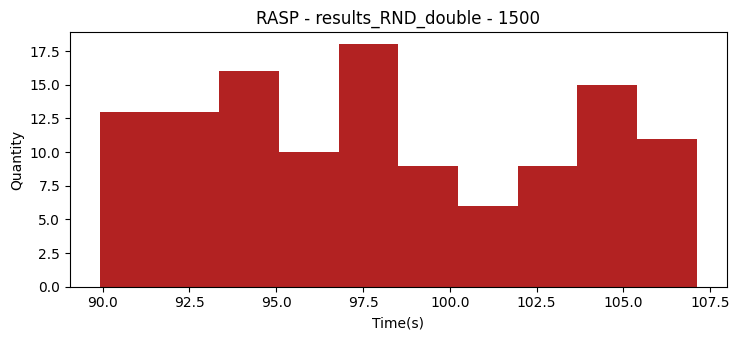

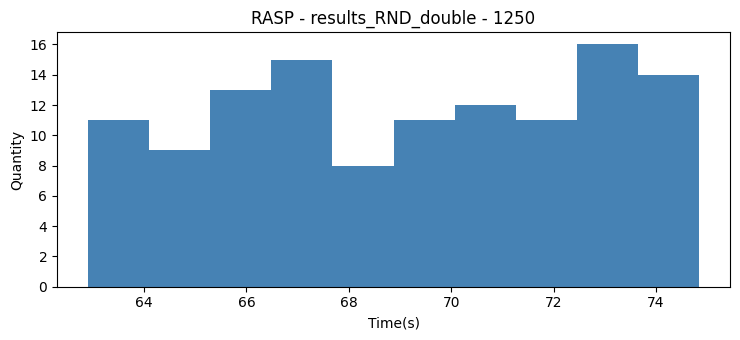

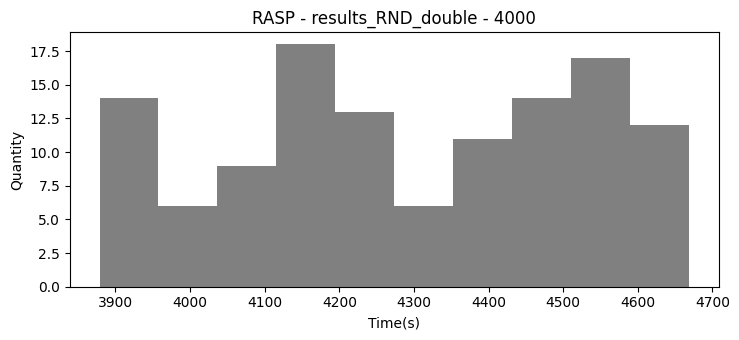

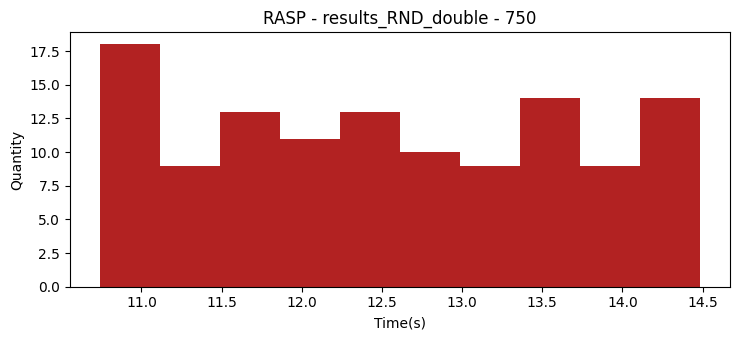

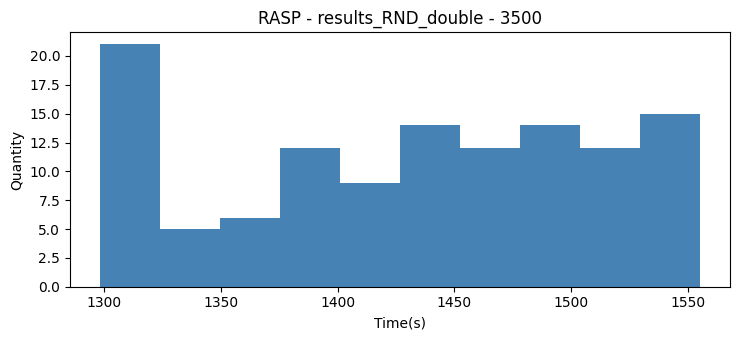

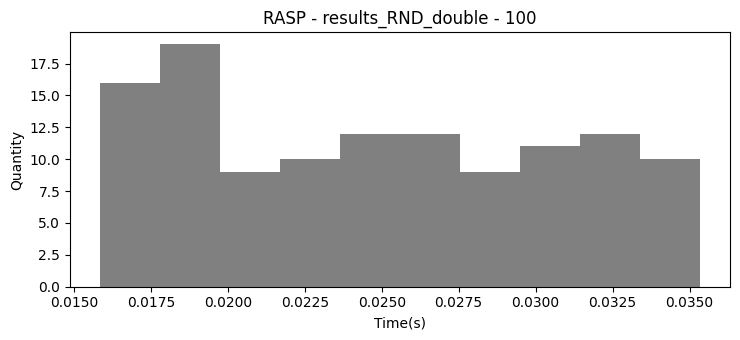

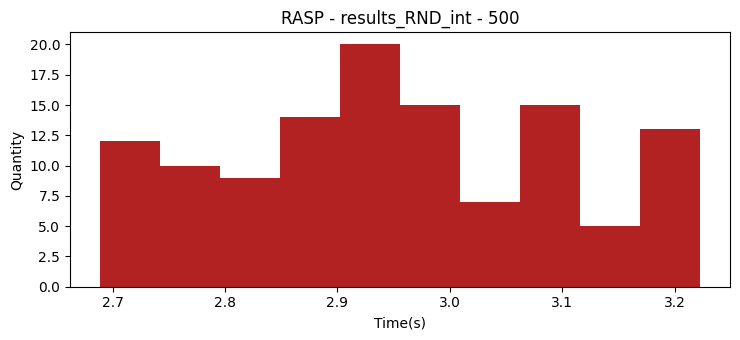

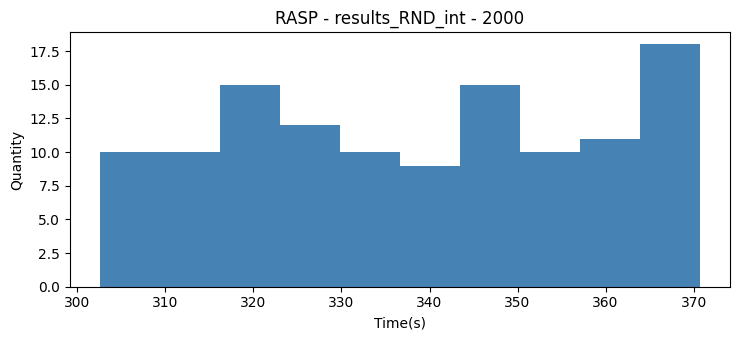

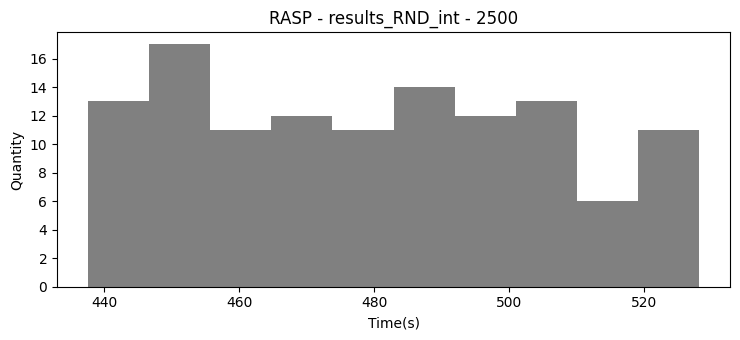

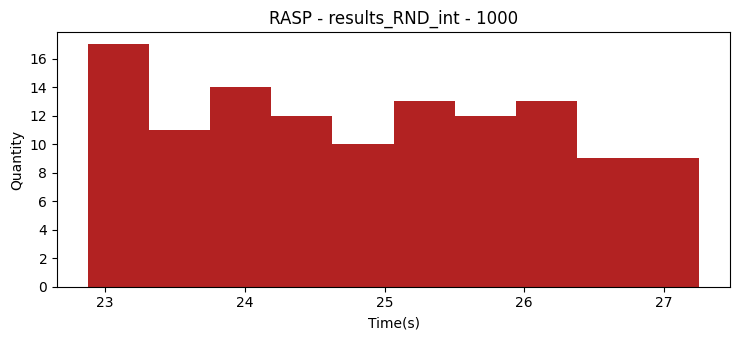

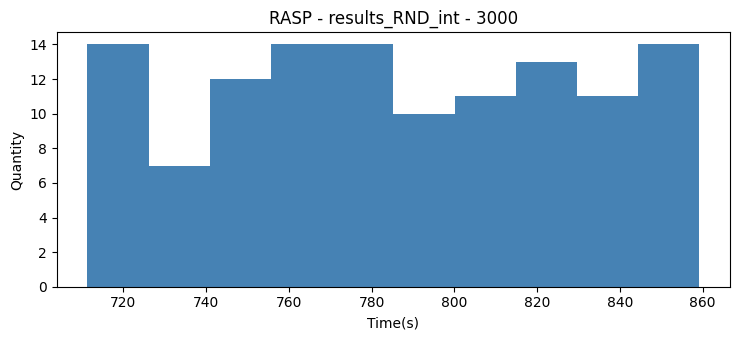

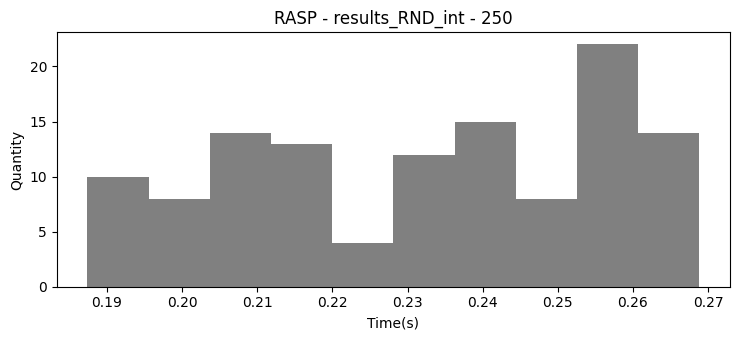

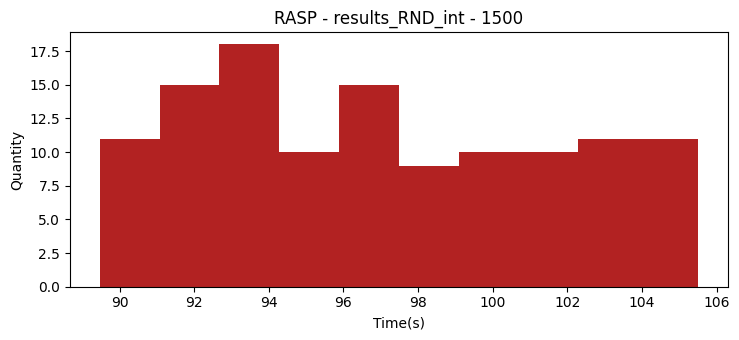

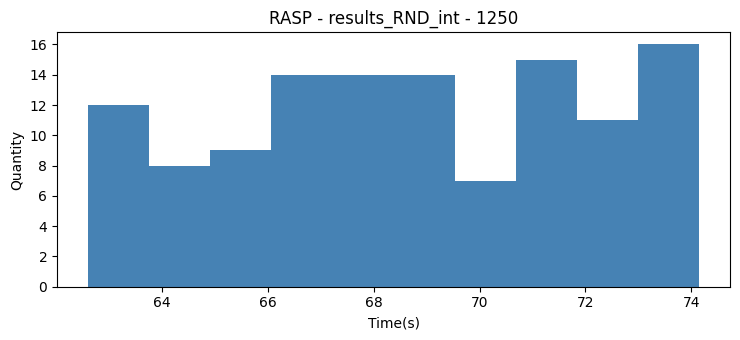

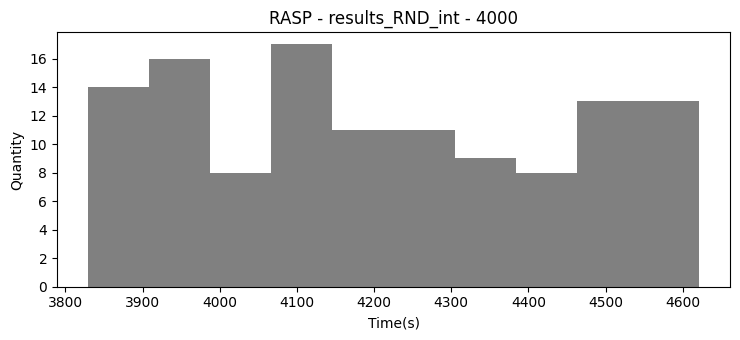

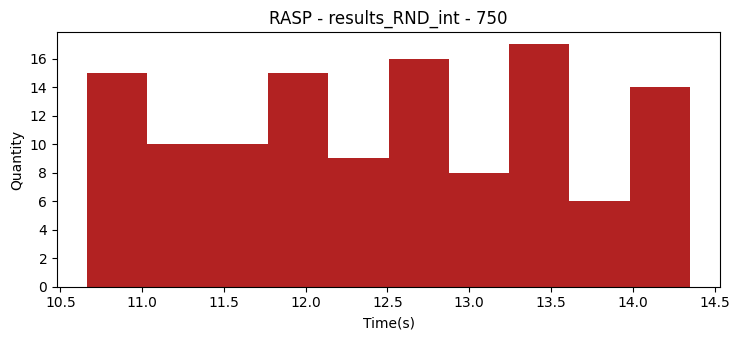

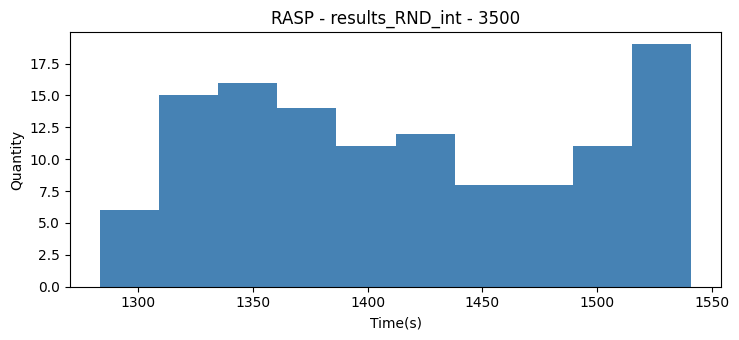

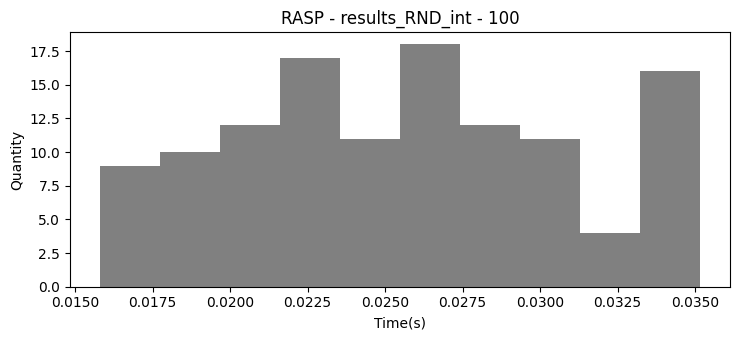

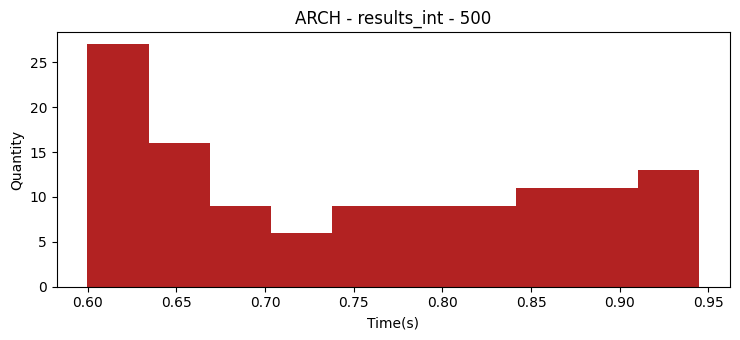

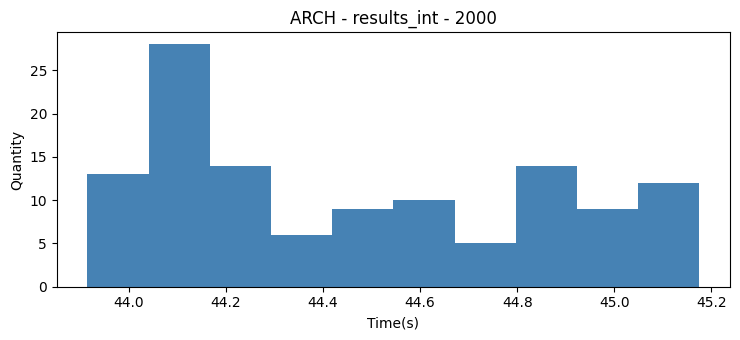

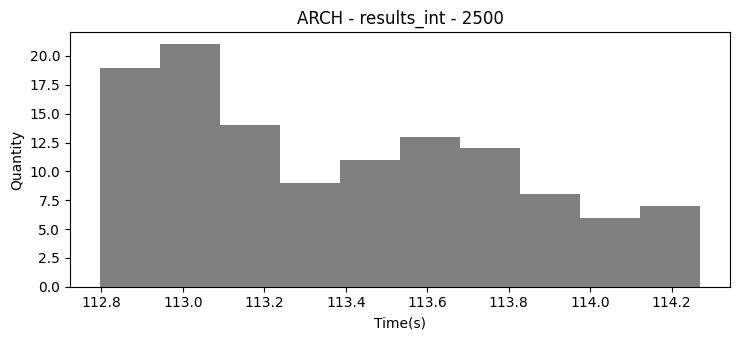

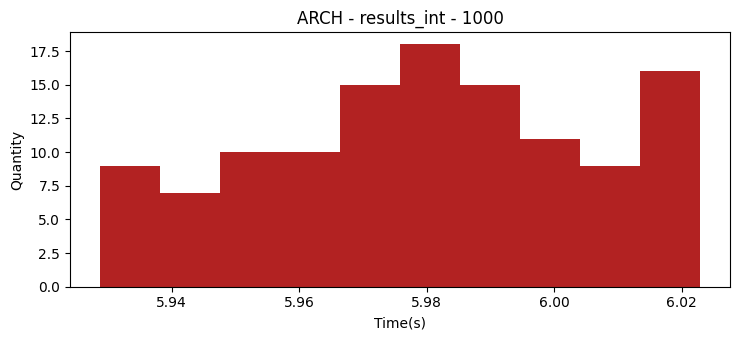

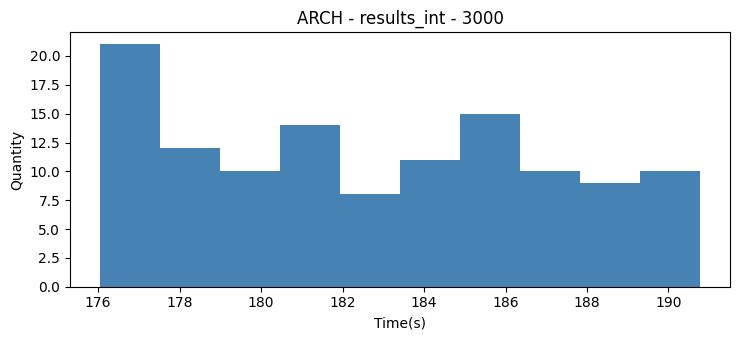

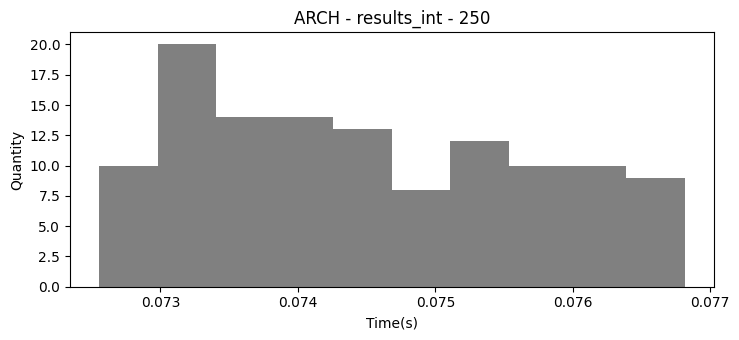

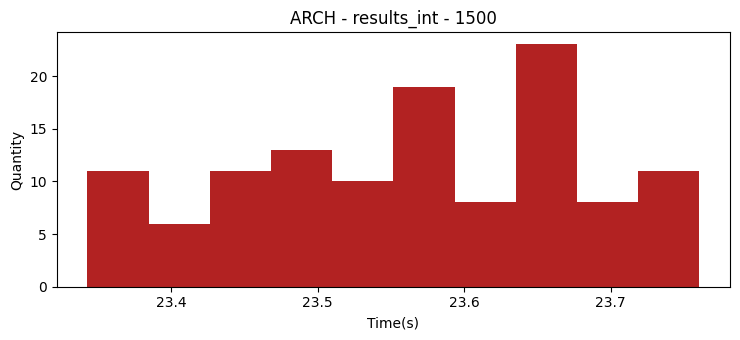

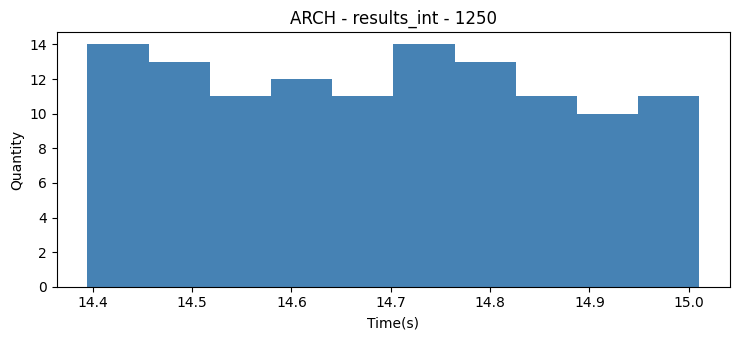

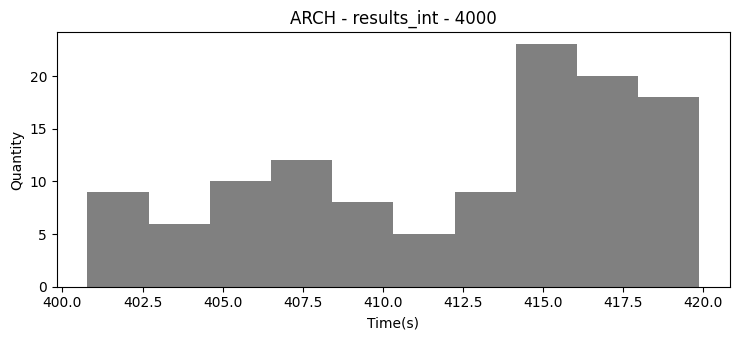

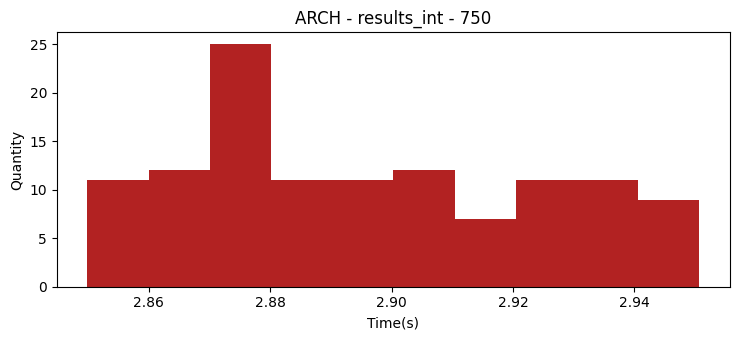

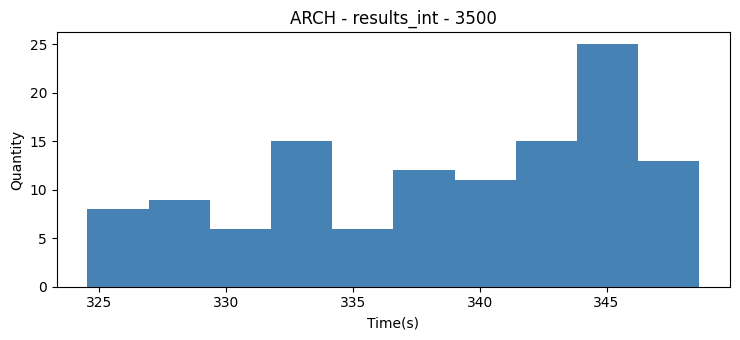

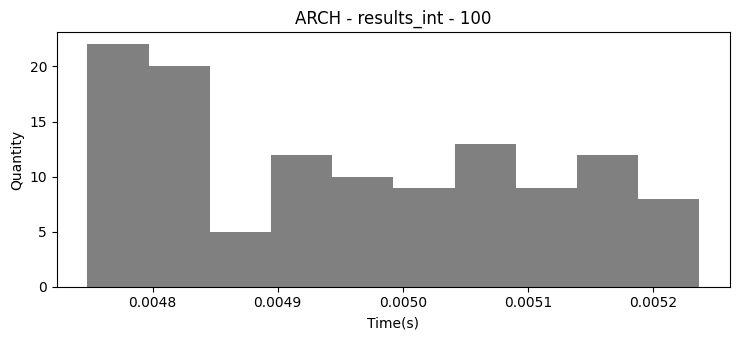

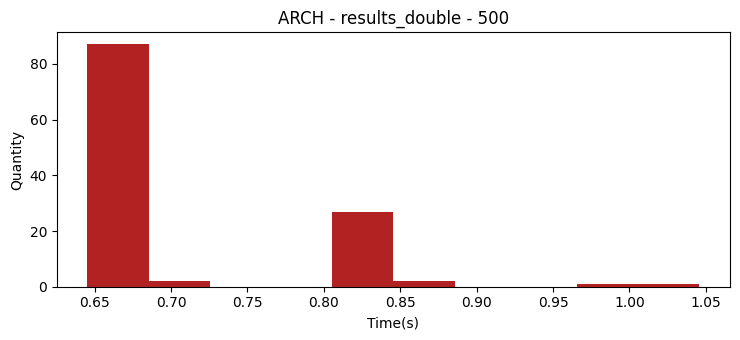

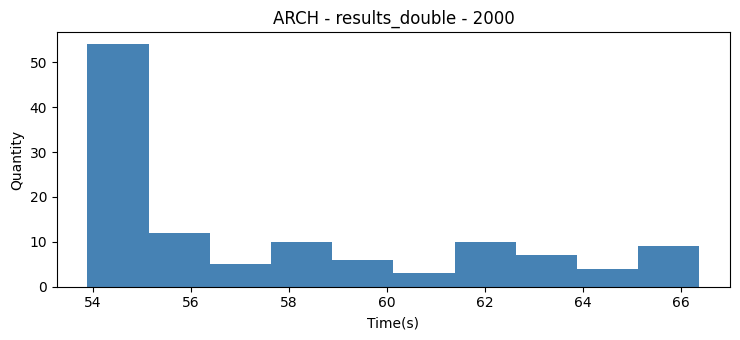

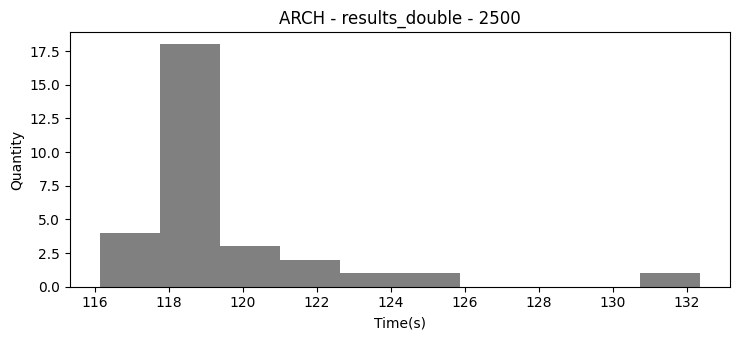

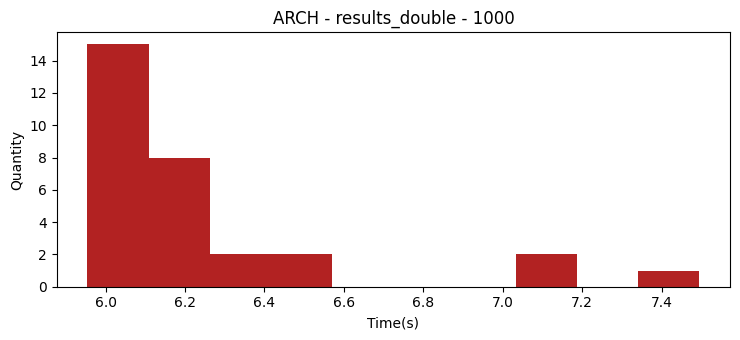

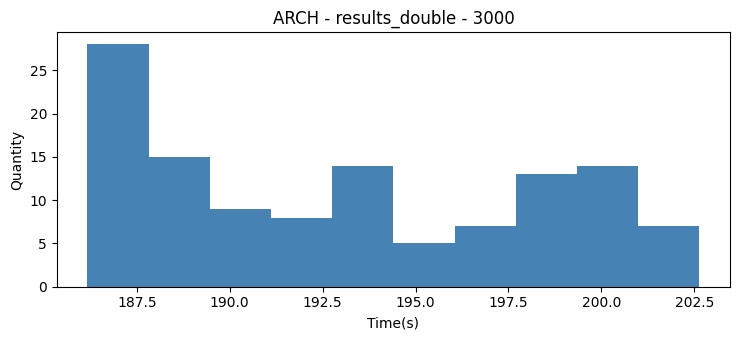

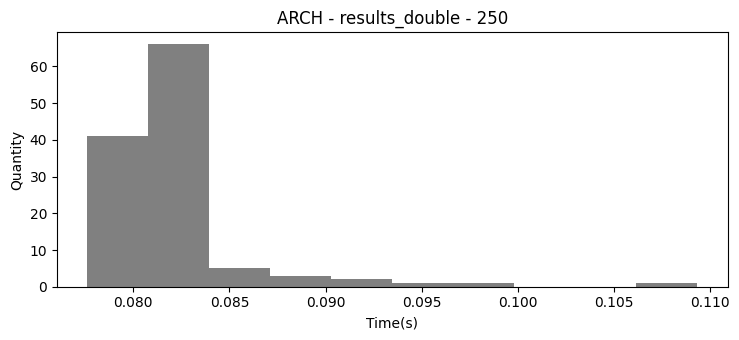

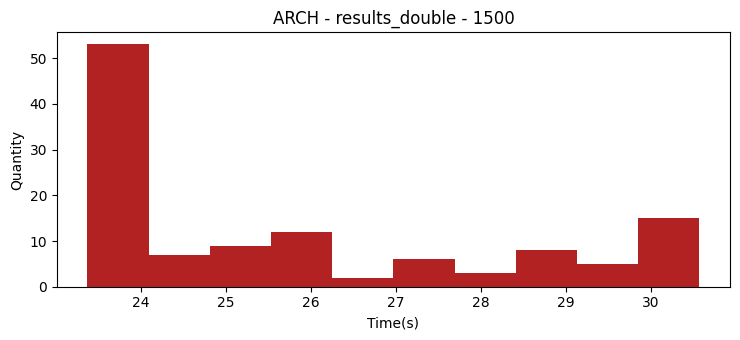

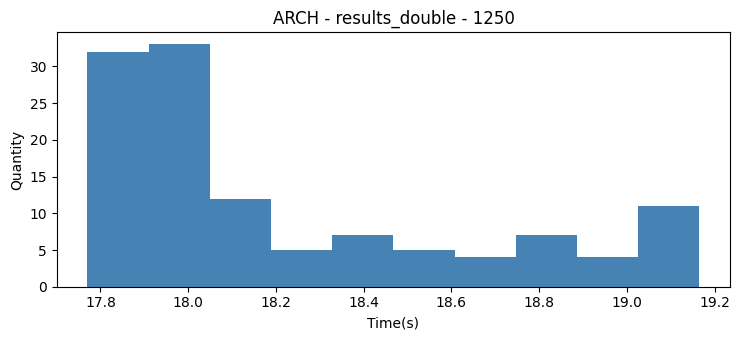

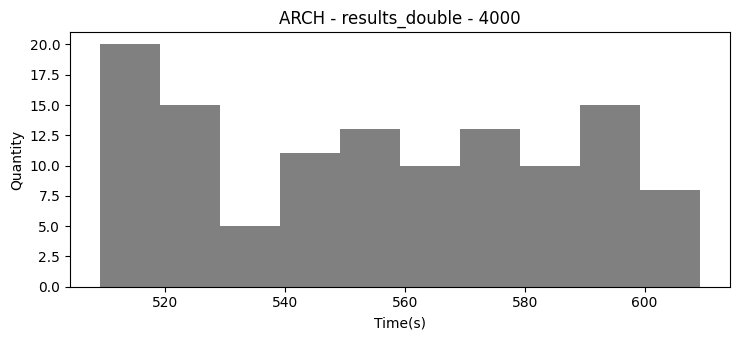

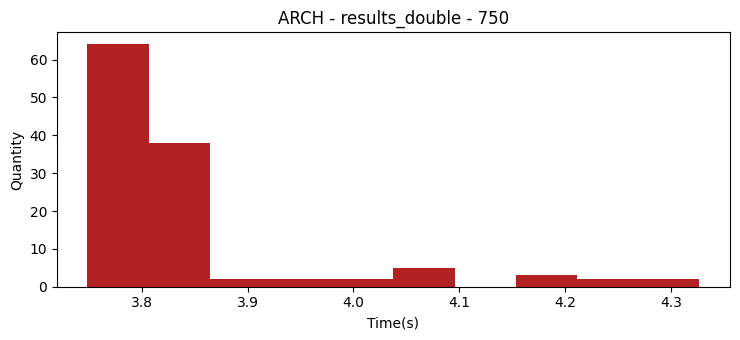

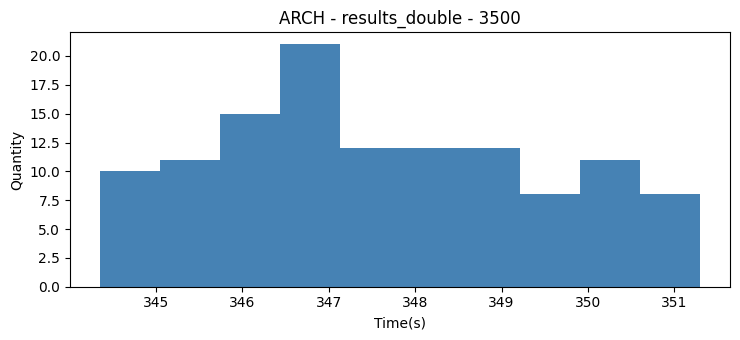

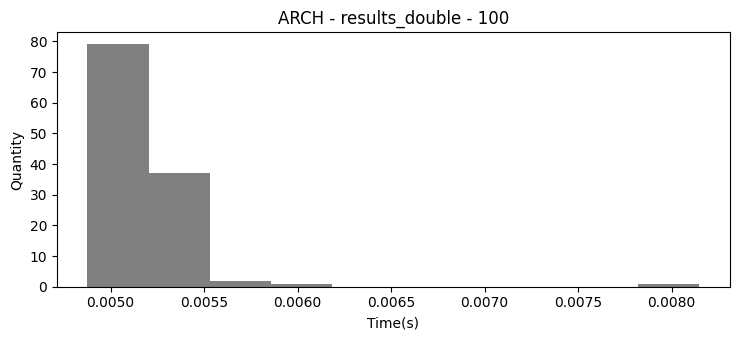

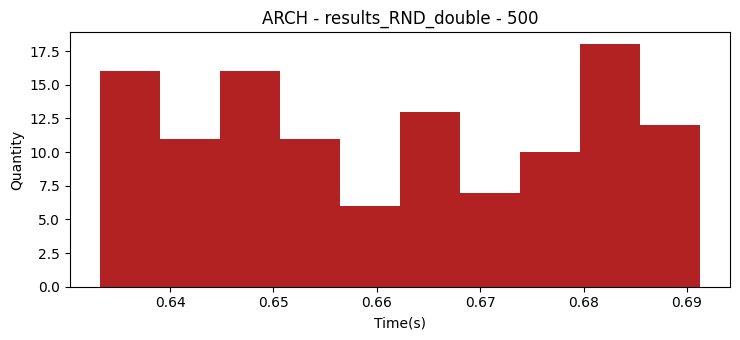

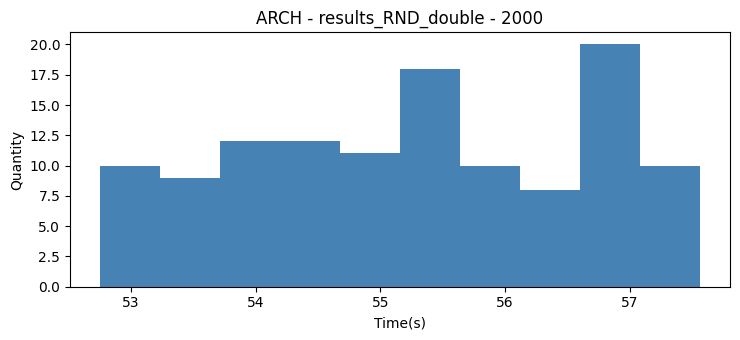

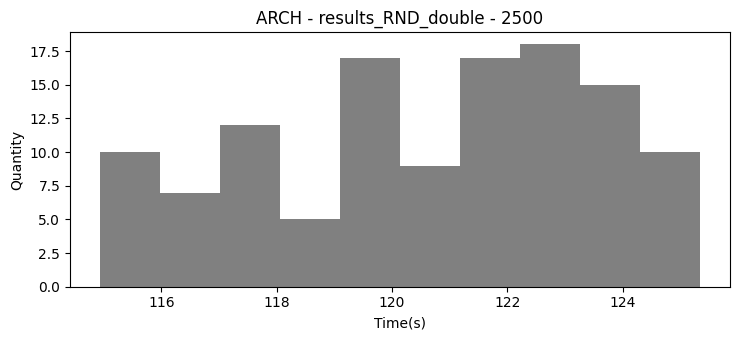

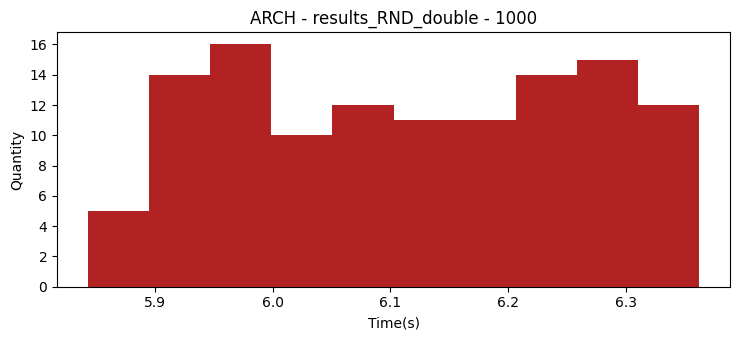

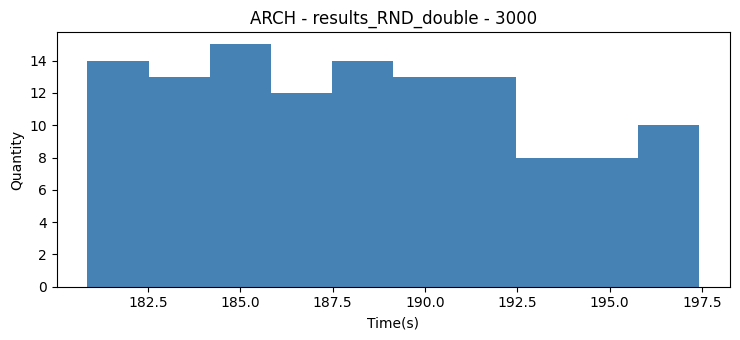

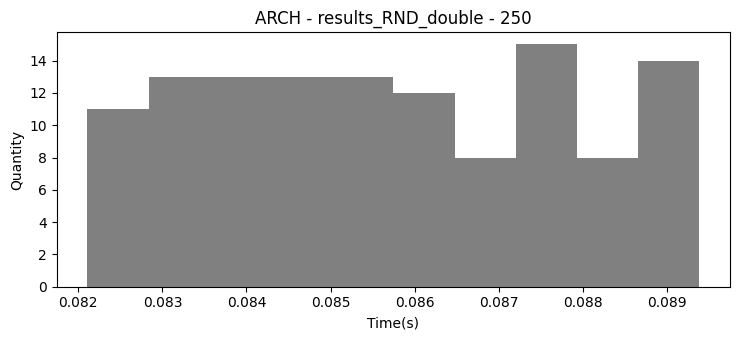

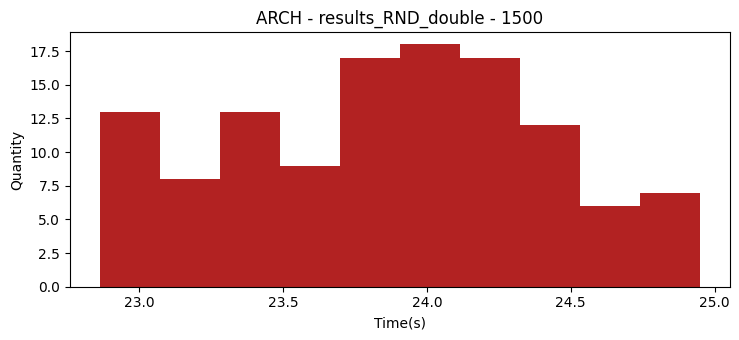

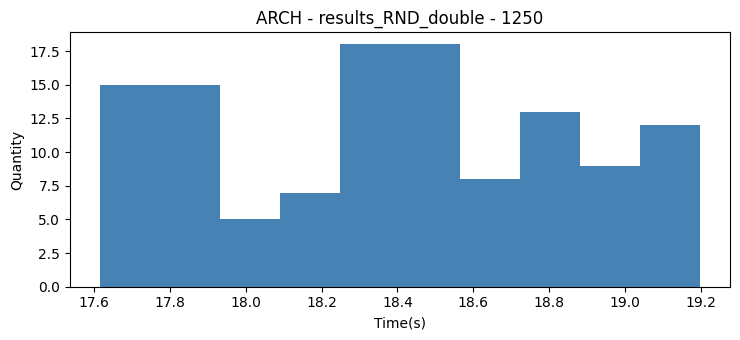

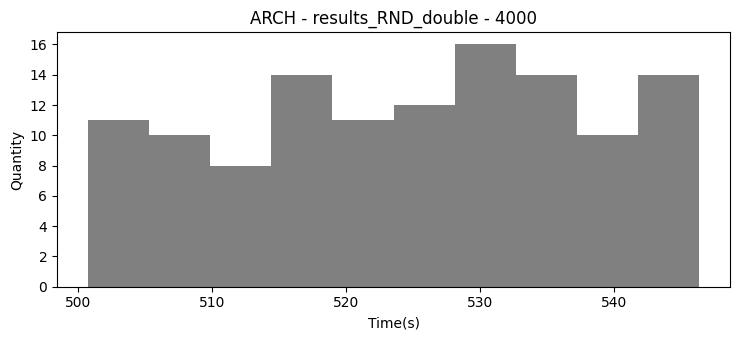

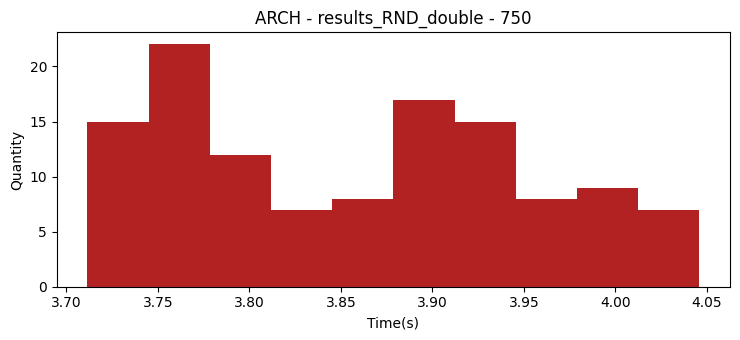

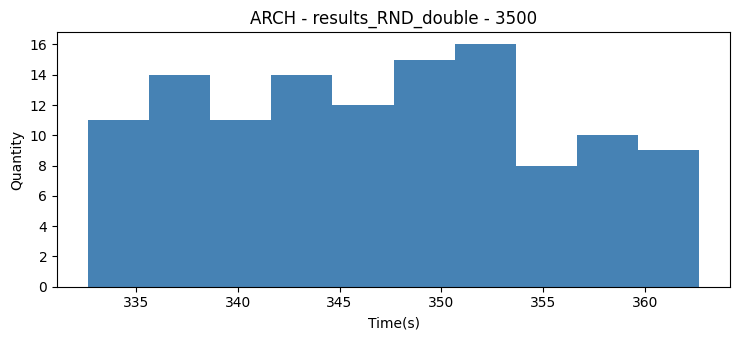

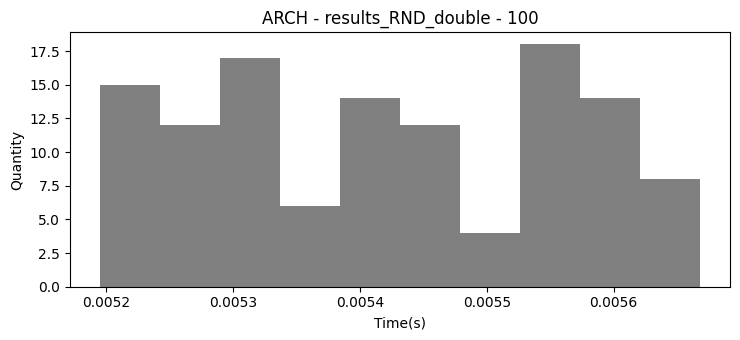

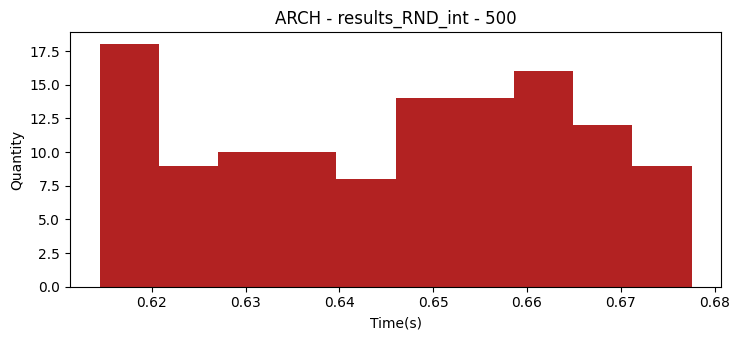

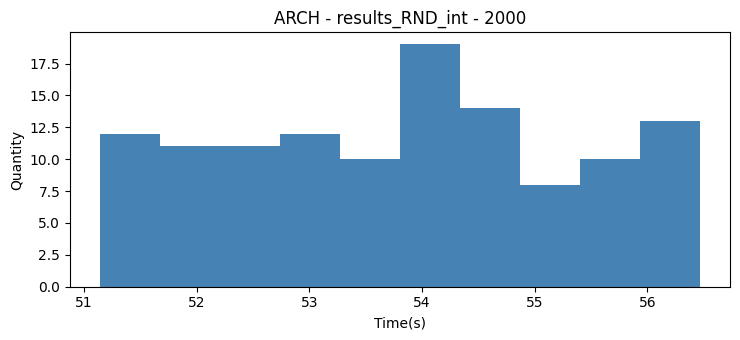

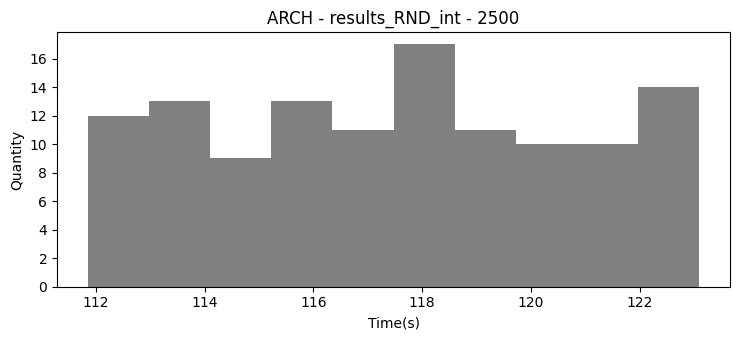

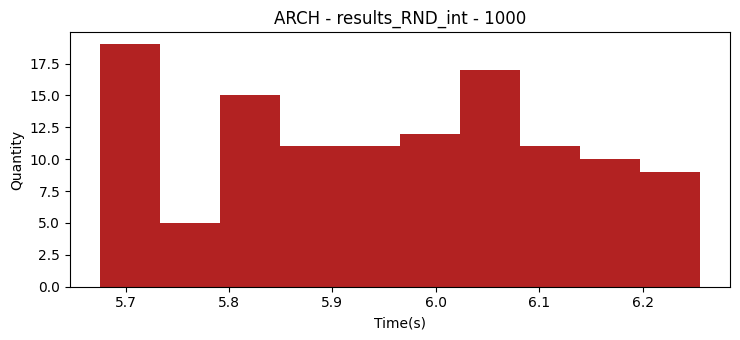

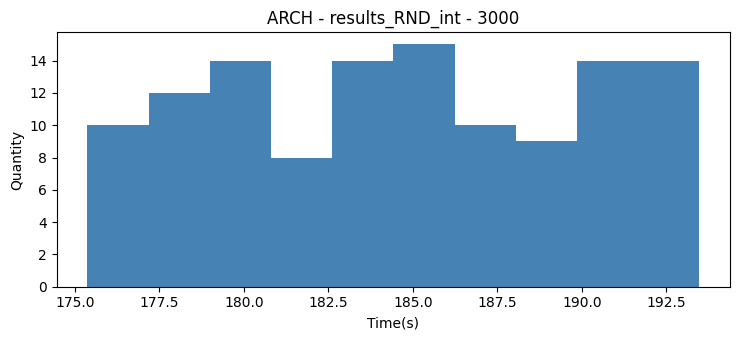

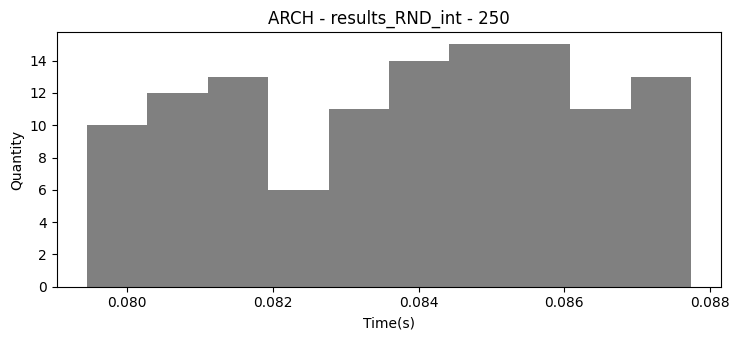

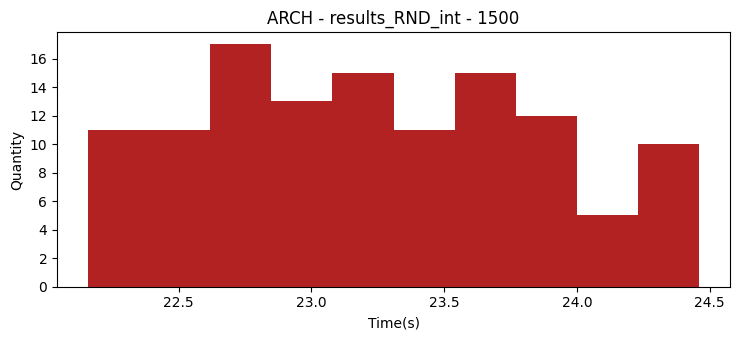

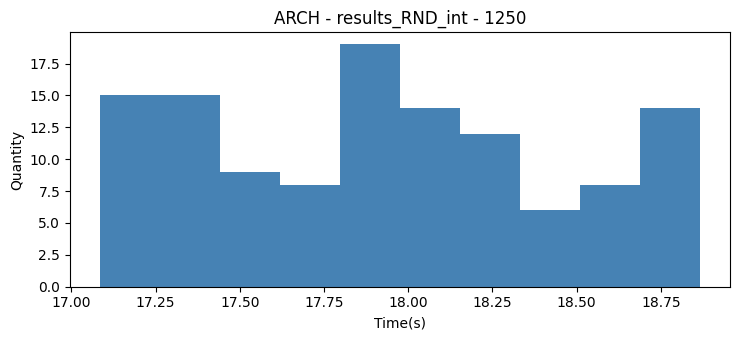

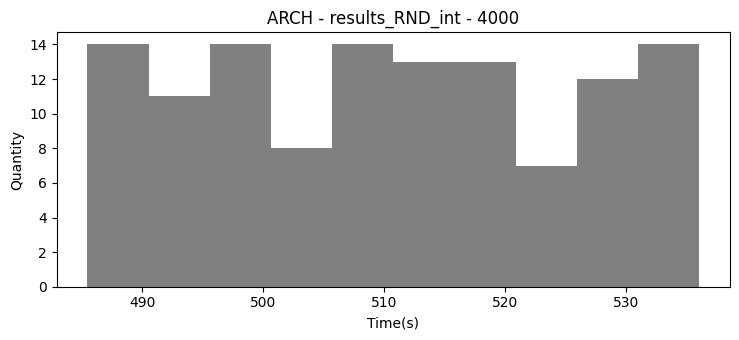

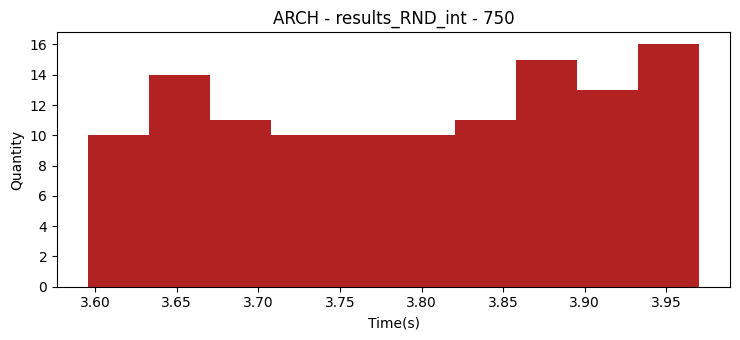

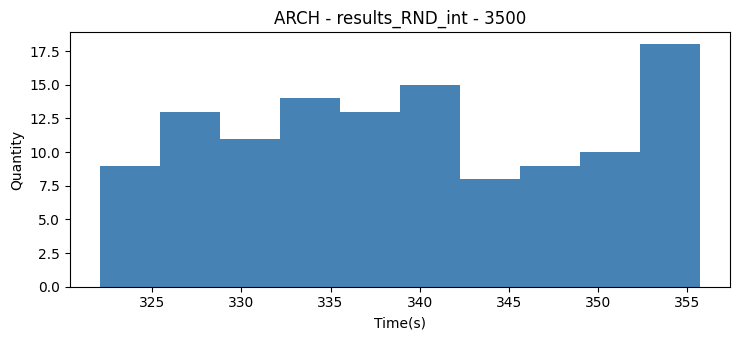

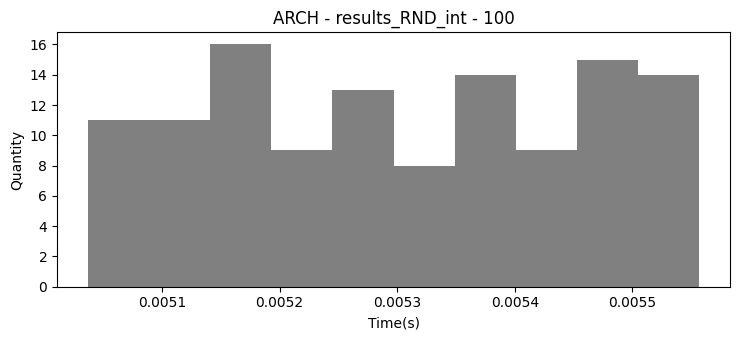

In [16]:
for p in platforms:
    for t in tests:
          for l in loads:
                plt.hist(benchs[p][t][l], color = next(color_cycler))
                plt.xlabel("Time(s)")
                plt.ylabel("Quantity")

                plt.title(f"{p} - {t} - {l.split('.')[0]}")
                plt.savefig(f"{imgpath}/hist_loads{p}_{t}_{l.split('.')[0]}.png")
                plt.show()
                

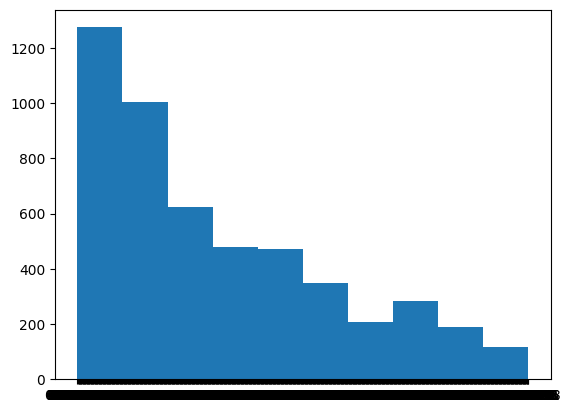

In [5]:
hpath = "/home/weriko/scripts/paralela/mmClassic-carga-100.txt"
f = open(hpath, "r")
data = f.read().split("\n")
f.close()
plt.hist(data)
plt.show()

In [6]:
import numpy as np

In [10]:
d = []
import time
for i in range(7000):
    arr1 = np.random.uniform(0,10,size=(300,300))
    arr2 = np.random.uniform(0,10,size=(300,300))
    s = time.time()
    np.matmul(arr1,arr2)
    d.append(time.time()-s)
    

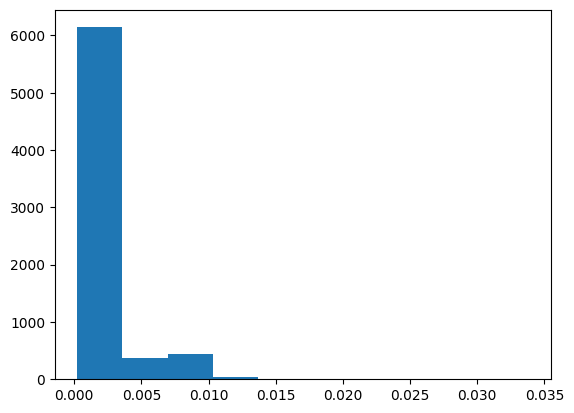

In [11]:
plt.hist(d)
plt.show()